# Test - toy tensor construction

In [38]:
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from split_half_pathway_fun import split_half, cal_fms, plt_fms
from evaluation_metrics import df_rank_evaluation
from sklearn.linear_model import LinearRegression

In [39]:
def construct_tensor(sample_mat,pathway_mat,omics_mat, error=0):
    
    """Construct and return tensor X from the three factor matrices"""
    
    I,F = sample_mat.shape
    J,F = pathway_mat.shape
    K,F = omics_mat.shape   

    X = np.zeros((I,J,K)) + error

    for f in range(F):
       for i in range(I):
           for j in range(J):
             for k in range(K):
               X[i,j,k] += sample_mat[i,f]*pathway_mat[j,f]*omics_mat[k,f]
    
    df_metab = pd.DataFrame(X[:,:,0])
    df_prot = pd.DataFrame(X[:,:,1])
    
    return X, df_metab, df_prot

In [40]:
diabetes_binary = [1] *50 + [0] *50

#### 0
- scenario: 100 samples, 80 pathways, 2 omic levels;
100 samples: 50 diabetic, 50 non-diabetic;
80 pathways: 10 light up, 70 dont;
2 omic levels: giving same signals ;

In [156]:
sample_mat_0 = np.full((100,1),0.01)
sample_mat_0[:50] = 1

pathway_mat_0 = np.full((80,1),0.01)
pathway_mat_0[:10] = 1

omics_mat_0 = np.ones((2,1))
omics_mat_0

array([[1.],
       [1.]])

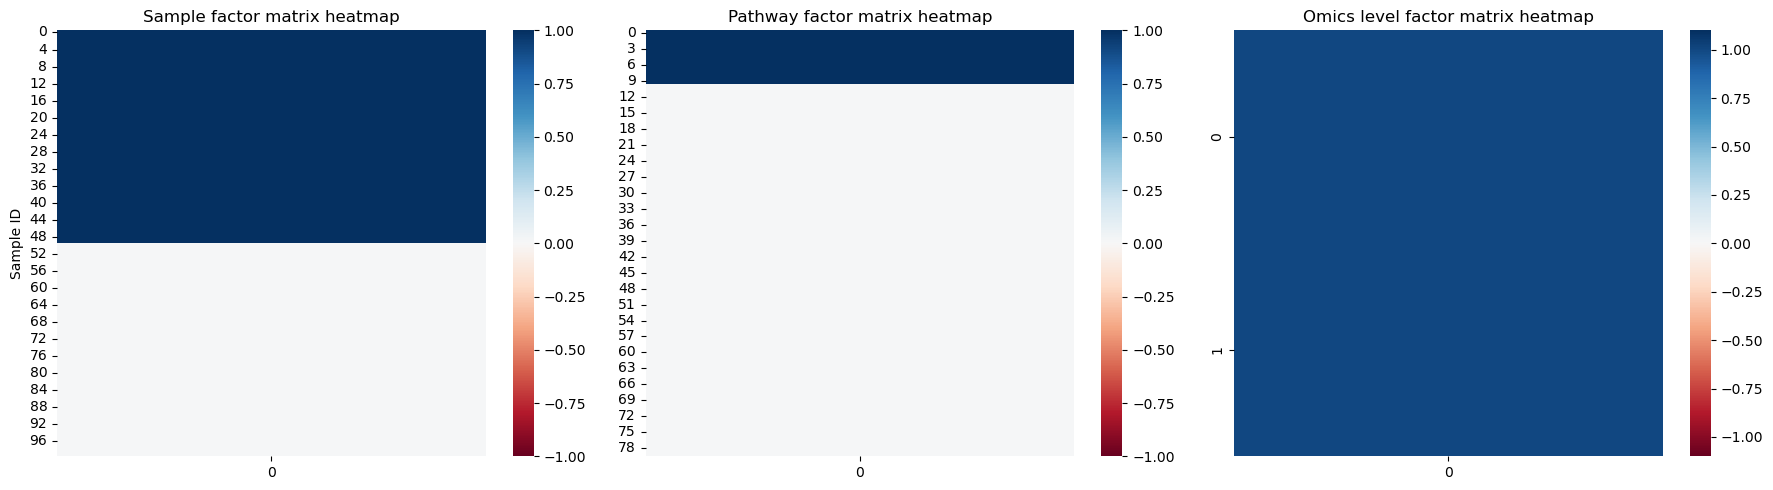

In [159]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(sample_mat_0, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(pathway_mat_0, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(omics_mat_0, cmap='RdBu',vmin=-1.1,vmax=1.1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

- Comparing the construct_tensor() and tl.cp_tensor_cp_to_tensor() results

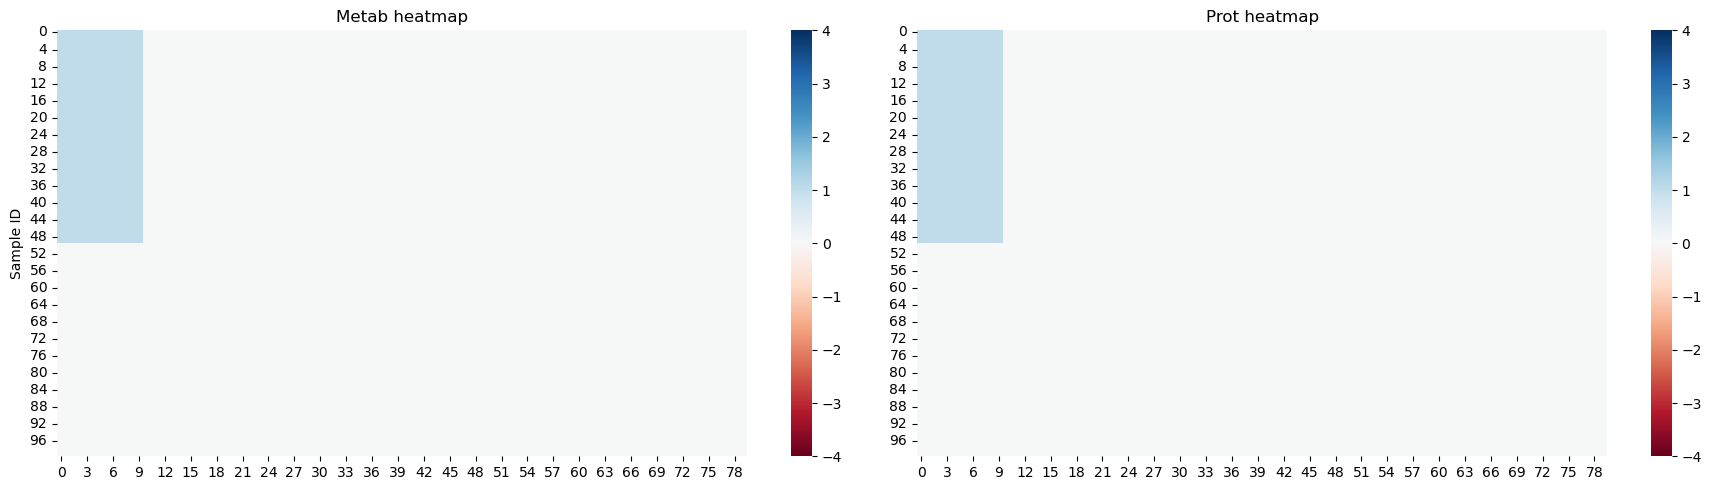

In [160]:
X_0_v2 = tl.cp_tensor.cp_to_tensor((None,[sample_mat_0,pathway_mat_0,omics_mat_0]))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_0_v2[:,:,0], cmap='RdBu',vmax=4,vmin=-4)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_0_v2[:,:,1], cmap='RdBu',vmax=4,vmin=-4)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

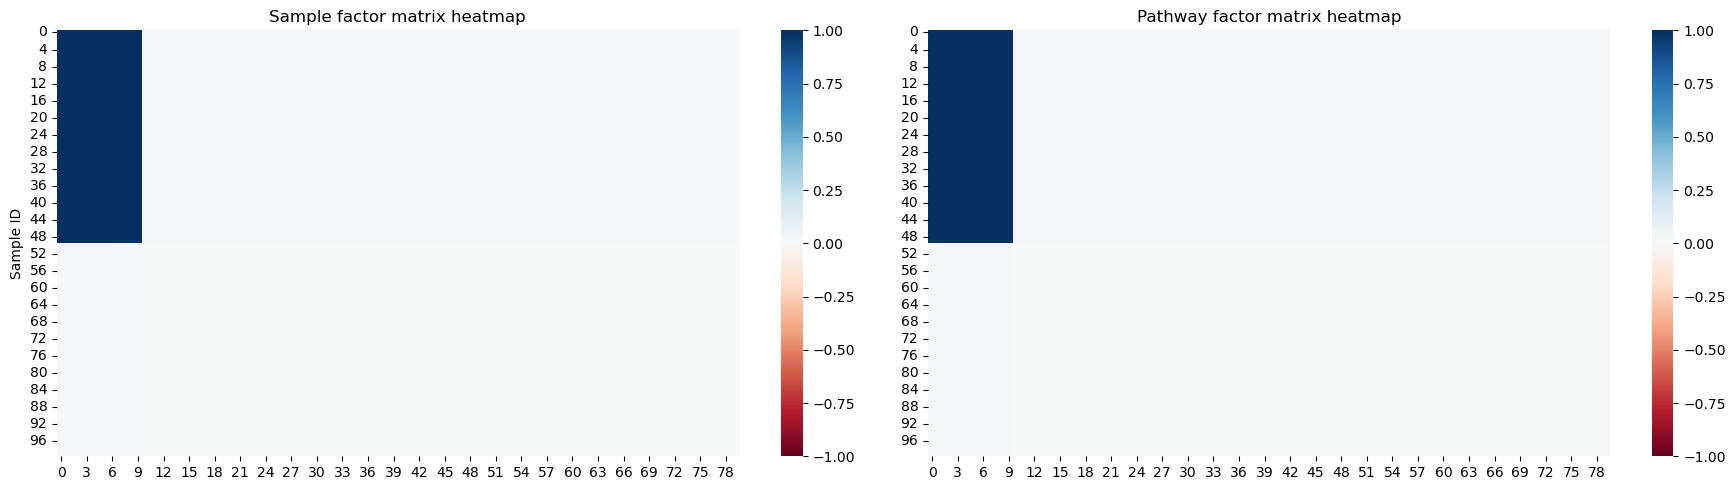

In [168]:
X_0, df_metab_0,df_prot_0 = construct_tensor(sample_mat_0,pathway_mat_0,omics_mat_0)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(df_metab_0, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(df_prot_0, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Pathway factor matrix heatmap')


plt.tight_layout()
plt.show()

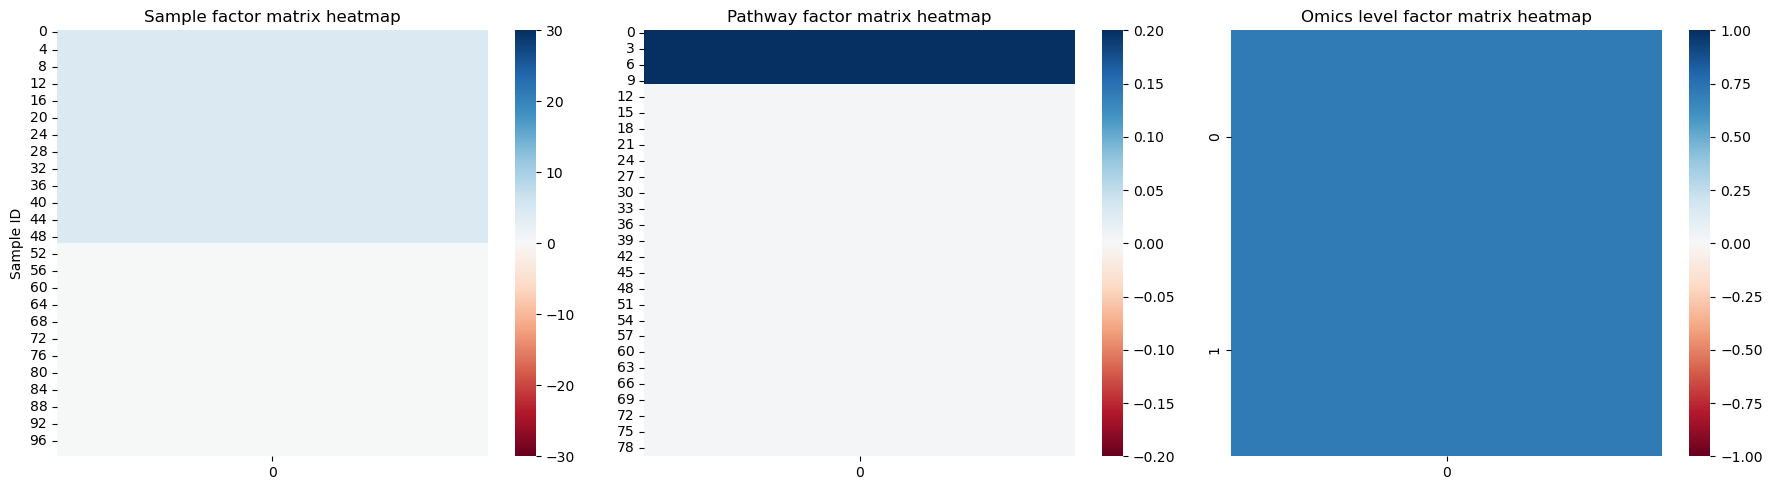

In [162]:
weight, factors = parafac(X_0_v2,rank=1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-30,vmax=30)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-0.2,vmax=0.2)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

- Note that it causes 'sparsity': when within the same rank, two out of three factors have score ~ 0, model is difficult to interpret

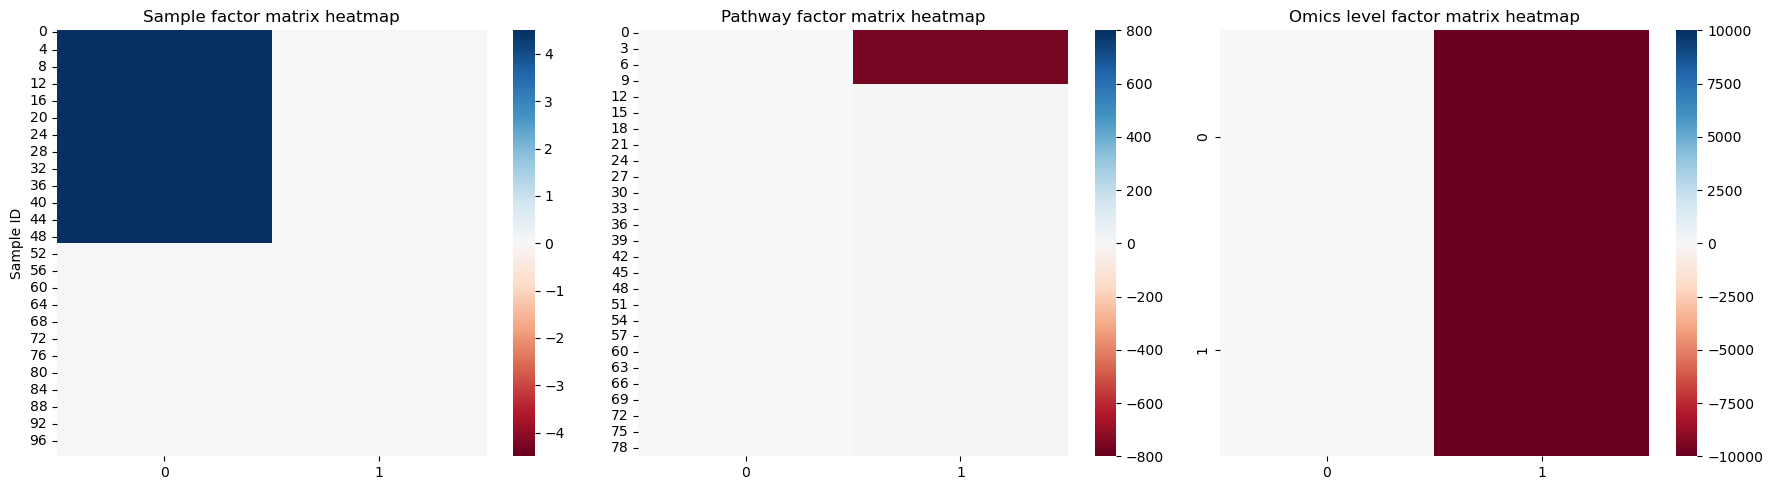

In [170]:
weight, factors = parafac(X_0,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-4.5,vmax=4.5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-800,vmax=800)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-10000,vmax=10000)

plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

In [171]:
metab_0_updated = np.full((100,80), 0.01)
metab_0_updated[:50,:10] = 1

prot_0_updated = np.full((100,80), 0.01)
prot_0_updated[:50,:10] = 1

X_0_updated = tl.stack([metab_0_updated,prot_0_updated],axis=2)

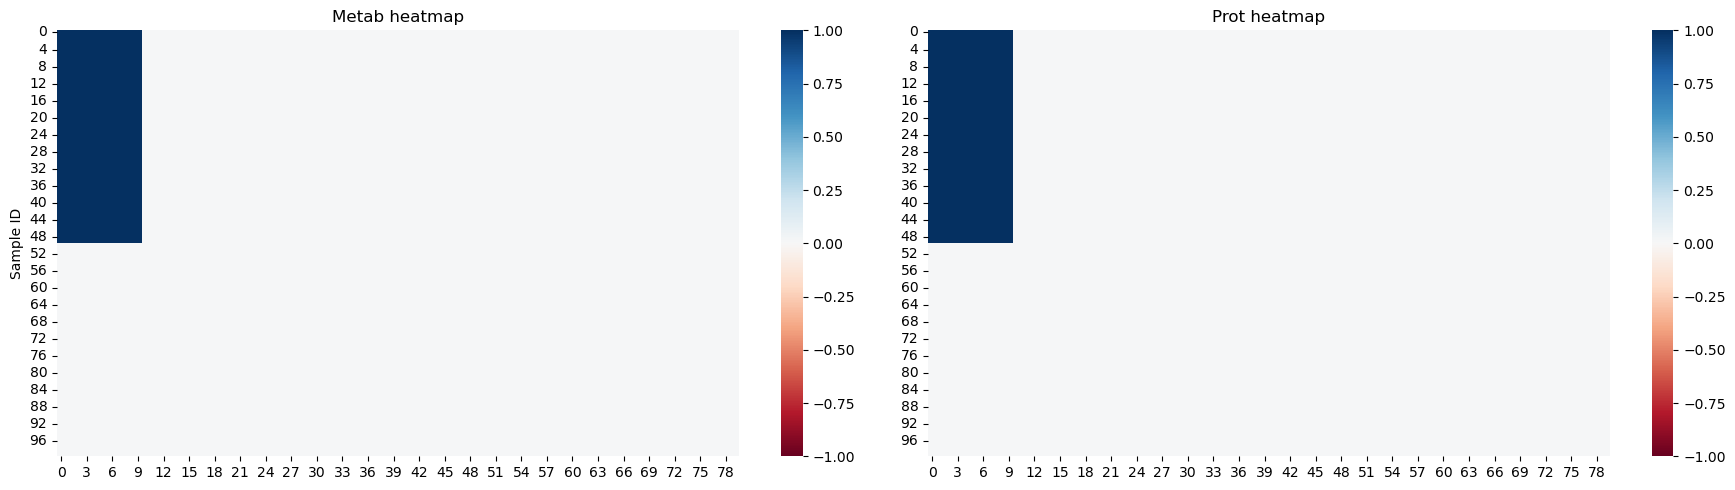

In [172]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_0_updated, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_0_updated, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')

plt.tight_layout()
plt.show()

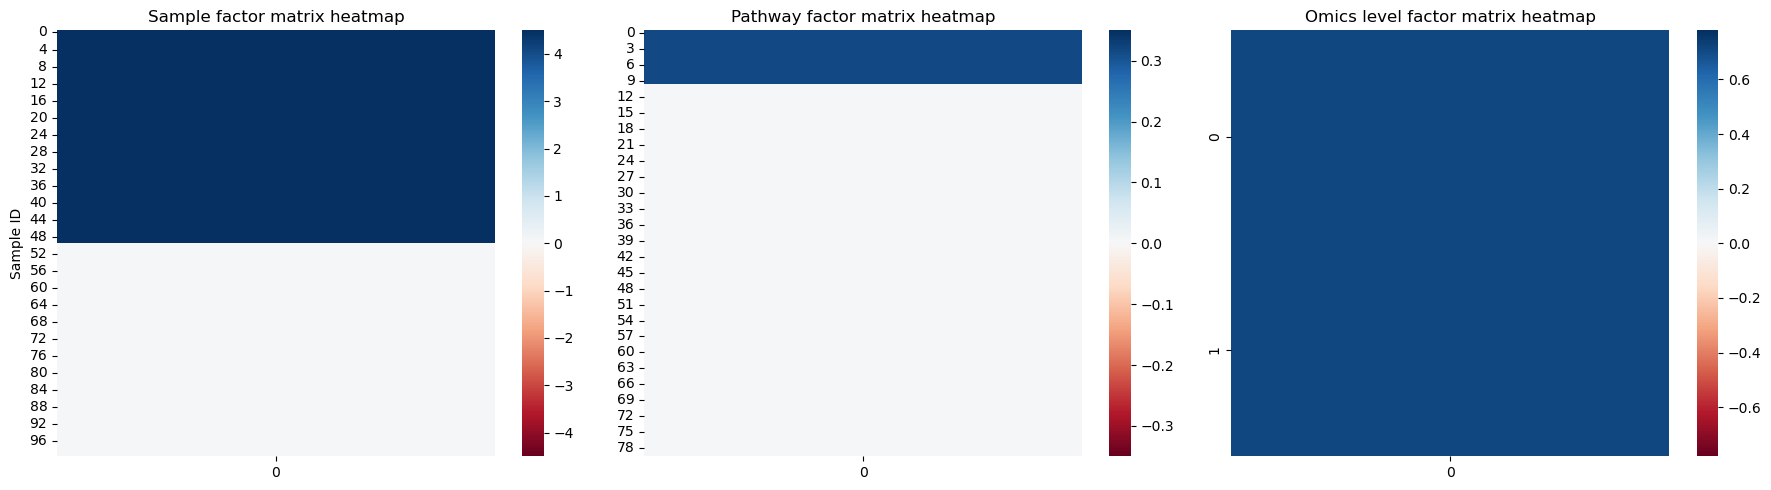

In [173]:
weight, factors = parafac(X_0_updated,rank=1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-4.5,vmax=4.5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-0.35, vmax=0.35)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-0.78,vmax=0.78)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

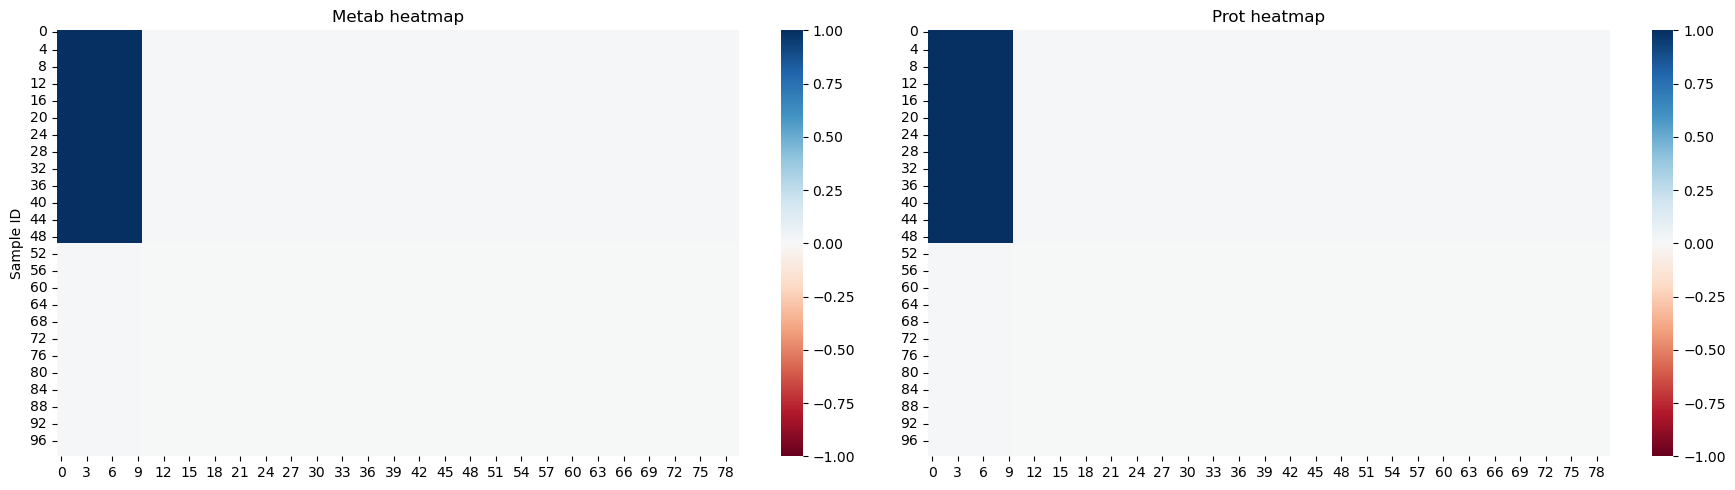

In [174]:
X_0_u_v1 = tl.cp_tensor.cp_to_tensor((None,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_0_u_v1[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_0_u_v1[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

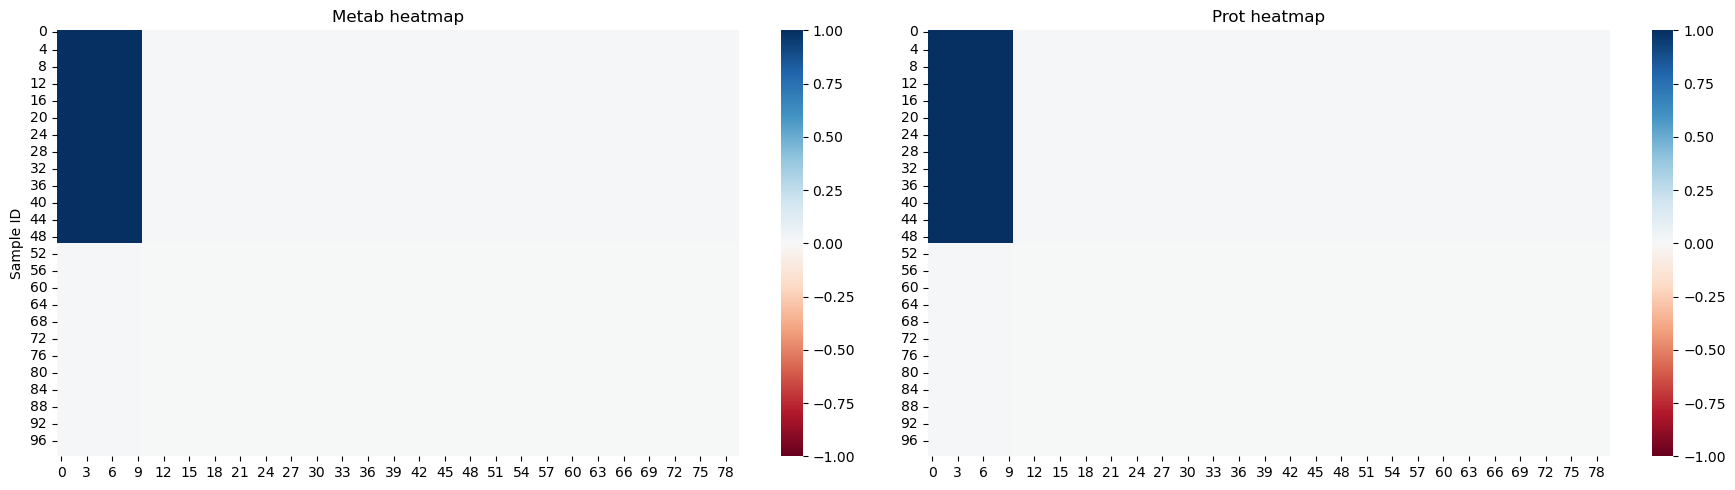

In [175]:
X_0_u_v2,_,_ = construct_tensor(factors[0],factors[1],factors[2])

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_0_u_v2[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_0_u_v2[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

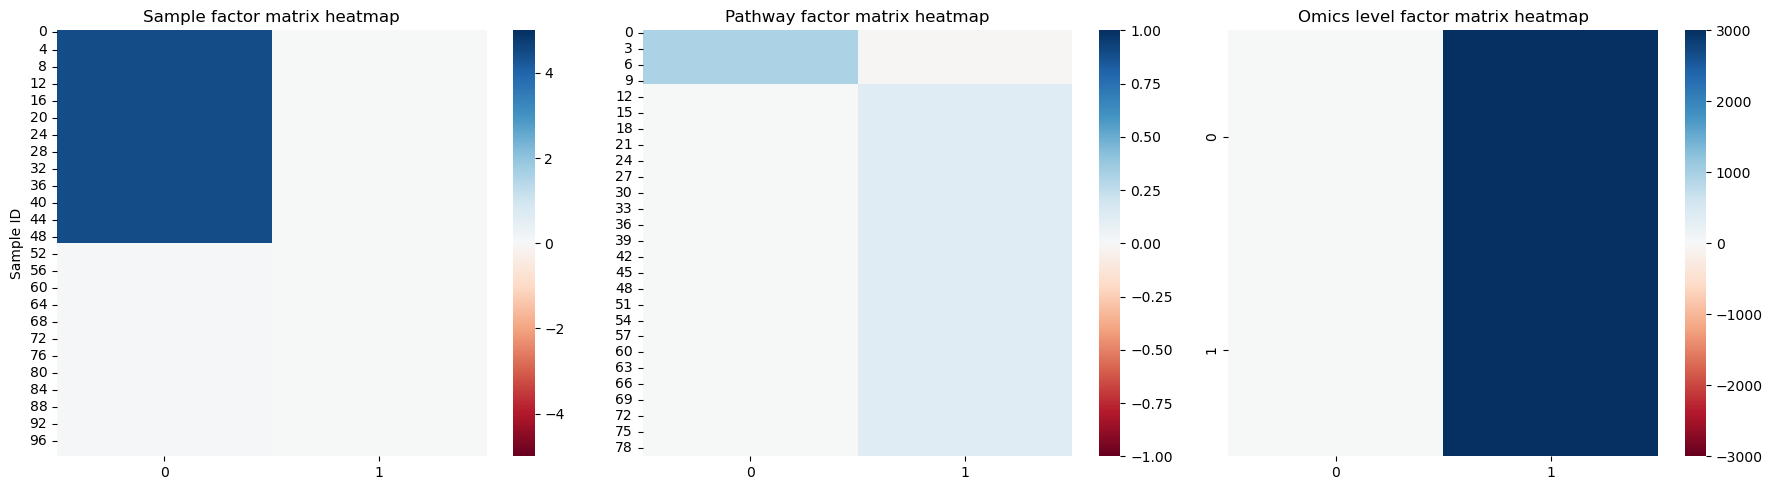

In [180]:
weight, factors = parafac(X_0_updated,rank=2)
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-3000,vmax=3000)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

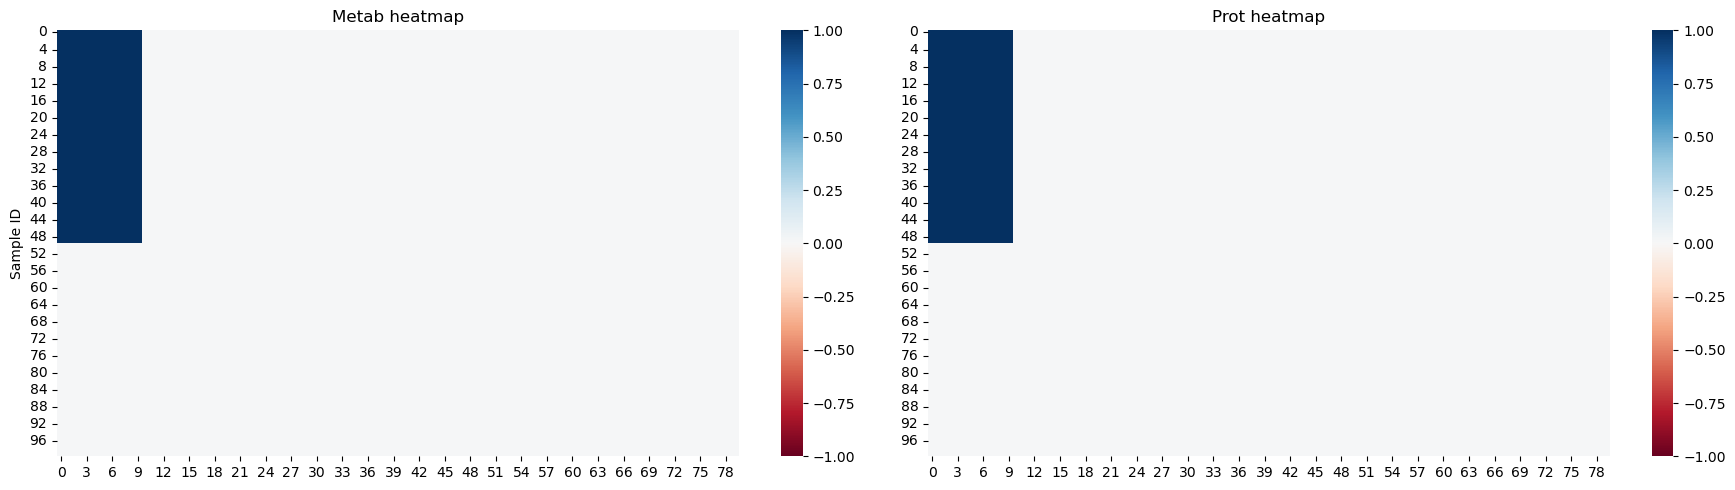

In [60]:
X_0_u_v1 = tl.cp_tensor.cp_to_tensor((None,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_0_u_v1[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_0_u_v1[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

In [32]:
# Note significantly negative core consistency
df_rank_evaluation(X_0_updated, 10, diabetes_binary,LinearRegression() )

Core consistency       Fit  Sum Squared Error  \
Number of components                                                  
1                         1.000000e+02  0.999316       6.855117e-01   
2                        -7.494352e+29  1.000000       4.933104e-27   
3                        -3.471143e+25  1.000000       3.311922e-24   
4                        -3.522910e+43  1.000000       2.182375e-21   
5                        -7.475042e+81  1.000000       1.198918e-24   
6                       -3.793109e+101  1.000000       3.105839e-23   
7                       -3.307654e+148  1.000000       4.488119e-24   
8                       -8.289814e+155  1.000000       1.151604e-23   
9                       -1.590172e+207  1.000000       3.019867e-23   
10                      -6.586971e+220  1.000000       1.089458e-23   

                      Predictive Power  Degeneracy Score  
Number of components                                      
1                                  1.0      1.000000e+00  
2                                  1.0      1.012680e-08  
3                                  1.0      8.925301e-01  
4                                  1.0      9.998452e-01  
5                                  1.0      9.905921e-01  
6                                  1.0      9.998422e-01  
7                                  1.0      9.992445e-01  
8                                  1.0      9.981325e-01  
9                                  1.0      9.997968e-01  
10                                 1.0      9.978411e-01

#### 1.
- scenario: 100 samples, 80 pathways, 2 omic levels;
100 samples: 50 diabetic, 50 non-diabetic;
80 pathways: 10 light up (5 up, 5 down), 70 dont;
2 omic levels: giving same signals ;

In [62]:
metab_1 = np.full((100,80), 0.01)
metab_1[:50,:5] = 1
metab_1[:50,5:10]=-1

prot_1 = np.full((100,80), 0.01)
prot_1[:50,:5] = 1
prot_1[:50,5:10]=-1

X_1 = tl.stack([metab_1,prot_1],axis=2)

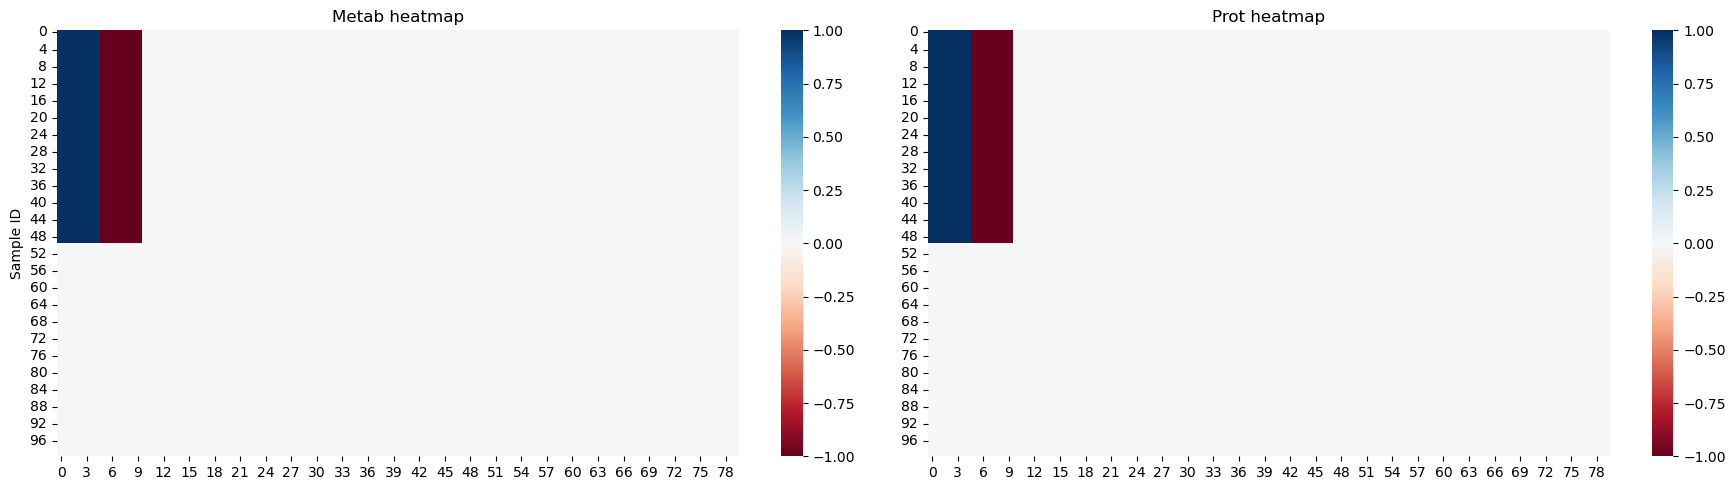

In [63]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_1, cmap='RdBu')
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_1, cmap='RdBu')
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

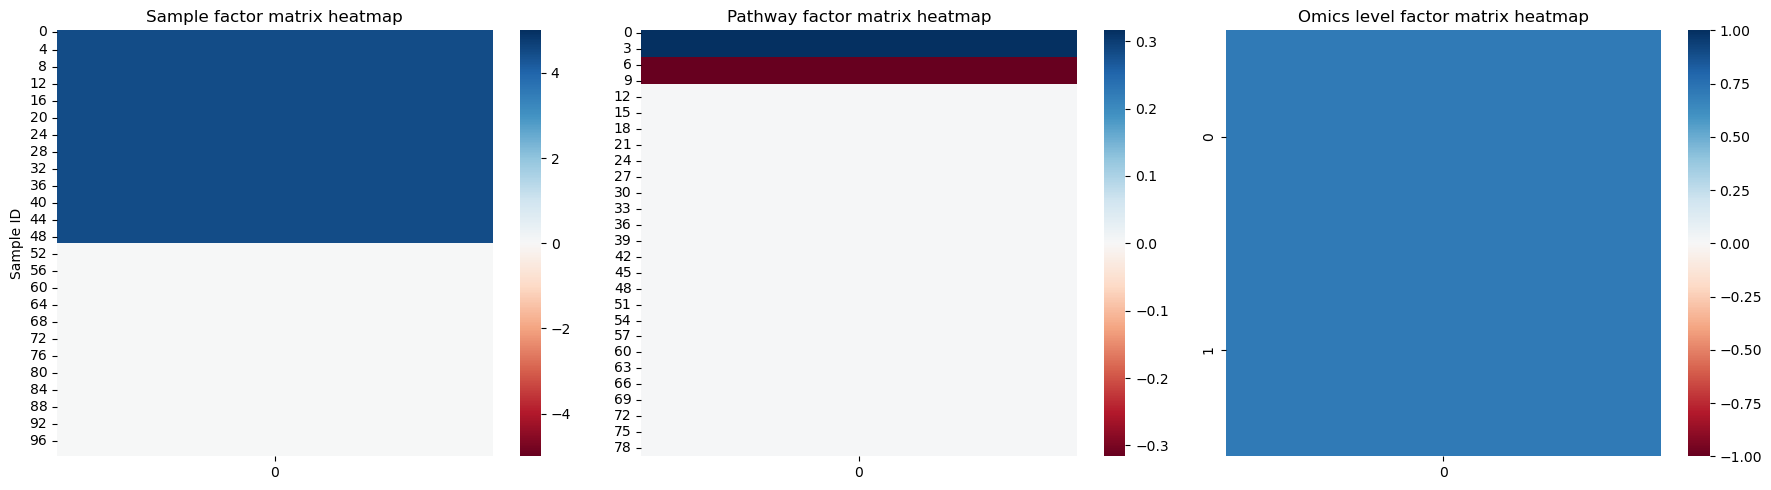

In [64]:
weight, factors = parafac(X_1,rank=1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu')
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

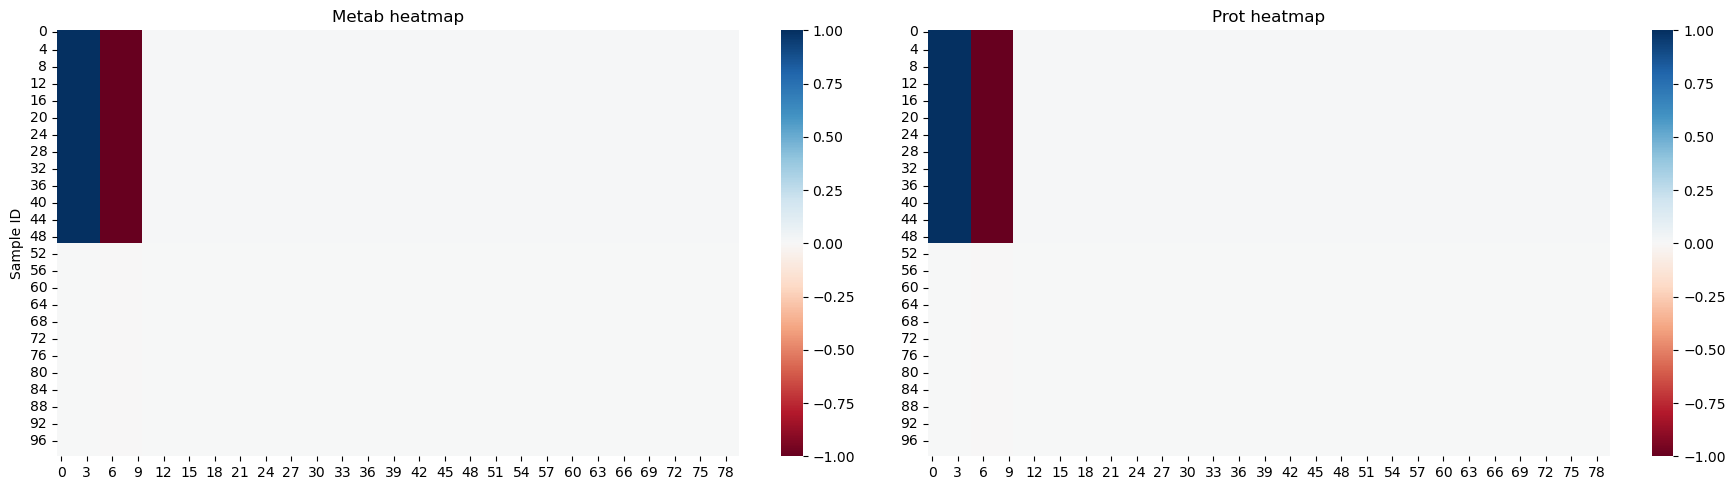

In [66]:
X_1_u_v1 = tl.cp_tensor.cp_to_tensor((None,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_1_u_v1[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_1_u_v1[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

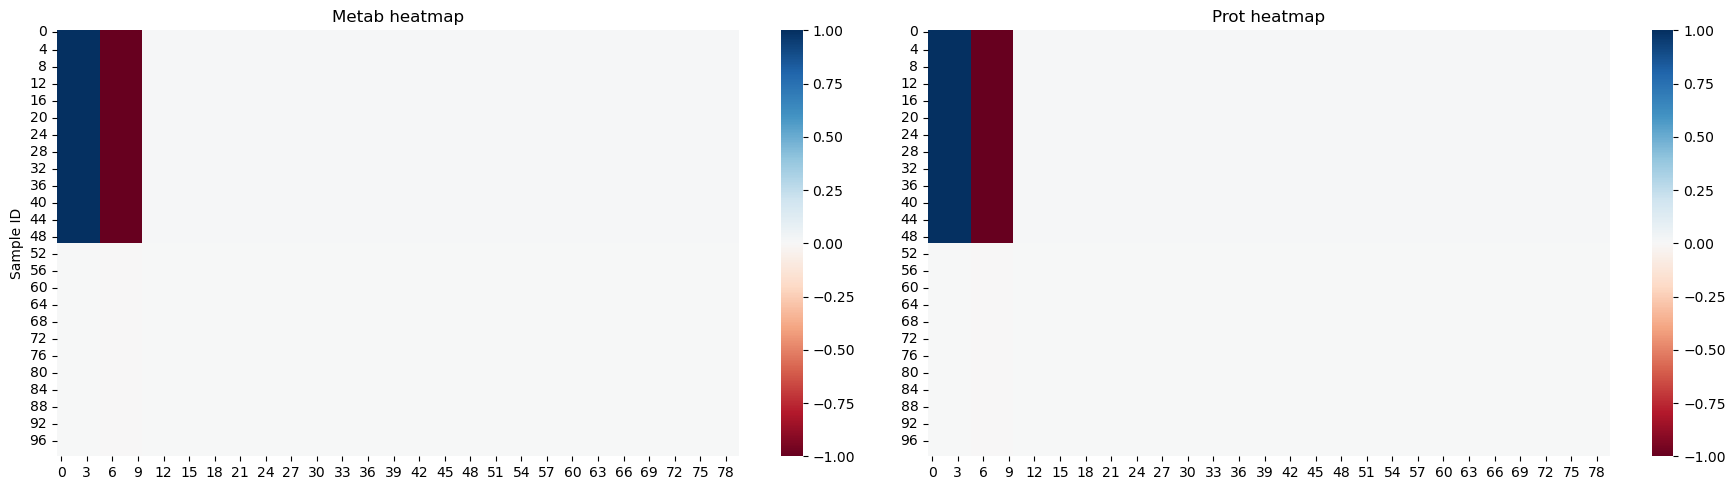

In [67]:
X_0_u_v1,_,_ = construct_tensor(factors[0],factors[1],factors[2])

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_0_u_v1[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_0_u_v1[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

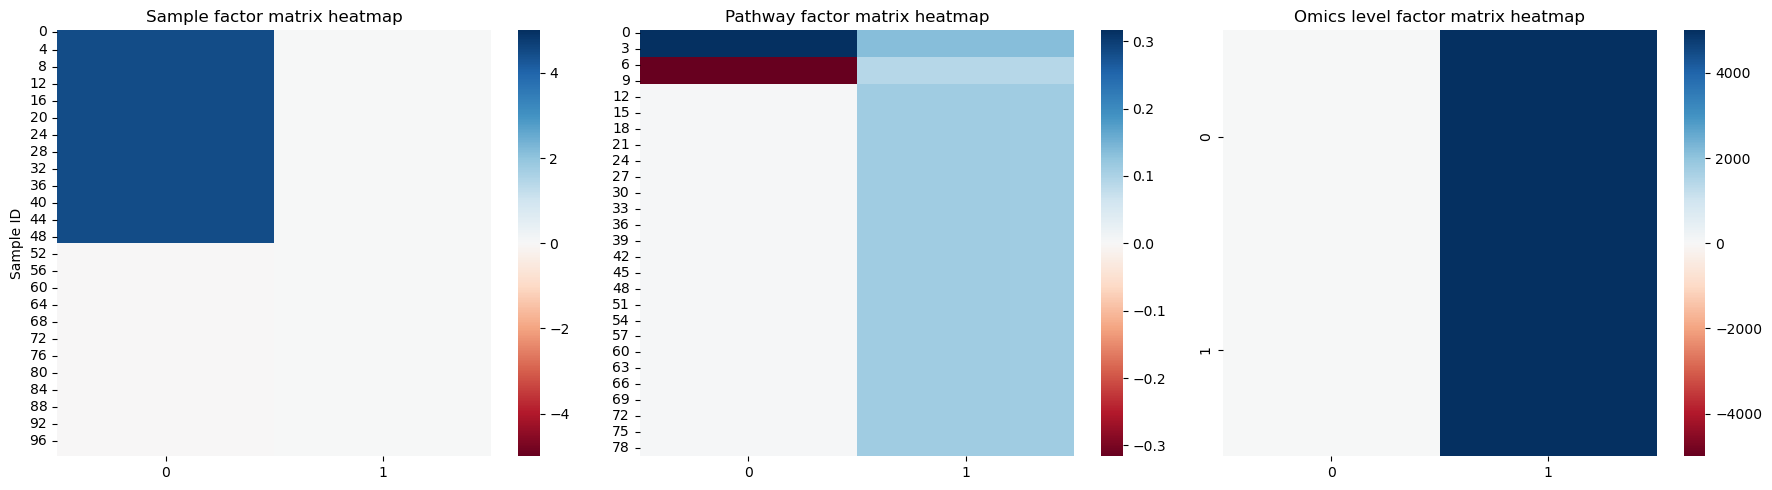

In [38]:
weight, factors = parafac(X_1,rank=2)
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5, vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu')
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-5000, vmax=5000)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

In [41]:
# Note again, core consistency from rank=2 and above
df_rank_evaluation(X_1, 10,diabetes_binary,LinearRegression())

Core consistency       Fit  Sum Squared Error  \
Number of components                                                  
1                         1.000000e+02  0.999202       7.995100e-01   
2                        -4.646755e+28  1.000000       4.487537e-28   
3                        -4.183319e+18  1.000000       1.324283e-22   
4                        -2.810177e+25  1.000000       1.313481e-23   
5                        -1.302755e+73  1.000000       1.038732e-22   
6                        -7.746659e+62  1.000000       1.941468e-21   
7                       -1.089485e+123  1.000000       4.005062e-23   
8                       -7.406054e+121  1.000000       5.274043e-21   
9                       -5.561196e+181  1.000000       6.329705e-20   
10                      -6.956331e+189  1.000000       5.063113e-23   

                      Predictive Power  Degeneracy Score  
Number of components                                      
1                                  1.0          1.000000  
2                                  1.0          0.000253  
3                                  1.0          0.992552  
4                                  1.0          0.993283  
5                                  1.0          0.995131  
6                                  1.0          0.997008  
7                                  1.0          0.991756  
8                                  1.0          0.998013  
9                                  1.0          0.999630  
10                                 1.0          0.996723

#### 2
- scenario: 100 samples, 80 pathways, 2 omic levels;
100 samples: 50 diabetic, 50 non-diabetic;
80 pathways: 10 light up (5 up, 5 down), 70 dont;
2 omic levels: 5 up in metab, 5 down in prot

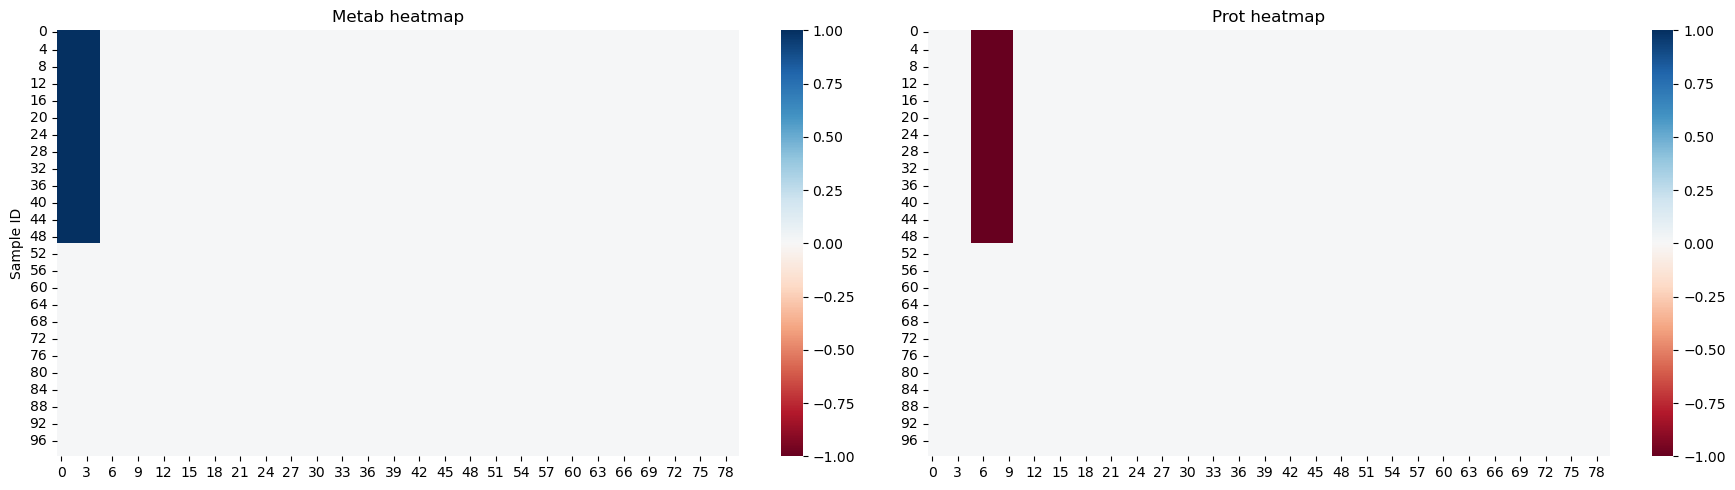

In [181]:
metab_2 = np.full((100,80), 0.01)
metab_2[:50,:5] = 1

prot_2 = np.full((100,80), 0.01)
prot_2[:50,5:10]=-1

X_2 = tl.stack([metab_2,prot_2],axis=2)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_2, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_2, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

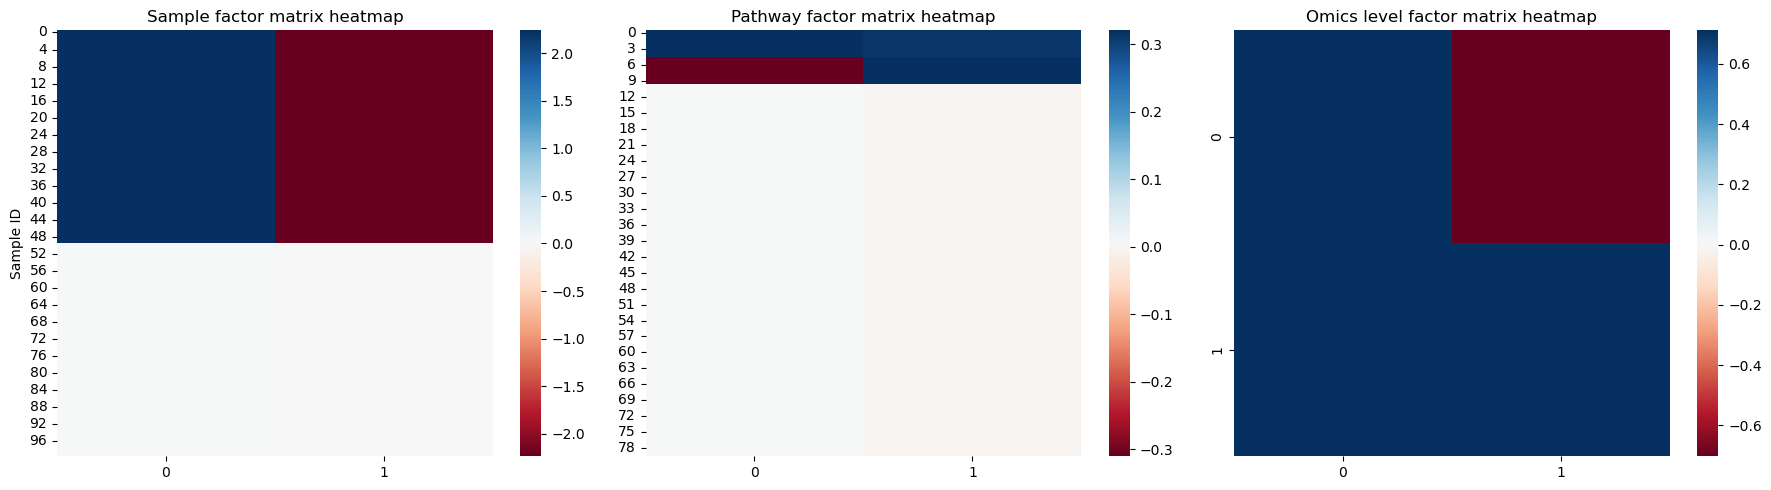

In [183]:
weight, factors = parafac(X_2,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu')
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu')
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu')
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

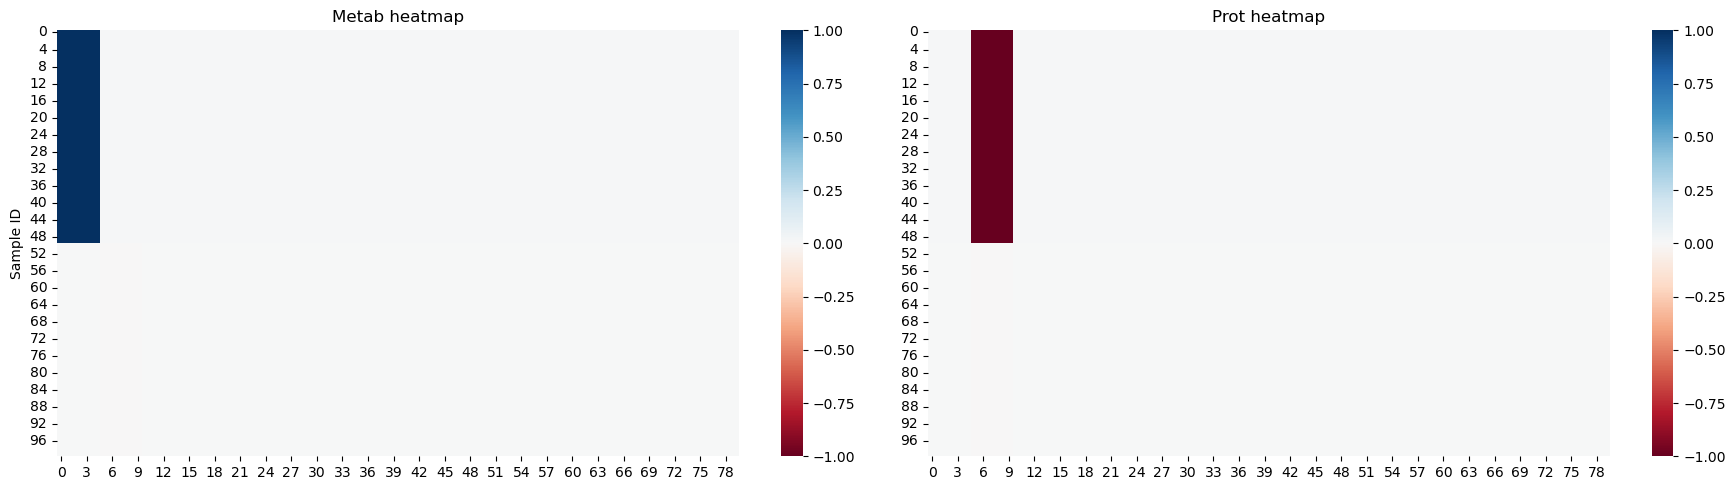

In [184]:
X_2_r2 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_2_r2[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_2_r2[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

In [47]:
df_rank_evaluation(X_2,10,diabetes_binary,LinearRegression())

Core consistency       Fit  Sum Squared Error  \
Number of components                                                  
1                         1.000000e+02  0.499905       2.508227e+02   
2                        -3.681400e+03  0.998410       7.975551e-01   
3                         3.154724e+01  1.000000       2.179609e-14   
4                        -2.629945e+29  1.000000       1.689579e-25   
5                        -5.321180e+57  1.000000       8.762396e-21   
6                        -2.824699e+67  1.000000       6.335803e-22   
7                       -2.038302e+125  1.000000       3.319522e-21   
8                       -1.810378e+127  1.000000       9.283508e-24   
9                       -6.960718e+184  1.000000       2.407222e-21   
10                      -6.939020e+188  1.000000       5.394961e-23   

                      Predictive Power  Degeneracy Score  
Number of components                                      
1                                  1.0          1.000000  
2                                  1.0          0.000039  
3                                  1.0          0.000096  
4                                  1.0          0.338496  
5                                  1.0          0.796935  
6                                  1.0          0.930687  
7                                  1.0          0.914403  
8                                  1.0          0.959217  
9                                  1.0          0.931674  
10                                 1.0          0.977130

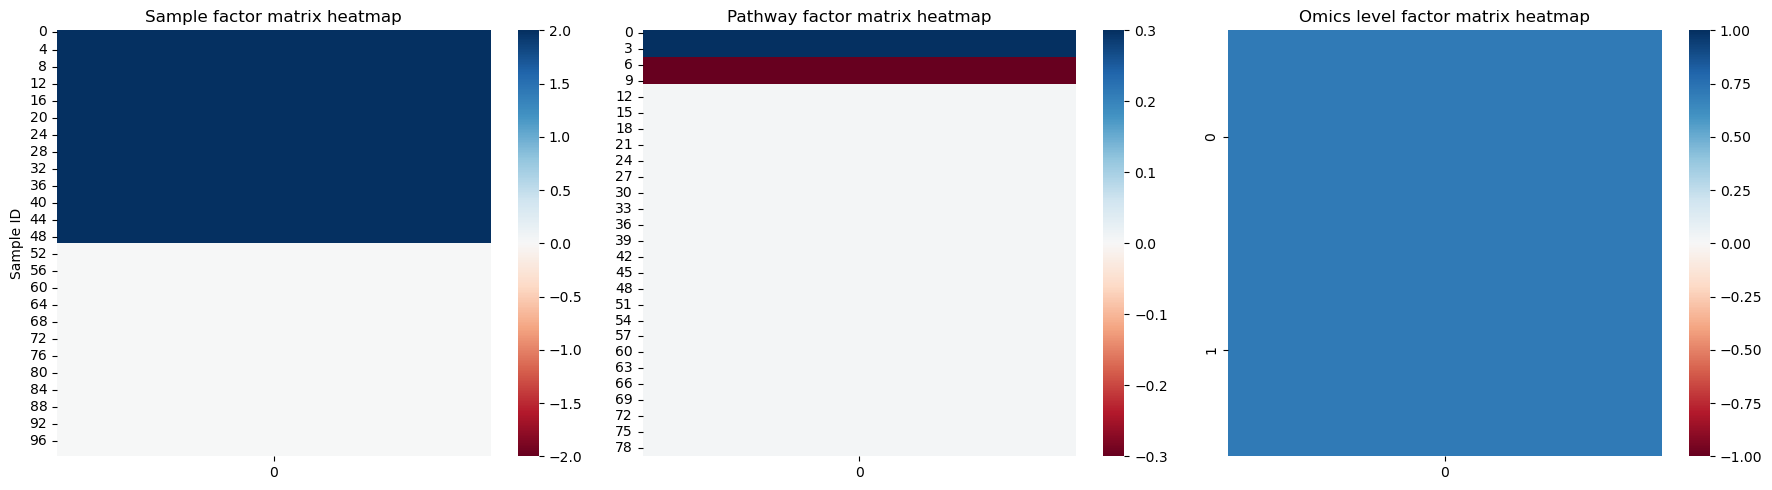

In [185]:
weight, factors = parafac(X_2,rank=1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-2,vmax=2)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-0.3, vmax=0.3)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

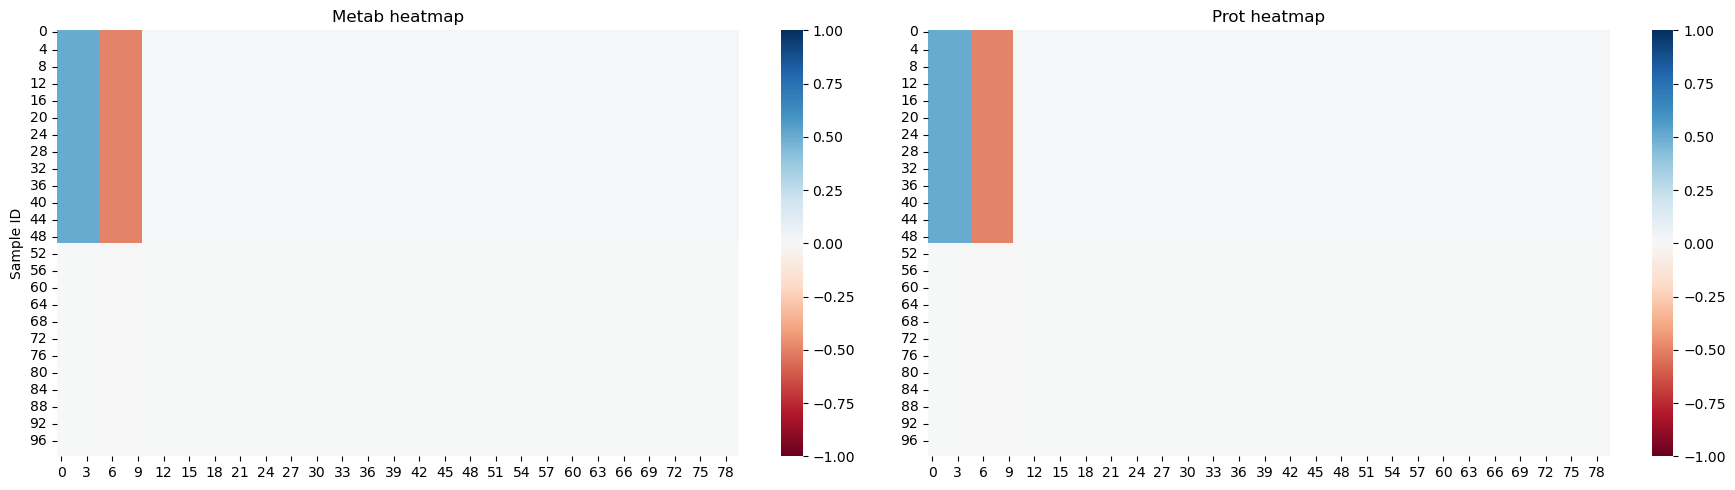

In [186]:
X_2_r1 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_2_r1[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_2_r1[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

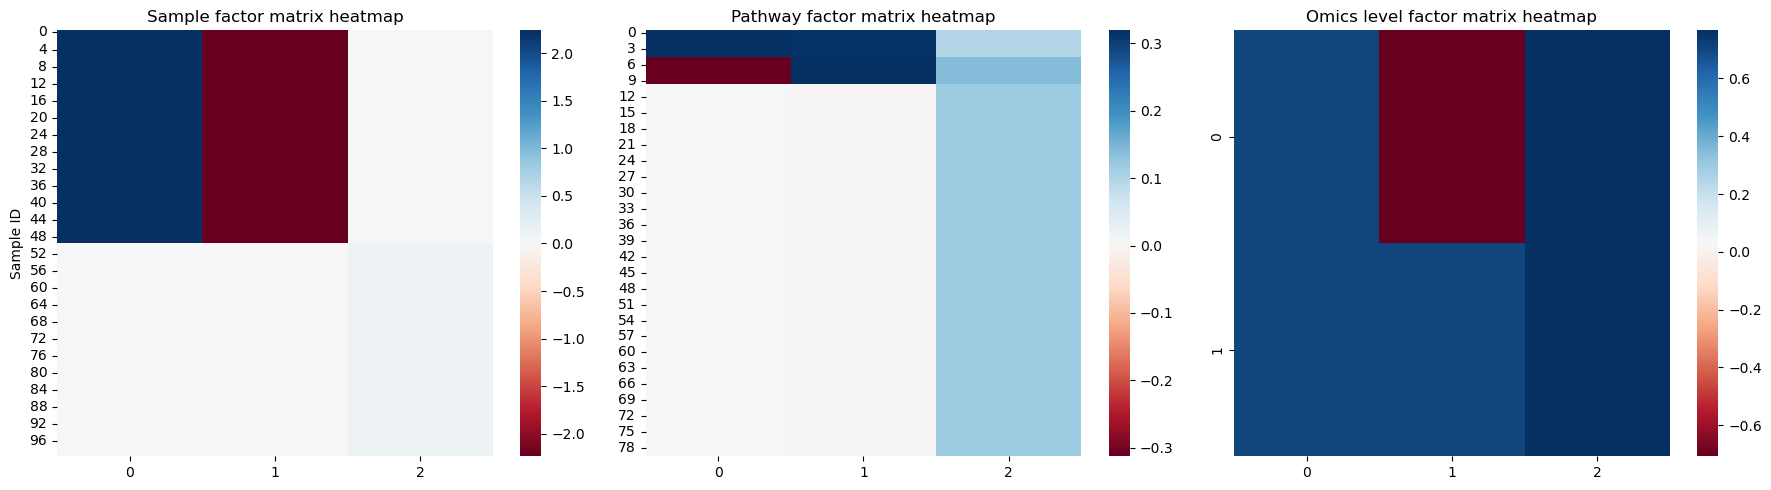

In [49]:
weight, factors = parafac(X_2,rank=3)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu')
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu')
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu')
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

#### 3
- scenario: 100 samples, 80 pathways, 2 omic levels;
100 samples: 50 diabetic, 50 non-diabetic;
80 pathways: 10 light up, 70 dont;
2 omic levels: 10 up in metab, the same 10 down in metab

- Conclusion: since there is only one pattern (complete opposite) between the two omics, rank=1

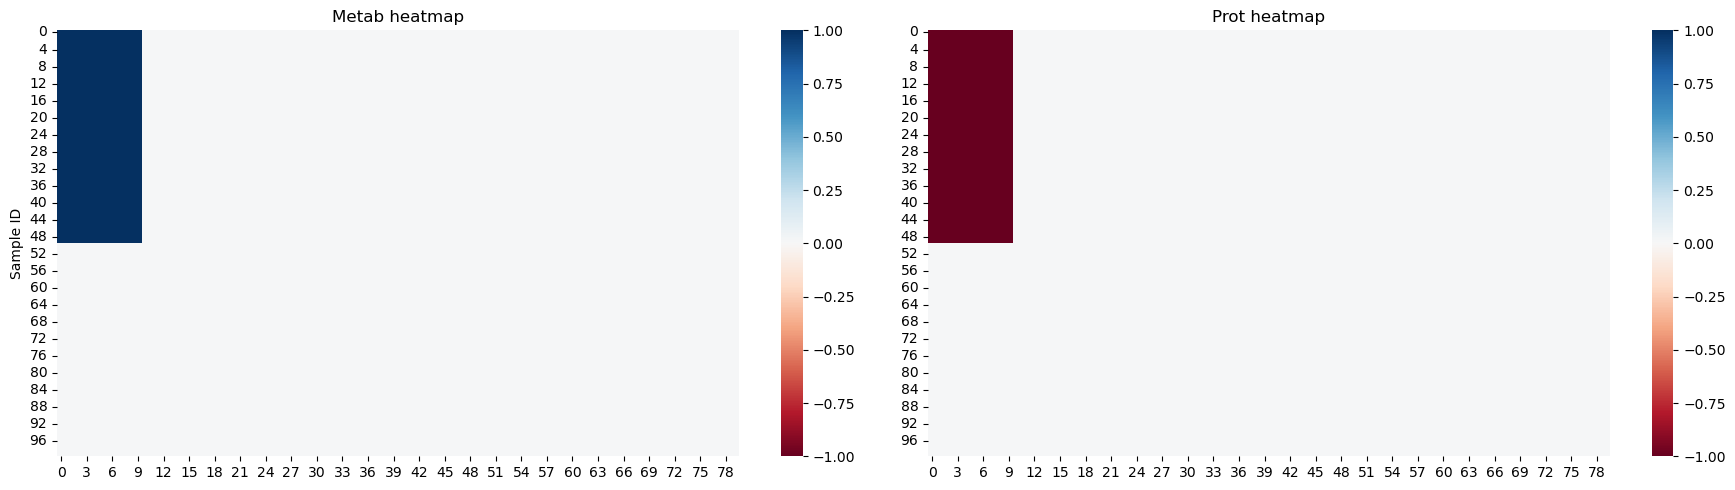

In [188]:
metab_3 = np.full((100,80), 0.01)
metab_3[:50,:10] = 1

prot_3 = np.full((100,80), 0.01)
prot_3[:50,:10]=-1

X_3 = tl.stack([metab_3,prot_3],axis=2)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_3, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_3, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

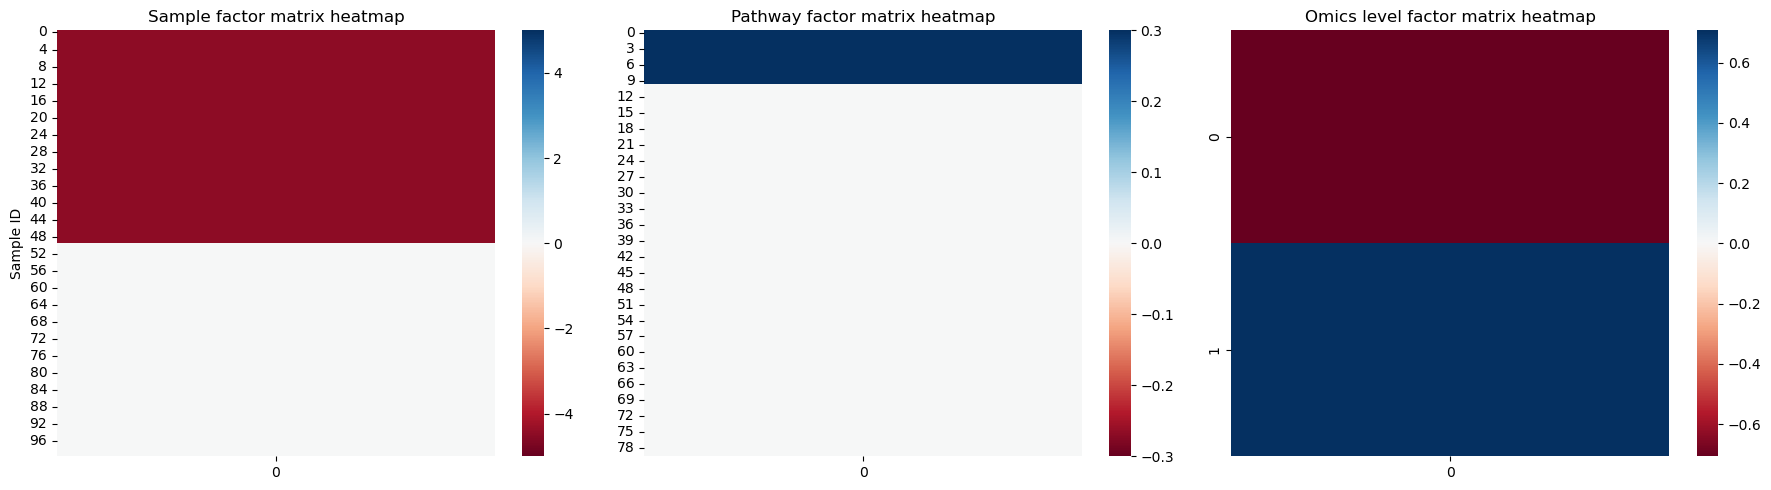

In [189]:
weight, factors = parafac(X_3,rank=1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-0.3,vmax=0.3)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu')
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

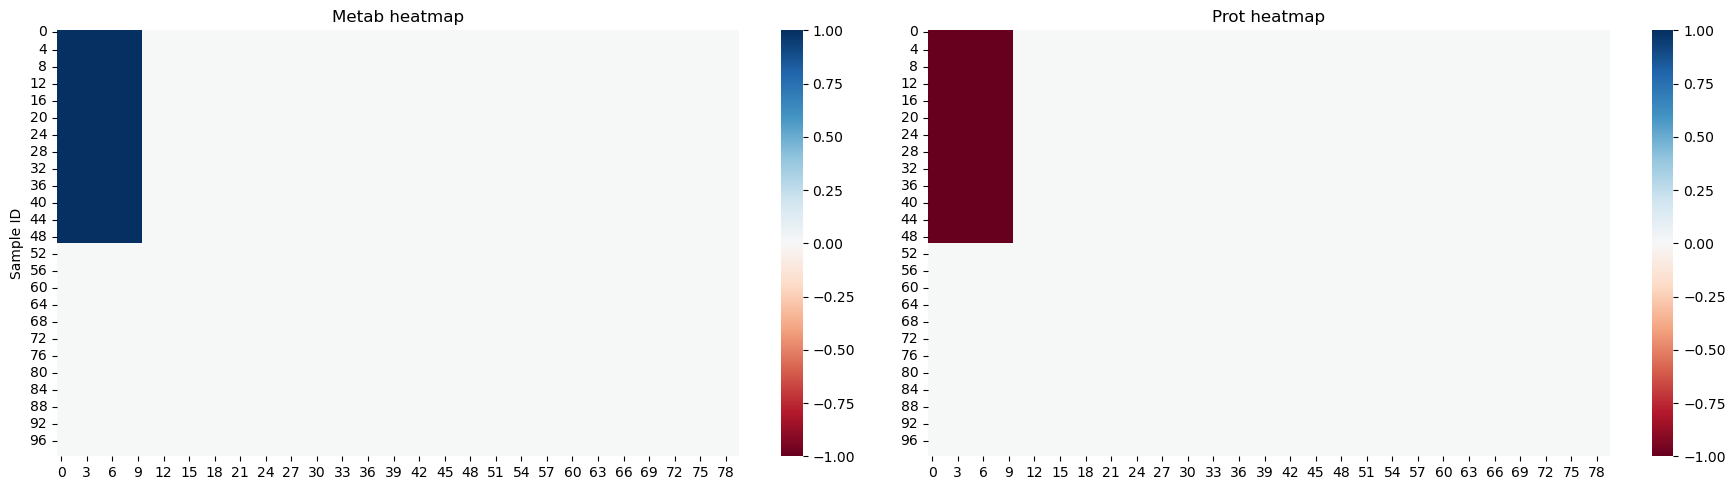

In [190]:
X_3_v2 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_3_v2[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_3_v2[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

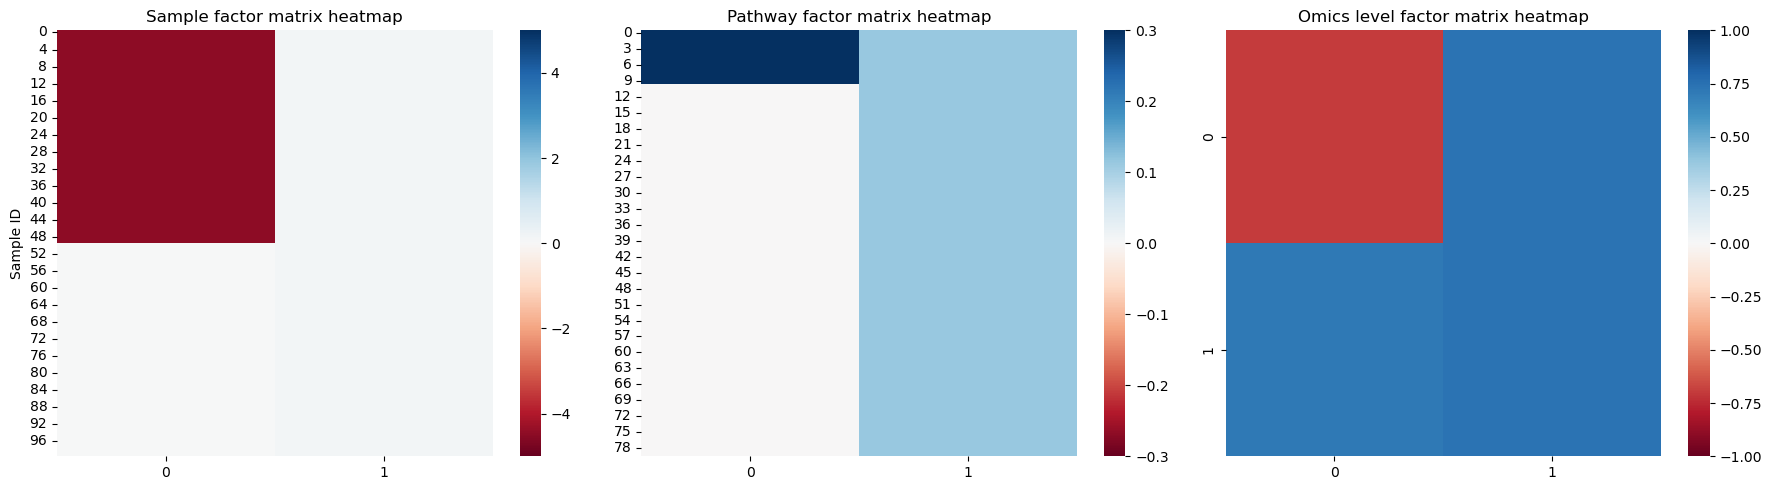

In [191]:
weight, factors = parafac(X_3,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-0.3,vmax=0.3)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

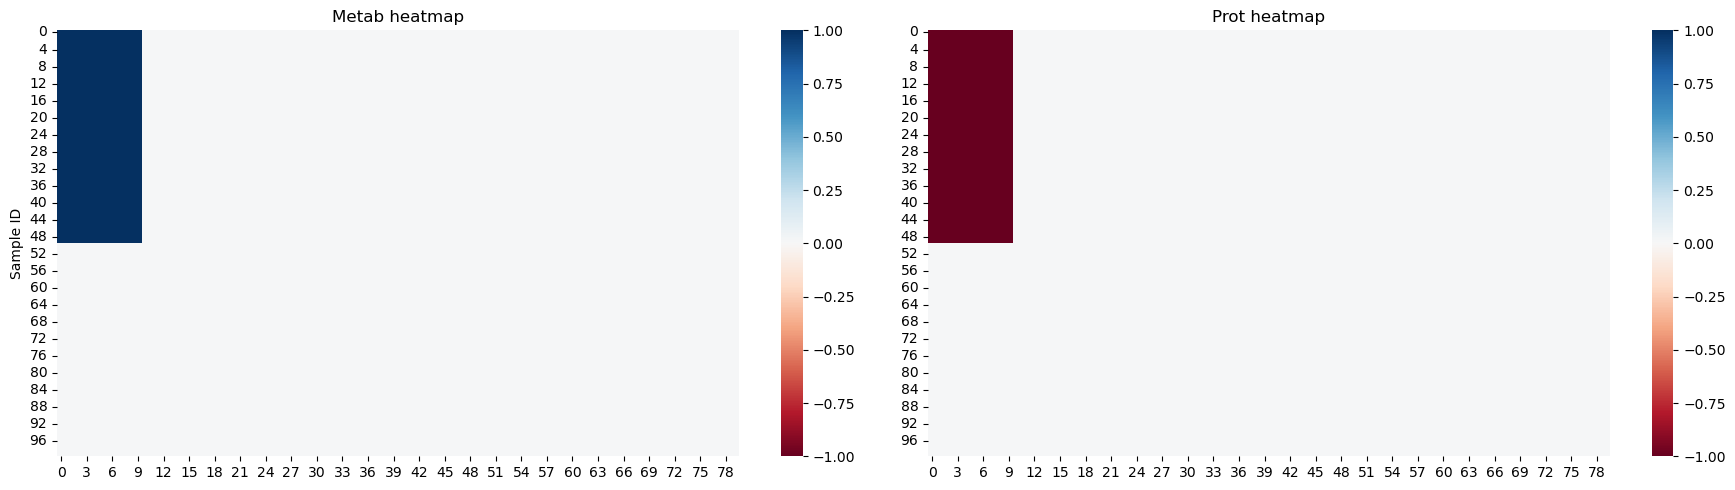

In [192]:
X_3_v2 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_3_v2[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_3_v2[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

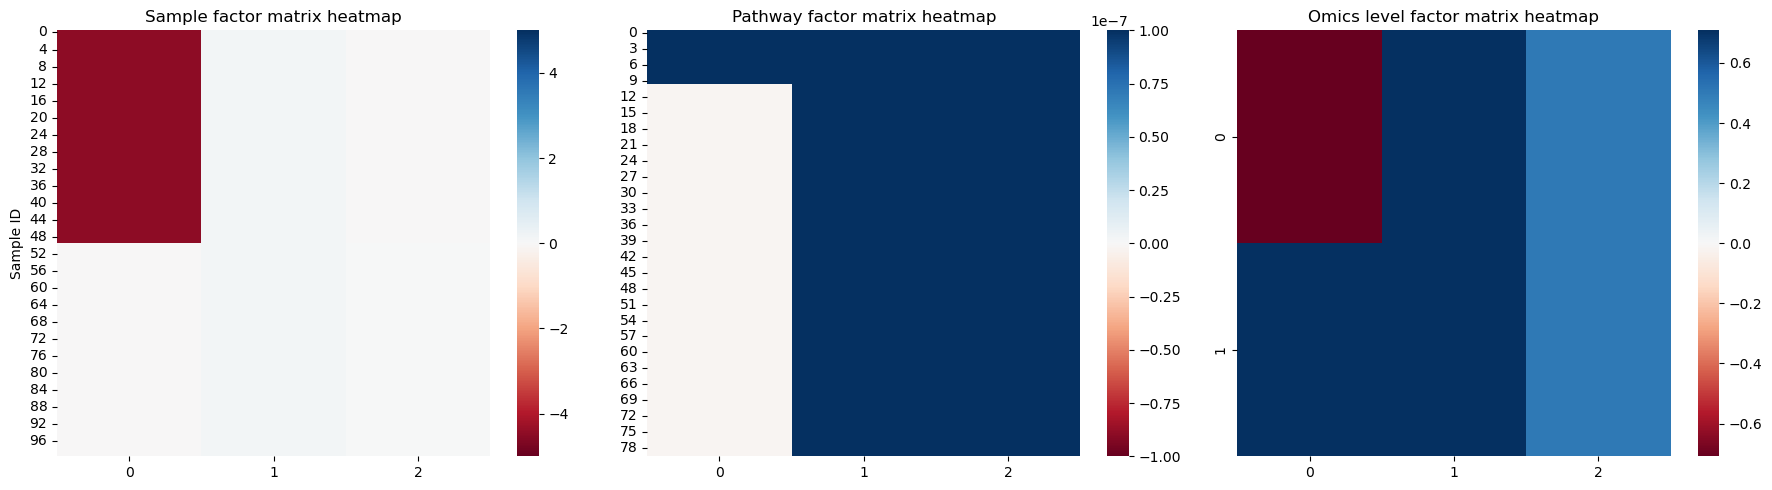

In [55]:
weight, factors = parafac(X_3,rank=3)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-0.0000001,vmax=0.0000001)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu')
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

#### 4
- scenario: 100 samples, 80 pathways, 2 omic levels;
100 samples: 50 diabetic, 50 non-diabetic;
80 pathways: 10 light up, 70 dont;
2 omic levels: 5 up 5 down, but reverse in the two omics

- Conclusion: again, only one pattern between the two omics levels so rank=1

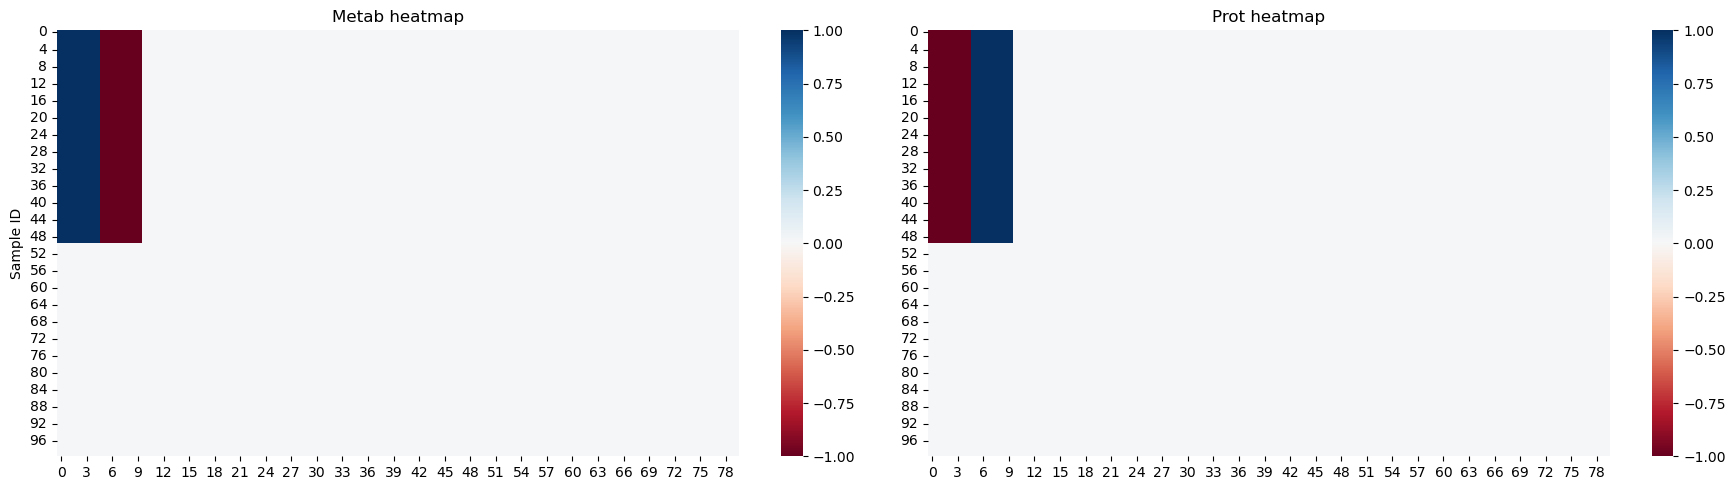

In [194]:
metab_4 = np.full((100,80), 0.01)
metab_4[:50,:5] = 1
metab_4[:50,5:10] =-1

prot_4 = np.full((100,80), 0.01)
prot_4[:50,:5]=-1
prot_4[:50,5:10] =1

X_4 = tl.stack([metab_4,prot_4],axis=2)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_4, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_4, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

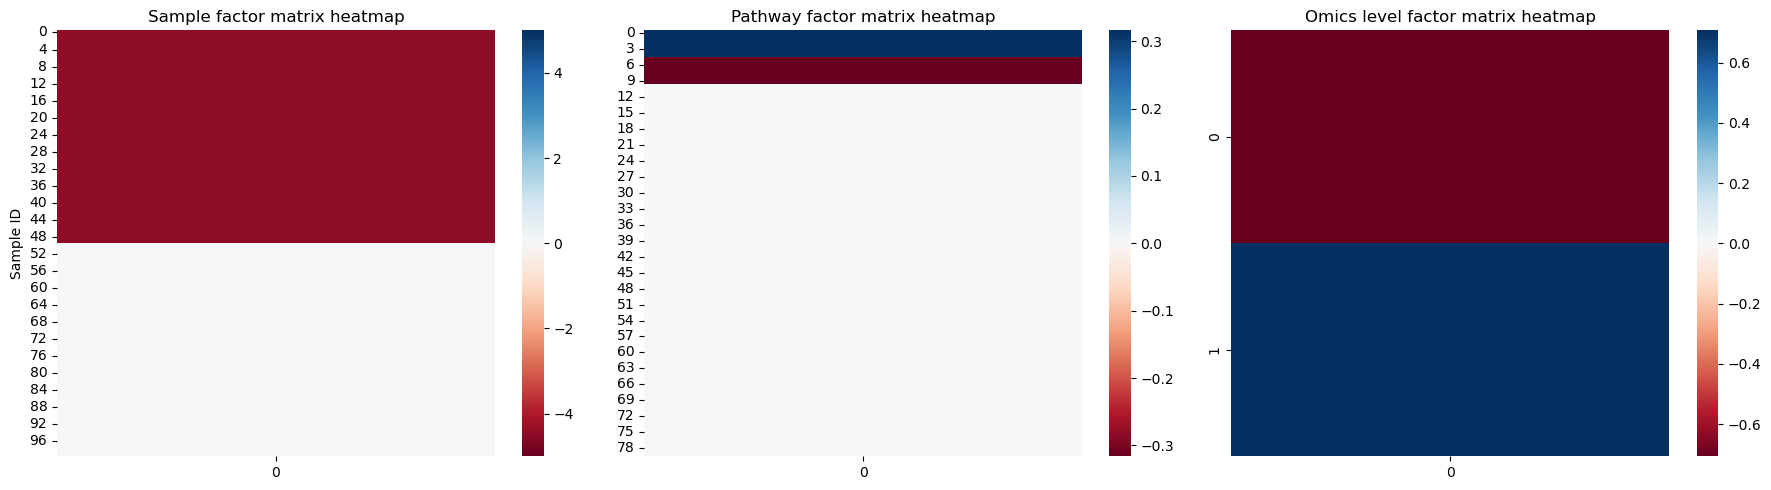

In [195]:
weight, factors = parafac(X_4,rank=1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu')
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu')
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

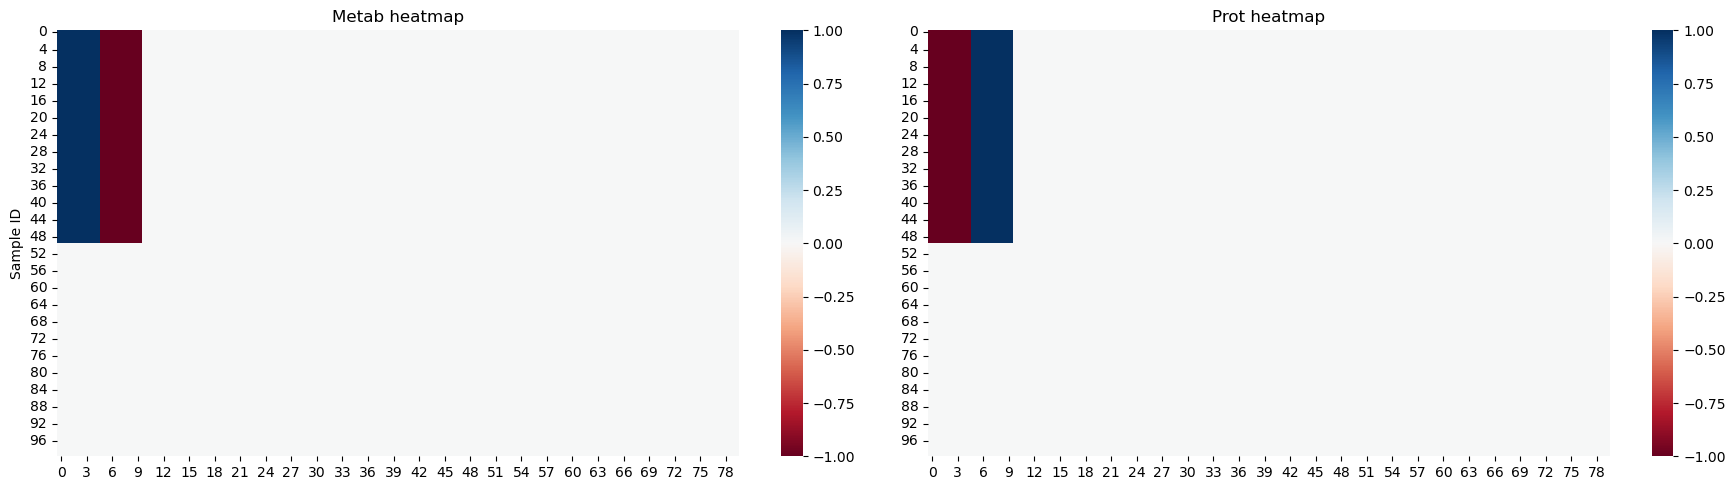

In [196]:
X_4_v1 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_4_v1[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_4_v1[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

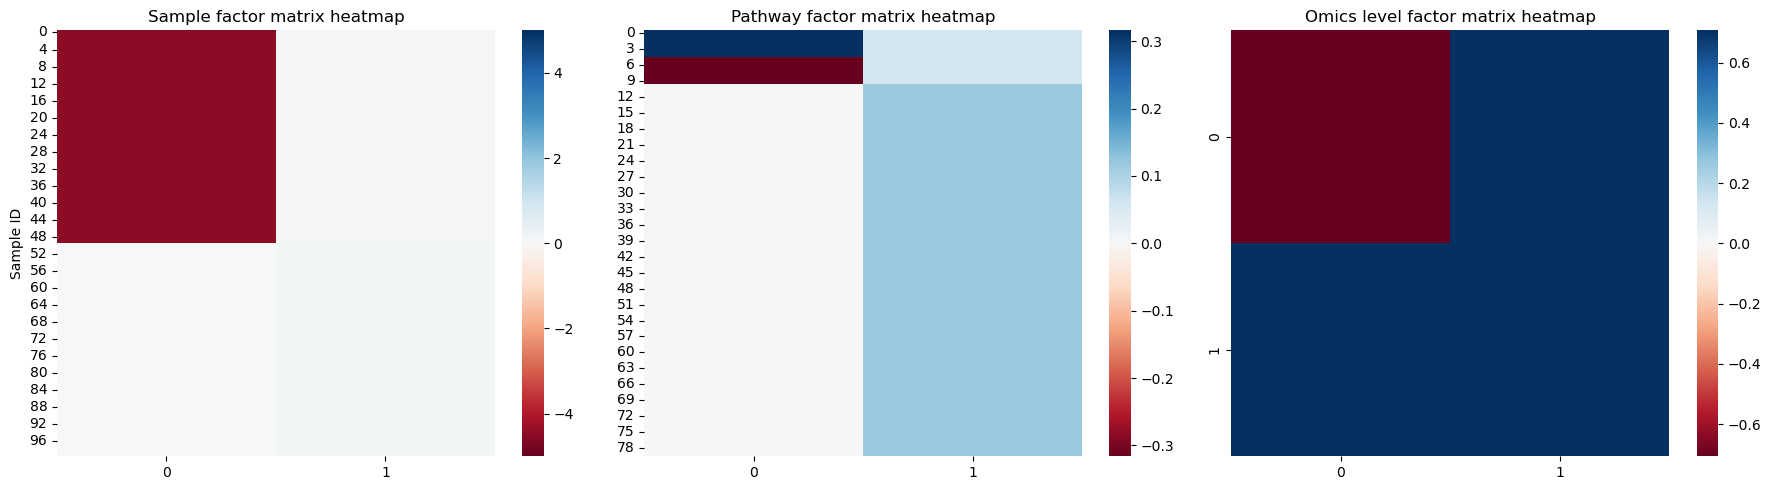

In [197]:
weight, factors = parafac(X_4,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu')
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu')
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

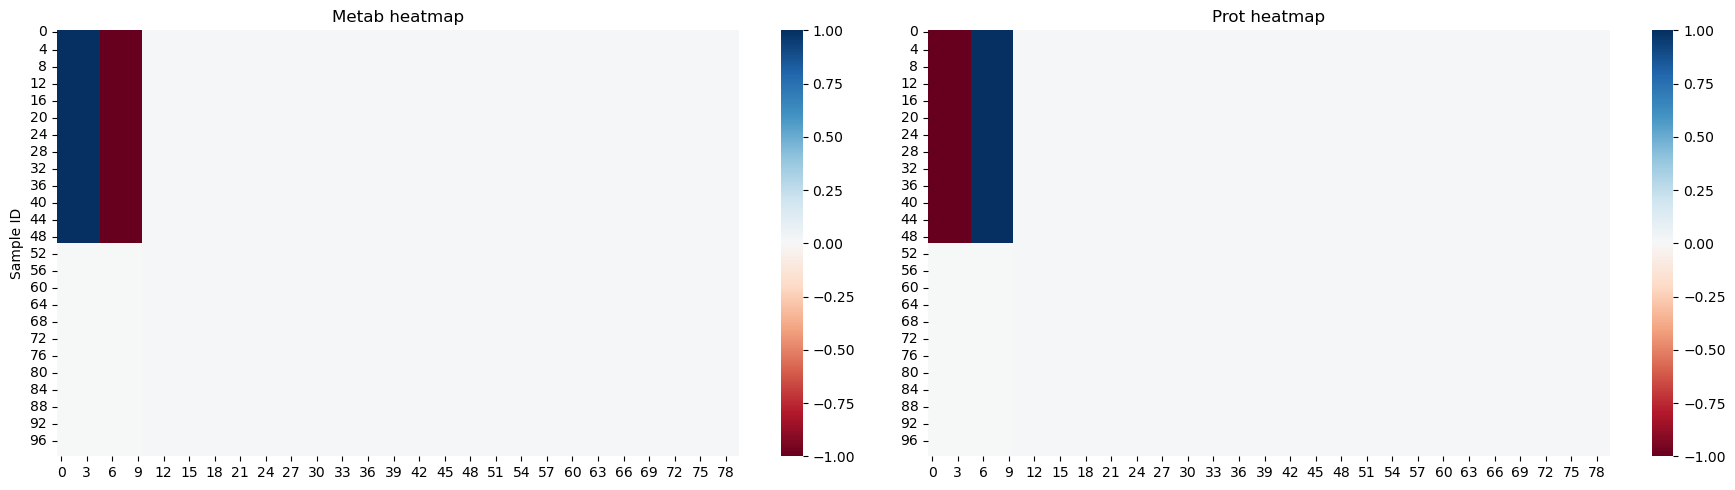

In [198]:
X_4_v1 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_4_v1[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_4_v1[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

#### 5
- scenario: 100 samples, 80 pathways, 2 omic levels;
100 samples: 50 diabetic, 50 non-diabetic;
80 pathways: 10 differentiate diab/non-diab, another 10 noise pathways added to metab level (do not correlate to diabetes)
2 omic levels: 5 up 5 down, but reverse in the two omics

- Conclusion: noise very small, so essentially a rank=1

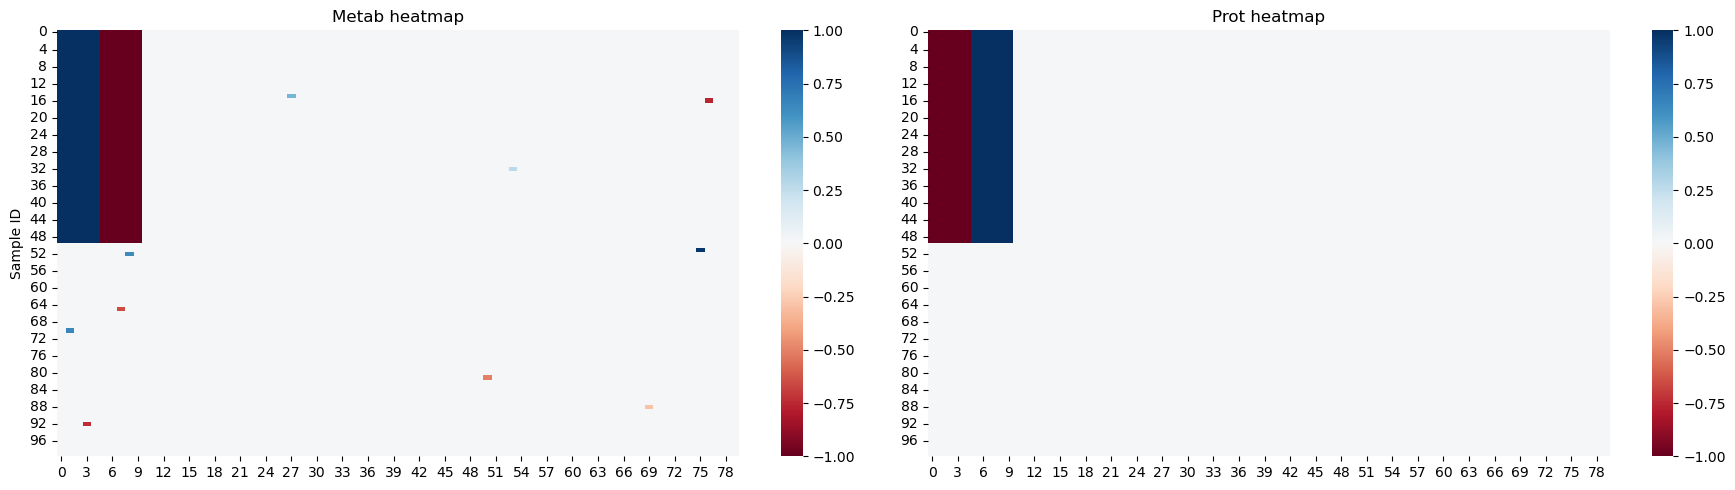

In [68]:
metab_5 = np.full((100,80), 0.01)
metab_5[:50,:5] = 1
metab_5[:50,5:10] =-1
random_sam_metab = np.random.choice(metab_5.shape[0], size=10, replace=False)
random_path_metab = np.random.choice(metab_5.shape[1], size=10, replace=False)

random_values = np.random.uniform(-1, 1, size=10)
metab_5[random_sam_metab,random_path_metab] = random_values

prot_5 = np.full((100,80), 0.01)
prot_5[:50,:5]=-1
prot_5[:50,5:10] =1

X_5 = tl.stack([metab_5,prot_5],axis=2)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_5, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_5, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

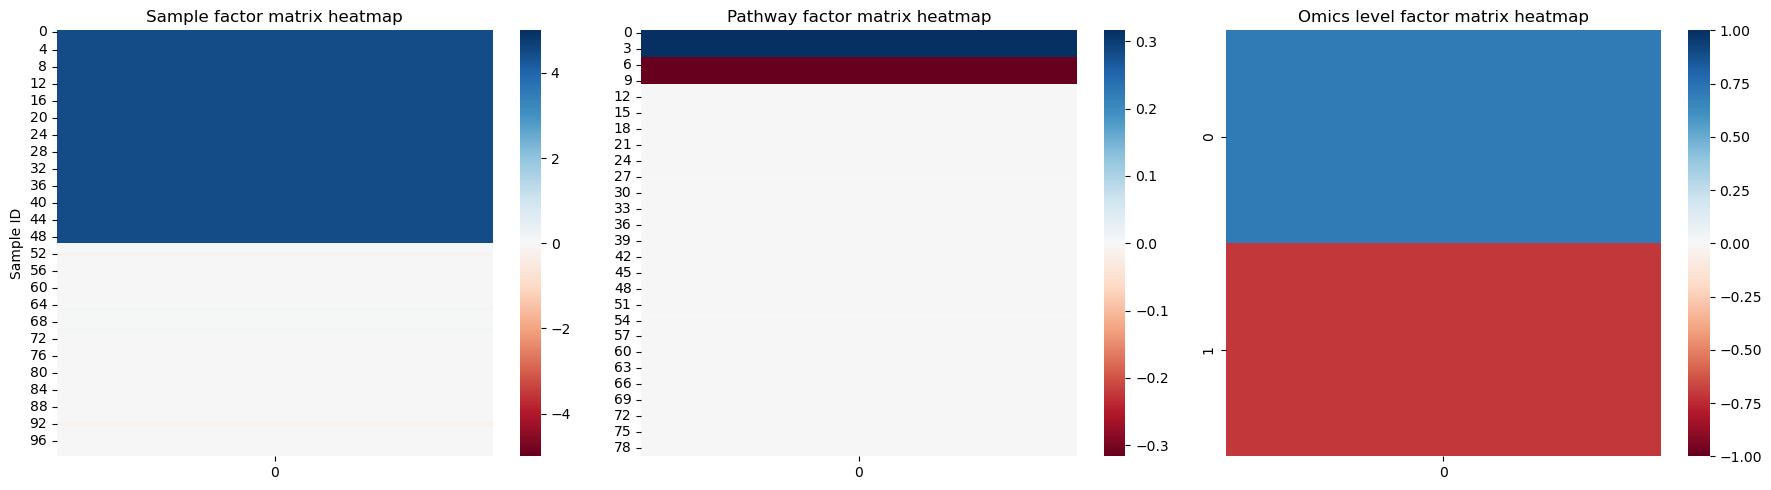

In [69]:
weight, factors = parafac(X_5,rank=1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu')
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

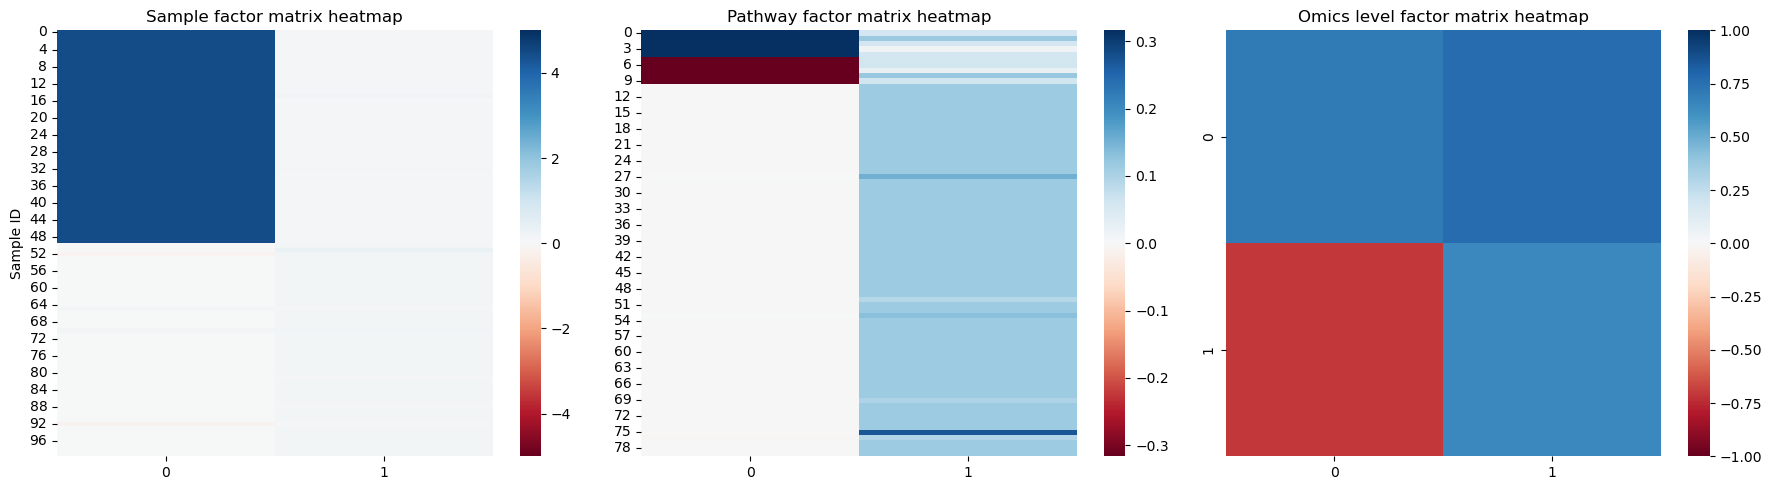

In [70]:
weight, factors = parafac(X_5,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu')
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

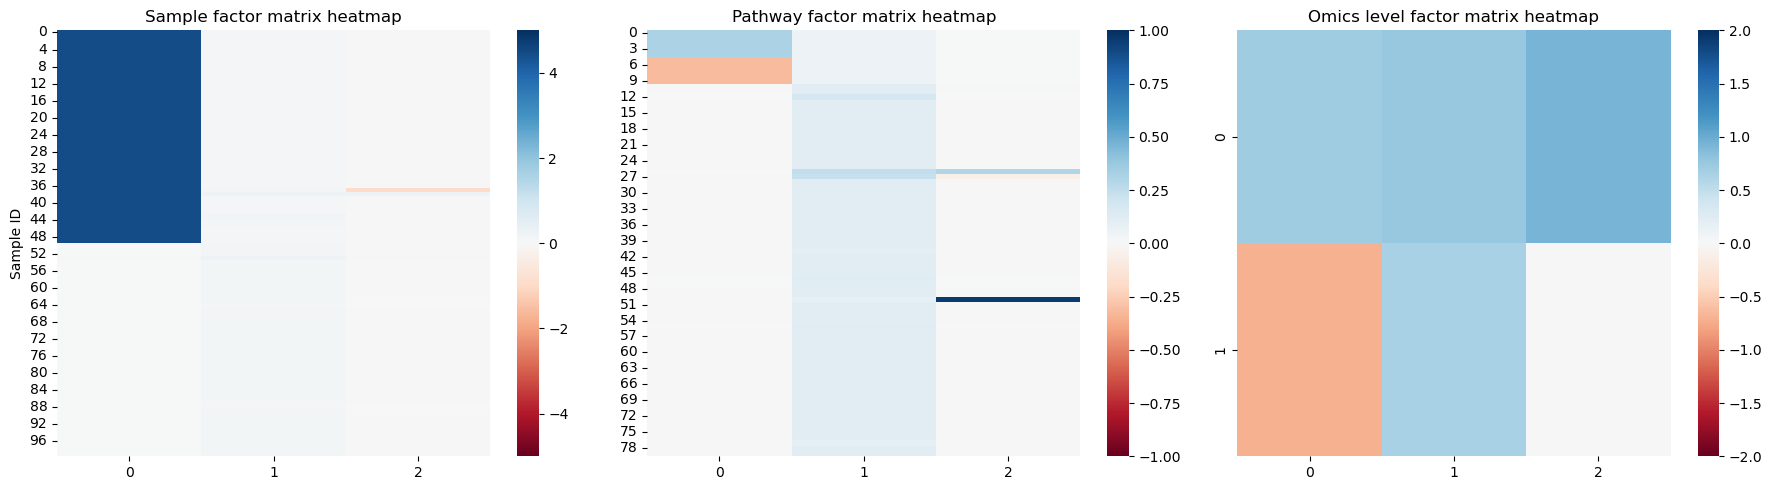

In [68]:
weight, factors = parafac(X_5,rank=3)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-2,vmax=2)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

#### 6
- scenario: 100 samples, 80 pathways, 2 omic levels;
100 samples: 50 diabetic, 50 non-diabetic;
80 pathways: 10 differentiate diab/non-diab, another 10 noise pathways added to metab level (do not correlate to diabetes), another 10 noise pathways added to prot level
2 omic levels: 5 up 5 down, but reverse in the two omics

- Conclusion: again, noise too samll, essentially rank=1

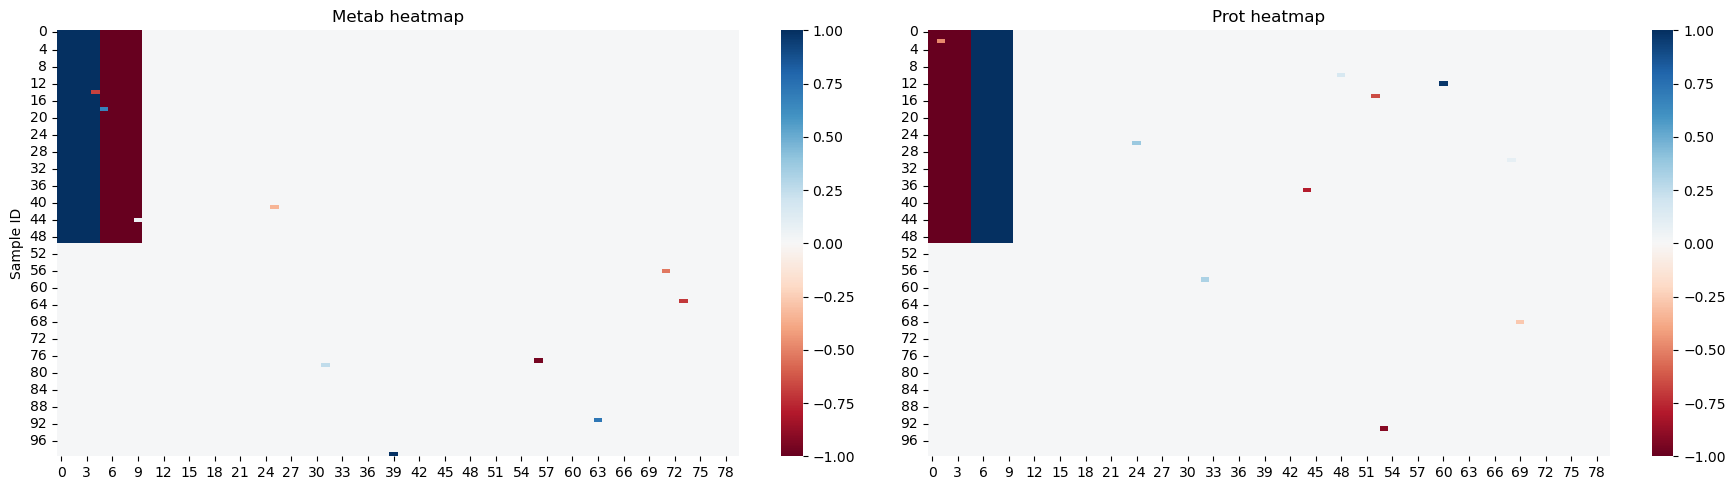

In [69]:
metab_6 = np.full((100,80), 0.01)
metab_6[:50,:5] = 1
metab_6[:50,5:10] =-1
random_sam_metab = np.random.choice(metab_6.shape[0], size=10, replace=False)
random_path_metab = np.random.choice(metab_6.shape[1], size=10, replace=False)

random_values = np.random.uniform(-1, 1, size=10)
metab_6[random_sam_metab,random_path_metab] = random_values

prot_6 = np.full((100,80), 0.01)
prot_6[:50,:5]=-1
prot_6[:50,5:10] =1

random_sam_prot = np.random.choice(prot_6.shape[0], size=10, replace=False)
random_path_prot = np.random.choice(metab_6.shape[1], size=10, replace=False)

random_values = np.random.uniform(-1, 1, size=10)
prot_6[random_sam_prot,random_path_prot] = random_values

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_6, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_6, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

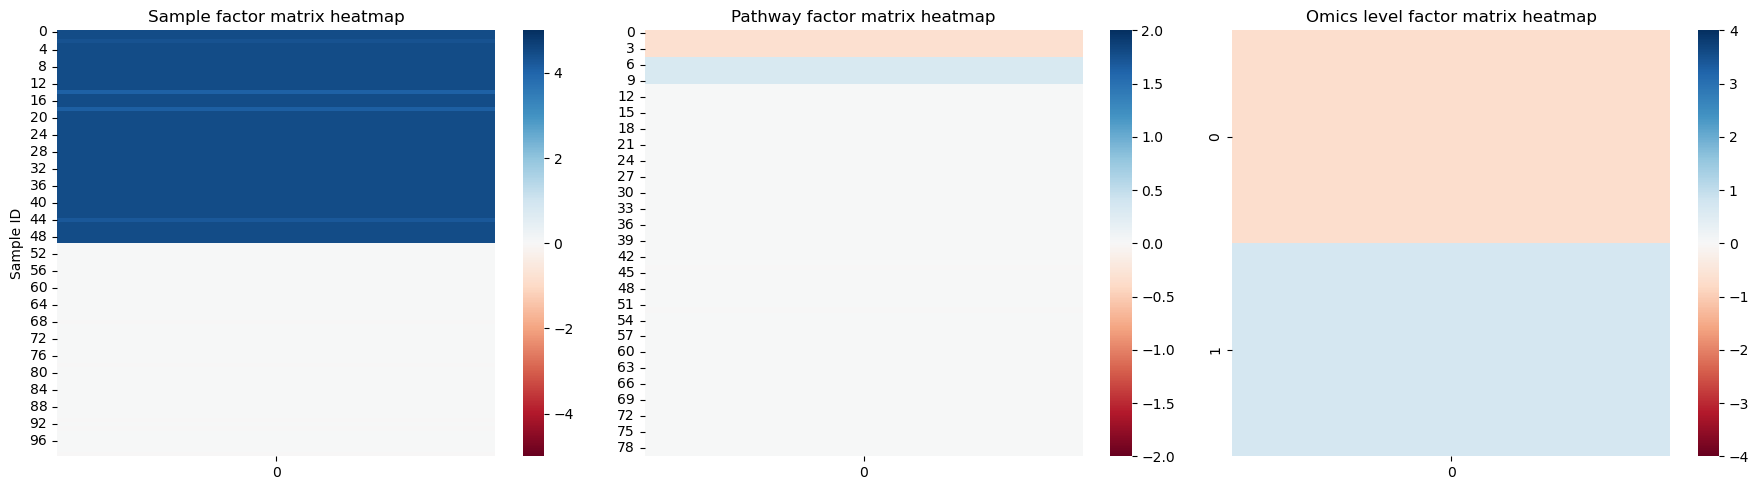

In [73]:
X_6 = tl.stack([metab_6,prot_6],axis=2)

weight, factors = parafac(X_6,rank=1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmax=5,vmin=-5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmax=2,vmin=-2)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmax=4,vmin=-4)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

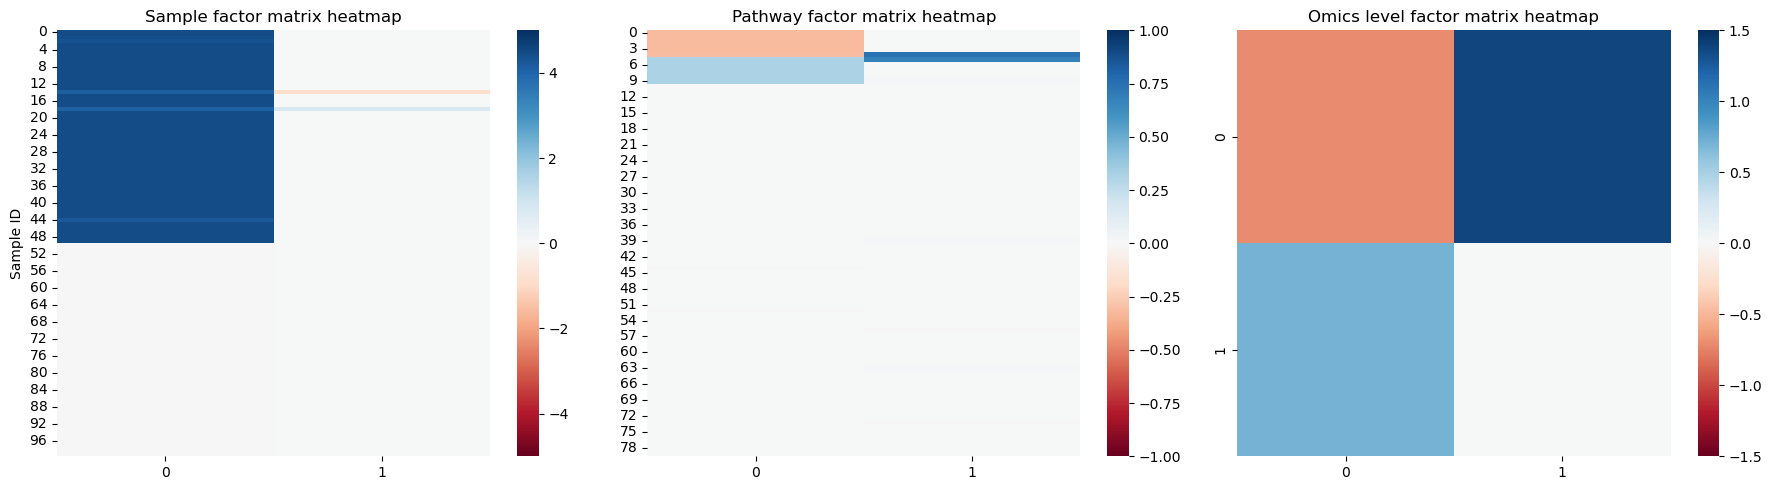

In [72]:
weight, factors = parafac(X_6,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1.5,vmax=1.5)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

#### 7
- scenario: 100 samples, 80 pathways, 2 omic levels;
100 samples: 50 diabetic, 50 non-diabetic;
80 pathways: 10 differentiate diab/non-diab, more noise signals
2 omic levels: 5 up 5 down, but reverse in the two omics

- Conclusion: noise still not large enough, rank=1

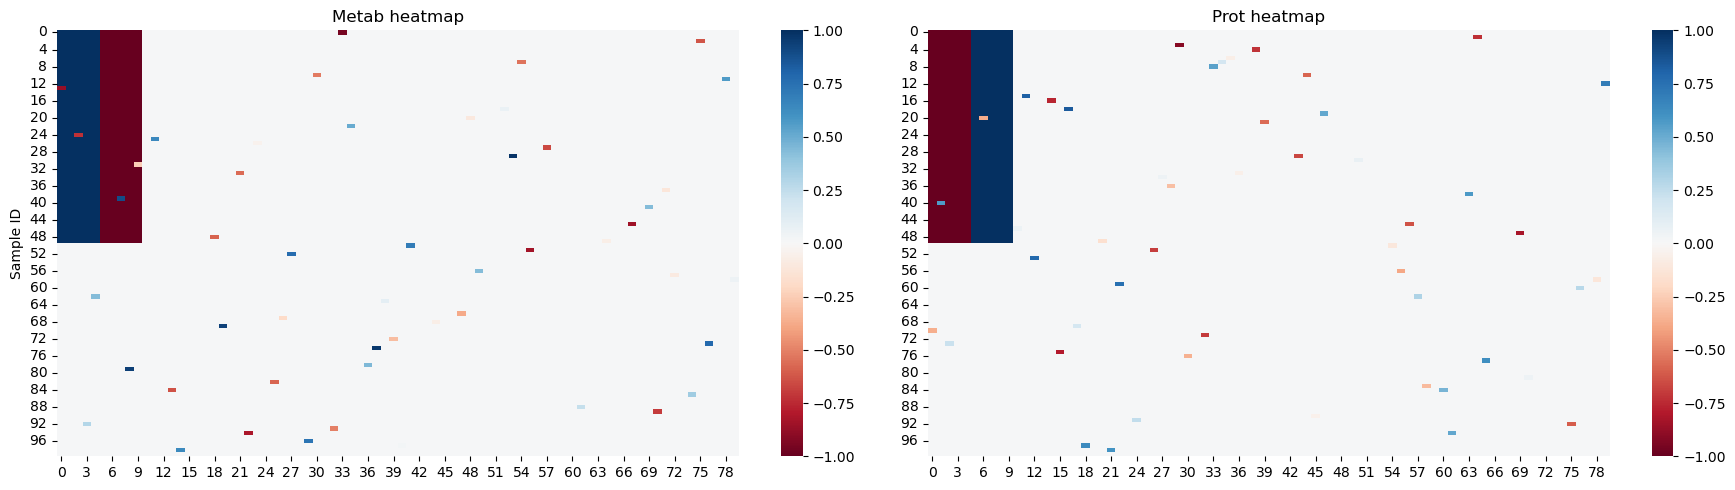

In [74]:
metab_6 = np.full((100,80), 0.01)
metab_6[:50,:5] = 1
metab_6[:50,5:10] =-1
random_sam_metab = np.random.choice(metab_6.shape[0], size=50, replace=False)
random_path_metab = np.random.choice(metab_6.shape[1], size=50, replace=False)

random_values = np.random.uniform(-1, 1, size=50)
metab_6[random_sam_metab,random_path_metab] = random_values

prot_6 = np.full((100,80), 0.01)
prot_6[:50,:5]=-1
prot_6[:50,5:10] =1

random_sam_prot = np.random.choice(prot_6.shape[0], size=50, replace=False)
random_path_prot = np.random.choice(metab_6.shape[1], size=50, replace=False)

random_values = np.random.uniform(-1, 1, size=50)
prot_6[random_sam_prot,random_path_prot] = random_values

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_6, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_6, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

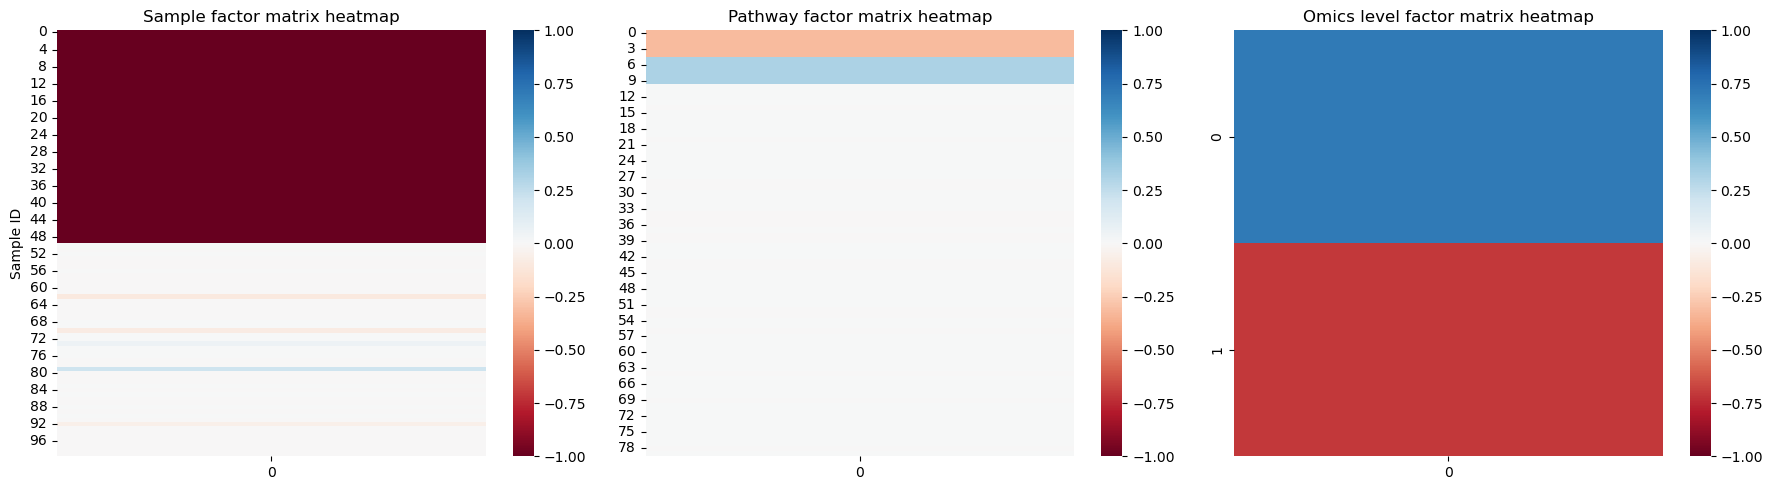

In [77]:
X_6 = tl.stack([metab_6,prot_6],axis=2)

weight, factors = parafac(X_6,rank=1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

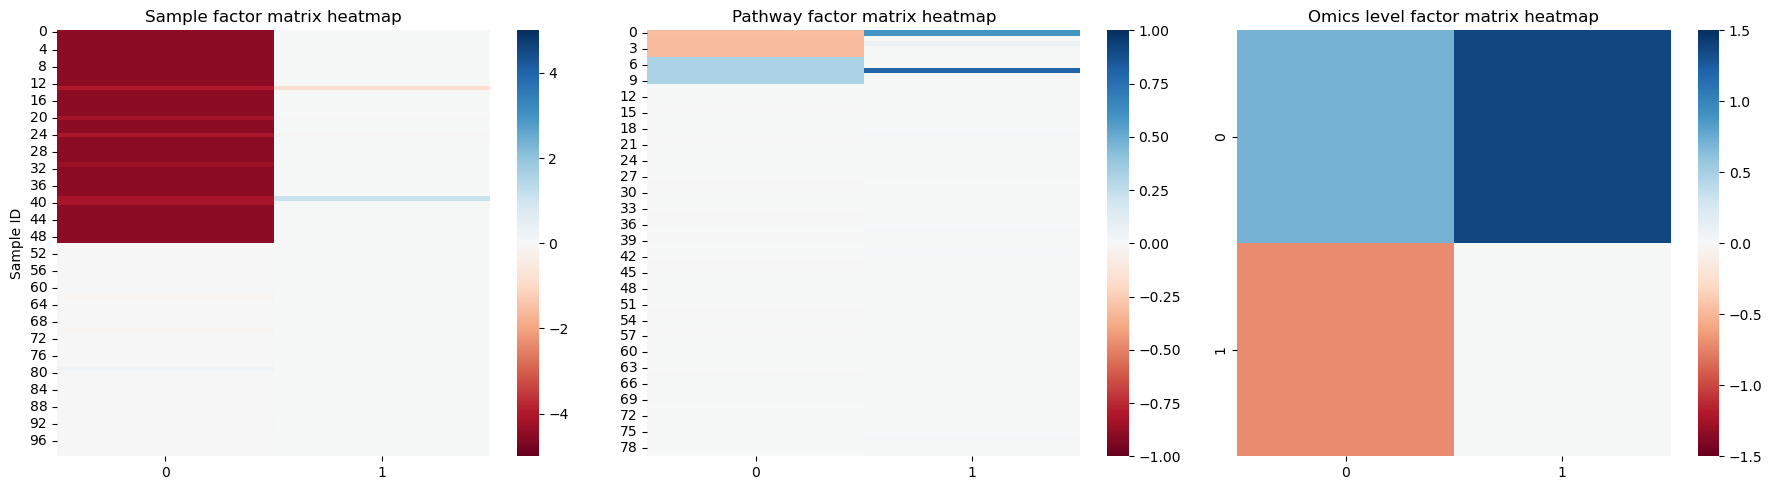

In [76]:
X_6 = tl.stack([metab_6,prot_6],axis=2)

weight, factors = parafac(X_6,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-5,vmax=5)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1.5,vmax=1.5)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

#### 8
- scenario: 100 samples, 80 pathways, 2 omic levels;
100 samples: 50 diabetic, 50 non-diabetic;
80 pathways: 20 differentiate diab/non-diab, (10 in metab, 10 in prot, little overlap) more noise signals
2 omic levels: 5 up 5 down

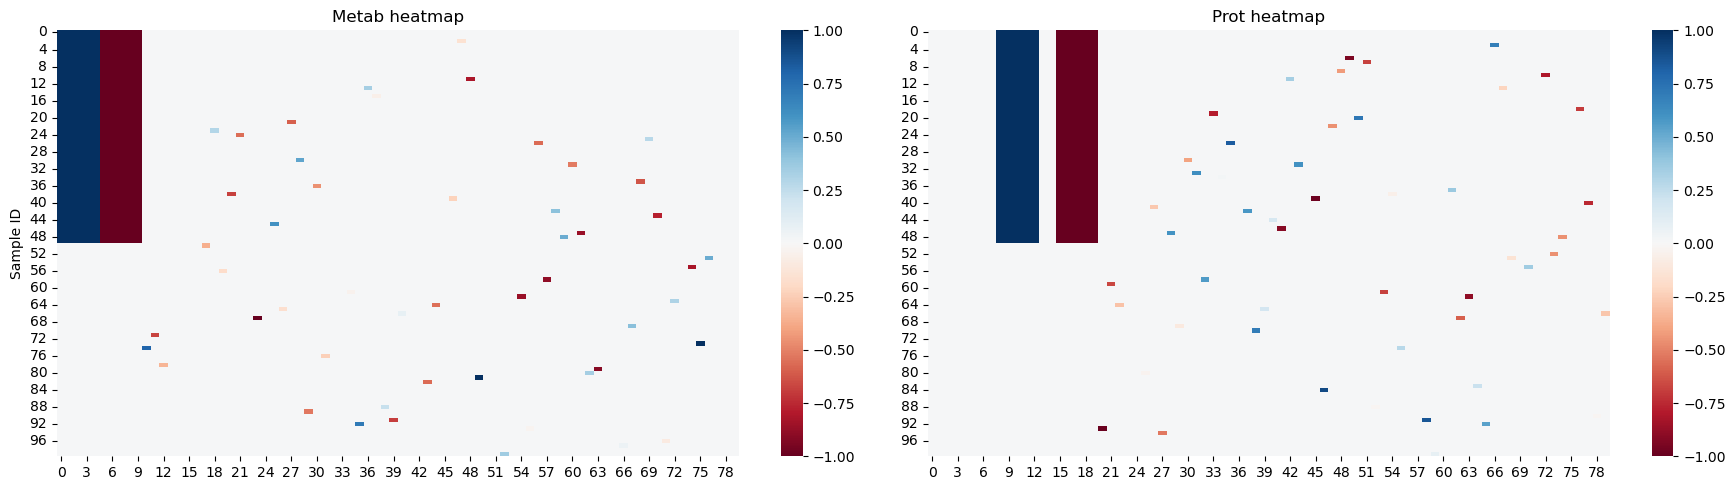

In [71]:
metab_8 = np.full((100,80), 0.01)
metab_8[:50,:5] = 1
metab_8[:50,5:10] =-1
random_sam_metab = np.random.choice(metab_8.shape[0], size=50, replace=False)
random_path_metab = np.random.choice(range(10,metab_8.shape[1]), size=50, replace=False)
random_values = np.random.uniform(-1, 1, size=50)
metab_8[random_sam_metab,random_path_metab] = random_values

prot_8 = np.full((100,80), 0.01)
prot_8[:50,15:20]=-1
prot_8[:50,8:13] =1

random_sam_prot = np.random.choice(prot_8.shape[0], size=50, replace=False)
random_path_prot = np.random.choice(range(20,prot_8.shape[1]), size=50, replace=False)

random_values = np.random.uniform(-1, 1, size=50)
prot_8[random_sam_prot,random_path_prot] = random_values

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_8, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_8, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

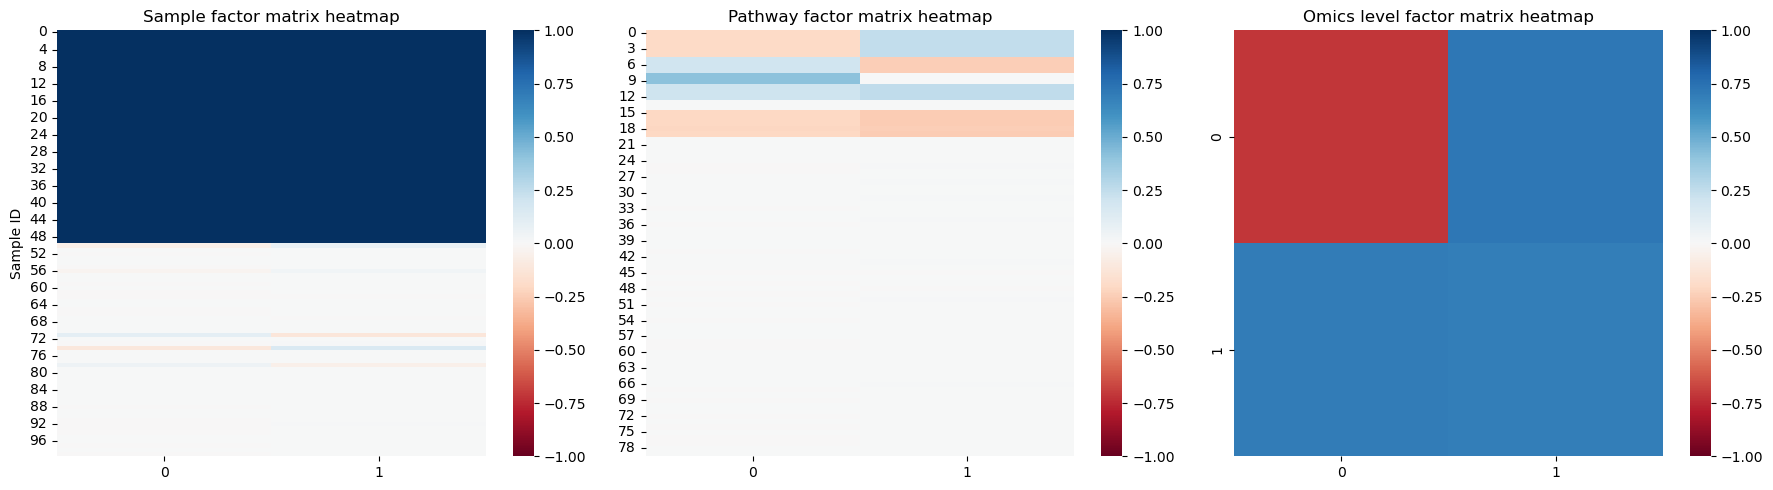

In [72]:
X_8 = tl.stack([metab_8,prot_8],axis=2)
weight, factors = parafac(X_8,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

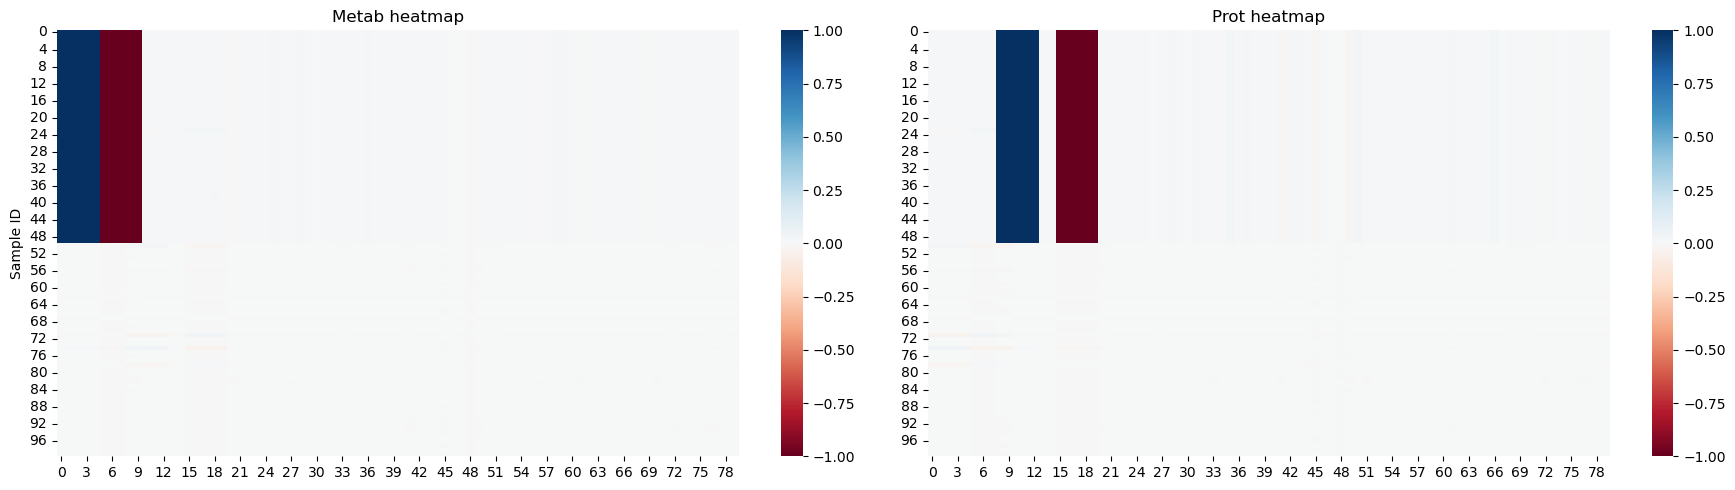

In [73]:
X_8_u_v1 = tl.cp_tensor.cp_to_tensor((None,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_8_u_v1[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_8_u_v1[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

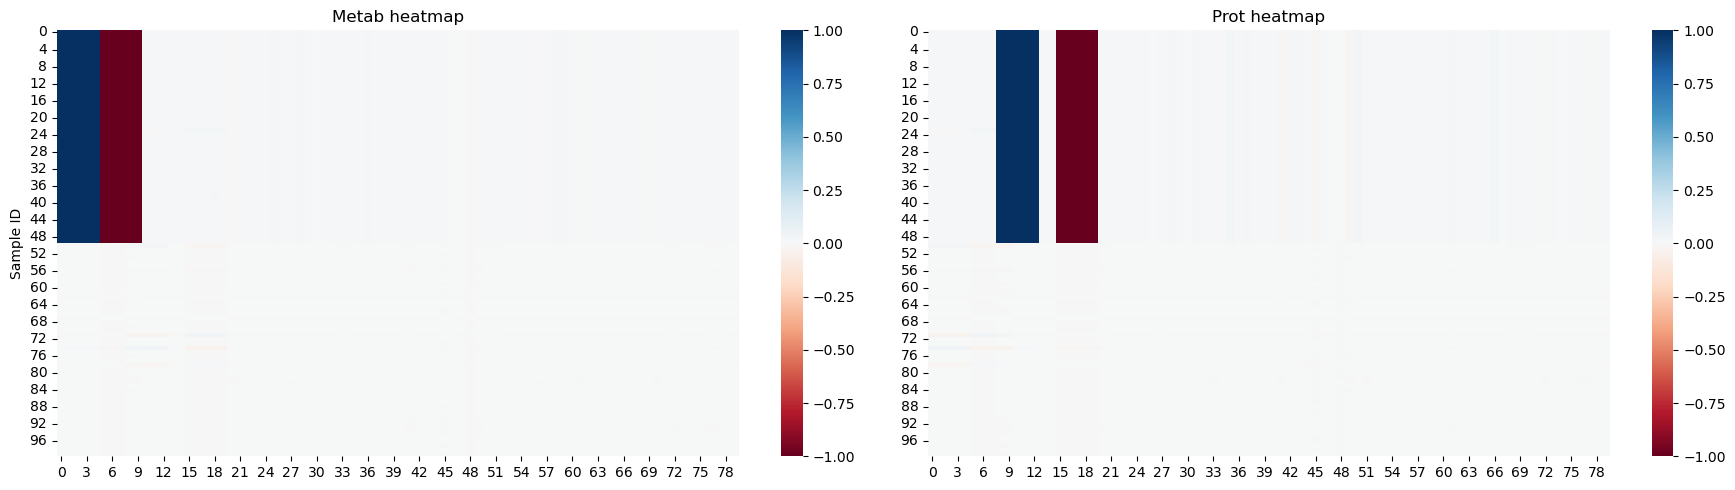

In [74]:
X_8_u_v2,_,_ = construct_tensor(factors[0],factors[1],factors[2])

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_8_u_v2[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_8_u_v2[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

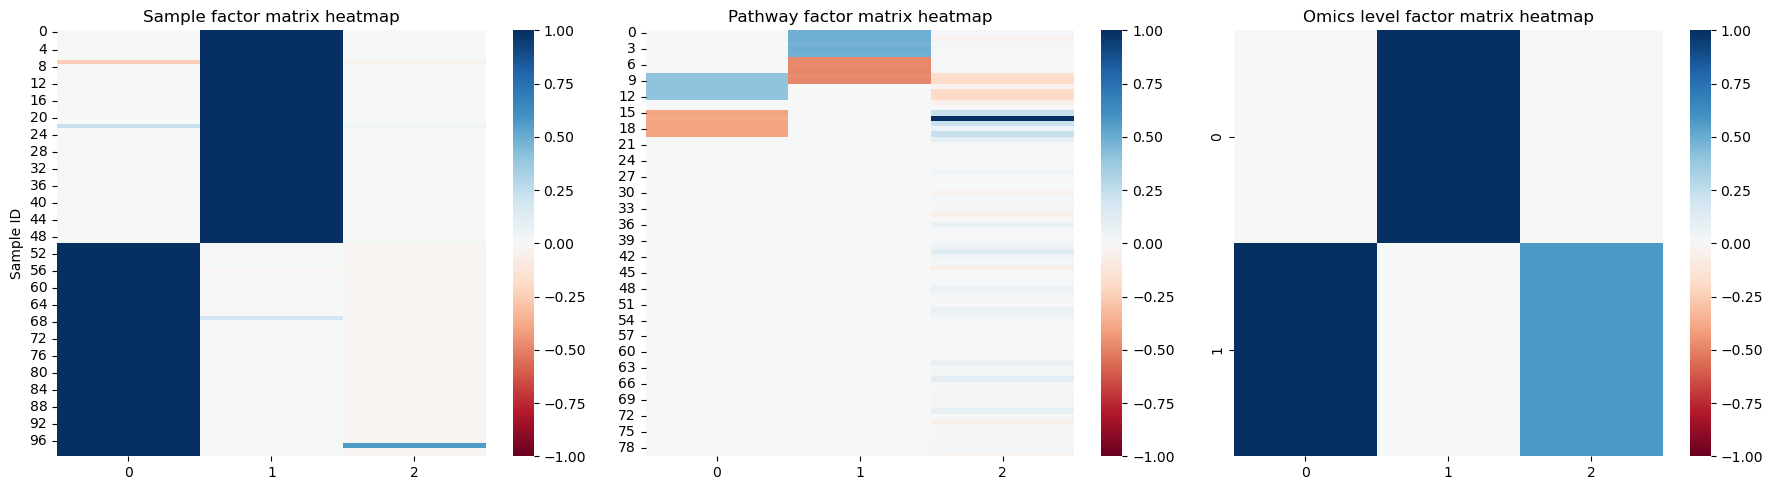

In [201]:
weight, factors = parafac(X_8,rank=3)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

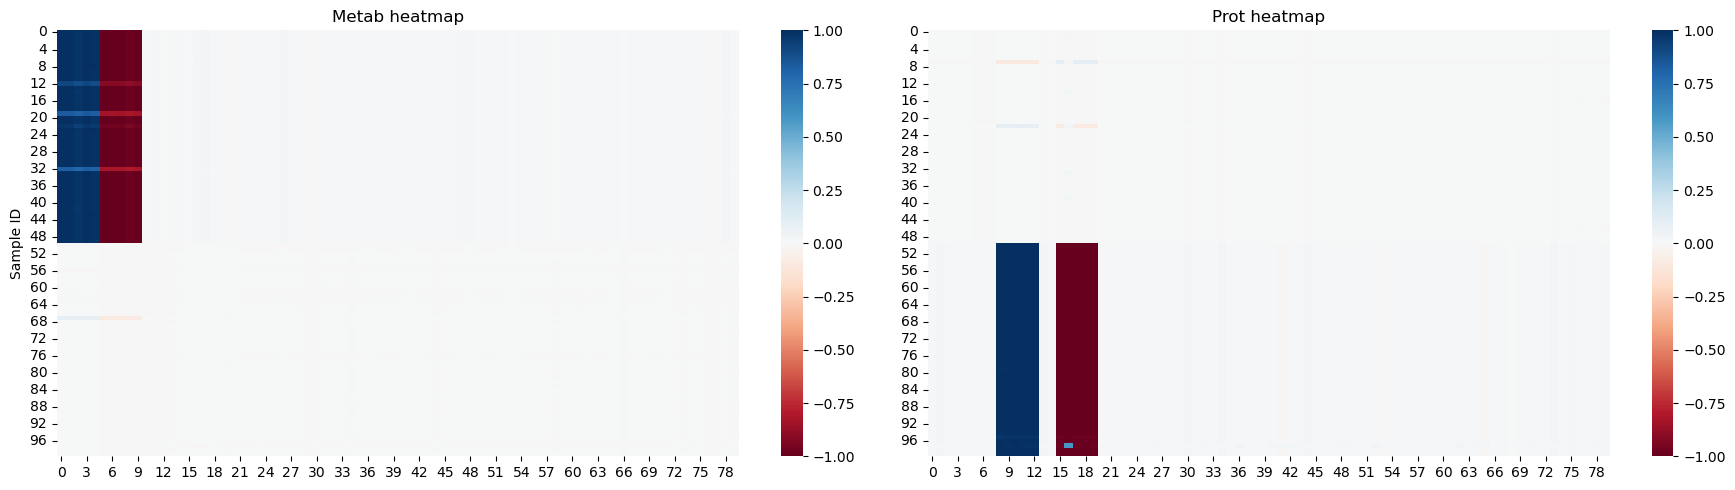

In [202]:
X_8_r3 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_8_r3[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_8_r3[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

In [142]:
toy_binary = [1] * 50 + [0] * 50

In [154]:
# Investigate metrics
df_evaluation_X_8 = df_rank_evaluation(X_8,10,toy_binary,LinearRegression())
df_evaluation_X_8

Core consistency       Fit  Sum Squared Error  \
Number of components                                                  
1                           100.000000  0.578325         437.901028   
2                            56.437166  0.964059          37.323616   
3                            42.470110  0.965165          36.175130   
4                            32.412329  0.966158          35.143947   
5                            28.342288  0.967070          34.197494   
6                            28.371711  0.968310          32.909017   
7                            23.002055  0.969174          32.011684   
8                            21.545943  0.970160          30.987761   
9                            19.234491  0.971133          29.977461   
10                           16.837864  0.971967          29.111897   

                      Predictive Power  Degeneracy Score  
Number of components                                      
1                             0.999862          1.000000  
2                             0.999999          0.001684  
3                             0.999999          0.001667  
4                             1.000000          0.018275  
5                             1.000000          0.007215  
6                             1.000000          0.782157  
7                             1.000000          0.781476  
8                             1.000000          0.774186  
9                             1.000000          0.782343  
10                            1.000000          0.786909

1 components
2 components
3 components
4 components
5 components
6 components
7 components
8 components
9 components
10 components


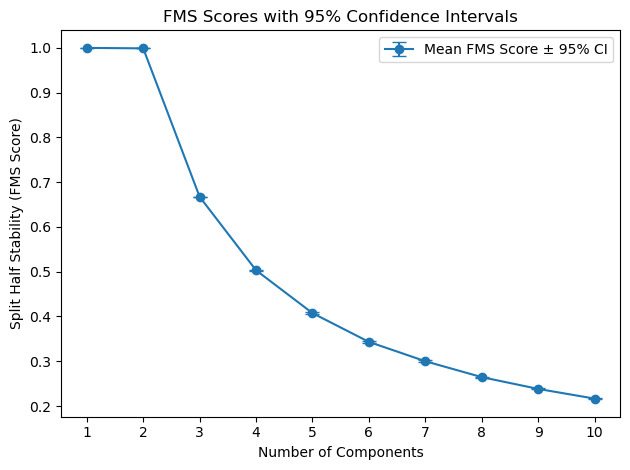

In [155]:
X_8_splits_tensors = []

for seed in range(100):
    X_8_splits_tensors.append(split_half(X=pd.concat([pd.DataFrame(metab_8),pd.DataFrame(prot_8)],axis=1), mode=0, num_omics=2, random_seed=seed))

X_8_fms = cal_fms(X_8_splits_tensors,10)

X_8_plt_fms = plt_fms(X_8_fms,10)

#### 9
- scenario: 100 samples, 80 pathways, 2 omic levels;
100 samples: 50 diabetic, 50 non-diabetic;
80 pathways: 20 differentiate diab/non-diab, (10 in metab,diab, 10 in prot,non-diab, little overlap) more noise signals
2 omic levels: 5 up 5 down
- Conclusion: two components

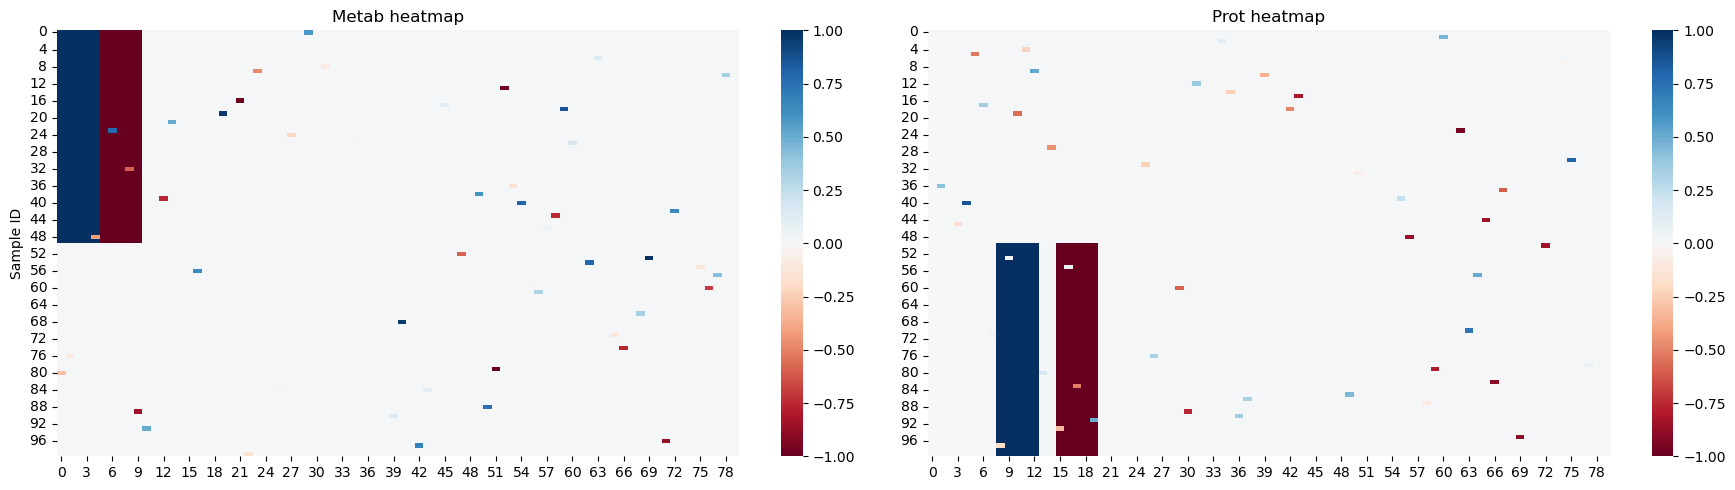

In [76]:
metab_9 = np.full((100,80), 0.01)
metab_9[:50,:5] = 1
metab_9[:50,5:10] =-1
random_sam_metab = np.random.choice(metab_9.shape[0], size=50, replace=False)
random_path_metab = np.random.choice(metab_9.shape[1], size=50, replace=False)
random_values = np.random.uniform(-1, 1, size=50)
metab_9[random_sam_metab,random_path_metab] = random_values

prot_9 = np.full((100,80), 0.01)
prot_9[50:,15:20]=-1
prot_9[50:,8:13] =1

random_sam_prot = np.random.choice(prot_9.shape[0], size=50, replace=False)
random_path_prot = np.random.choice(prot_9.shape[1], size=50, replace=False)

random_values = np.random.uniform(-1, 1, size=50)
prot_9[random_sam_prot,random_path_prot] = random_values

X_9 = tl.stack([metab_9,prot_9],axis=2)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_9, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_9, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

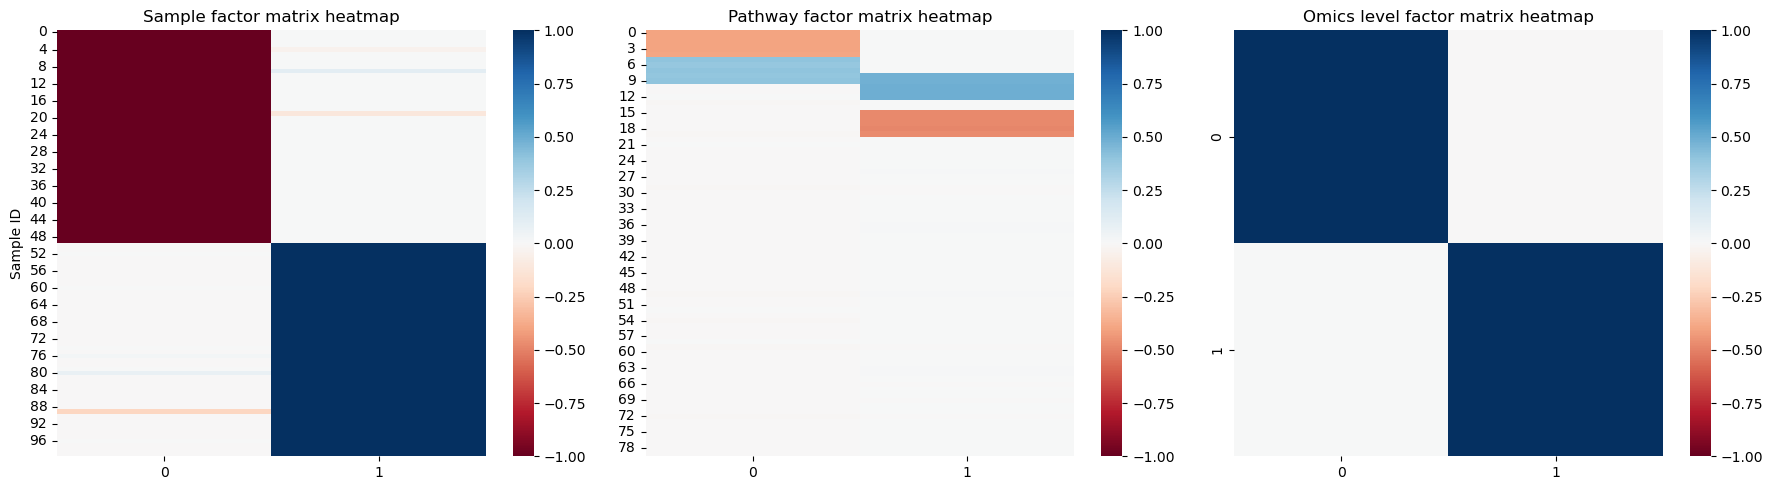

In [77]:
weight, factors = parafac(X_9,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

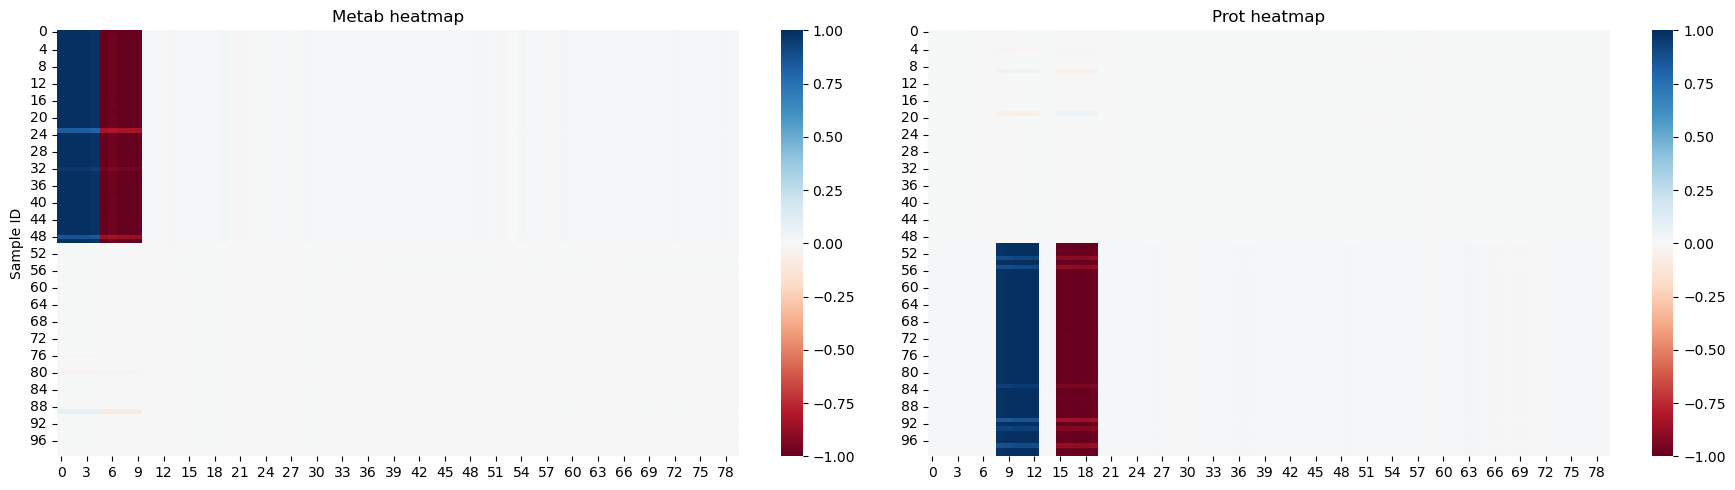

In [80]:
X_9_u_v2,_,_ = construct_tensor(factors[0],factors[1],factors[2])

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_9_u_v2[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_9_u_v2[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

#### 10
- scenario: 100 samples, 80 pathways, 2 omic levels;
100 samples: 50 diabetic, 50 non-diabetic;
80 pathways: 20 differentiate diab/non-diab, (10 in metab,5 diab,5 non-diab; 10 in prot,5 diab, 5 non-diab, little overlap) more noise signals
2 omic levels: 5 up 5 down

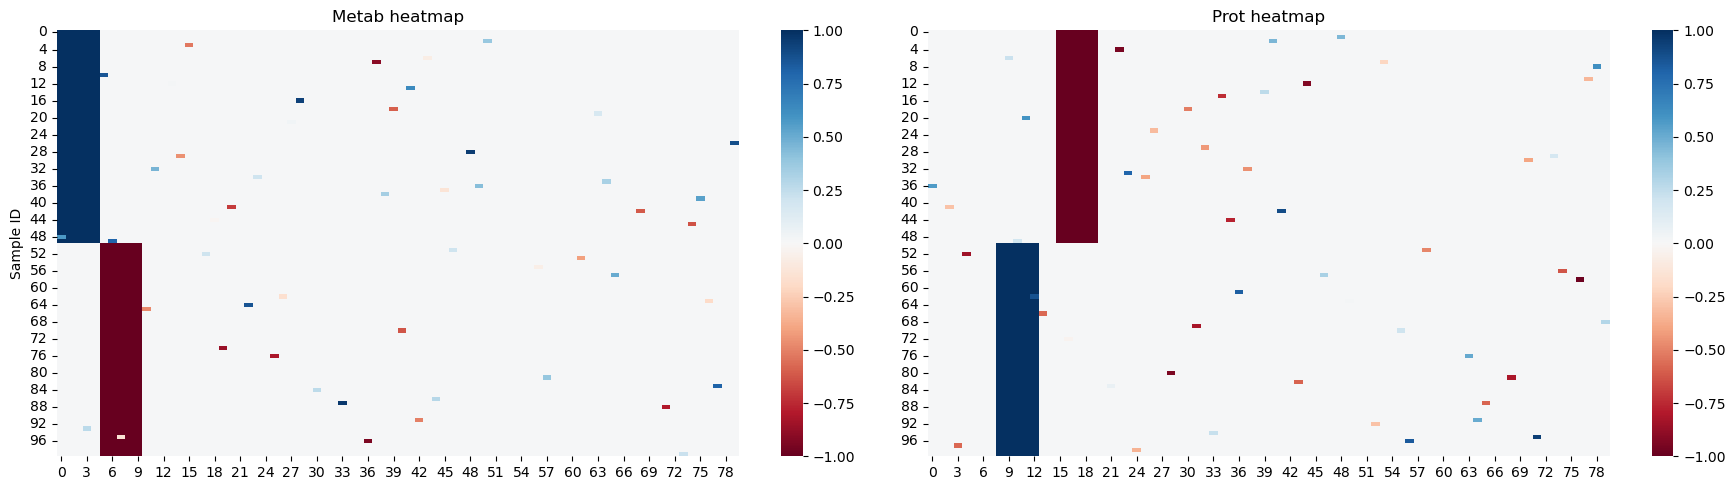

In [81]:
metab_10 = np.full((100,80), 0.01)
metab_10[:50,:5] = 1
metab_10[50:,5:10] =-1
random_sam_metab = np.random.choice(metab_10.shape[0], size=50, replace=False)
random_path_metab = np.random.choice(metab_10.shape[1], size=50, replace=False)
random_values = np.random.uniform(-1, 1, size=50)
metab_10[random_sam_metab,random_path_metab] = random_values

prot_10 = np.full((100,80), 0.01)
prot_10[:50,15:20]=-1
prot_10[50:,8:13] =1

random_sam_prot = np.random.choice(prot_10.shape[0], size=50, replace=False)
random_path_prot = np.random.choice(prot_10.shape[1], size=50, replace=False)

random_values = np.random.uniform(-1, 1, size=50)
prot_10[random_sam_prot,random_path_prot] = random_values

X_10 = tl.stack([prot_10,prot_10],axis=2)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_10, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_10, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

In [88]:
test_ev = df_rank_evaluation(X_10,100, diabetes_binary,LinearRegression())

/opt/anaconda3/envs/MRes/lib/python3.12/site-packages/tensorly/backend/__init__.py:202: RuntimeWarning: invalid value encountered in sqrt
  return getattr(
/opt/anaconda3/envs/MRes/lib/python3.12/site-packages/tensorly/backend/__init__.py:202: RuntimeWarning: invalid value encountered in sqrt
  return getattr(
/opt/anaconda3/envs/MRes/lib/python3.12/site-packages/tensorly/backend/__init__.py:202: RuntimeWarning: invalid value encountered in sqrt
  return getattr(
/opt/anaconda3/envs/MRes/lib/python3.12/site-packages/tensorly/backend/__init__.py:202: RuntimeWarning: invalid value encountered in sqrt
  return getattr(
/opt/anaconda3/envs/MRes/lib/python3.12/site-packages/tensorly/backend/__init__.py:202: RuntimeWarning: invalid value encountered in sqrt
  return getattr(
/opt/anaconda3/envs/MRes/lib/python3.12/site-packages/tensorly/backend/__init__.py:202: RuntimeWarning: invalid value encountered in sqrt
  return getattr(
/opt/anaconda3/envs/MRes/lib/python3.12/site-packages/tensorly/b

In [103]:
test_ev

Core consistency       Fit  Sum Squared Error  \
Number of components                                                  
1                         1.000000e+02  0.486859         530.614491   
2                        -9.464368e+26  0.968620          32.448524   
3                        -2.686246e+14  0.970506          30.498600   
4                        -1.703596e+11  0.972269          28.675338   
5                        -3.423362e+10  0.974015          26.870258   
...                                ...       ...                ...   
96                       -1.530042e+09  0.998717           1.327088   
97                       -1.030088e+14  0.943315          58.615465   
98                       -1.065037e+12  0.970353          30.656127   
99                       -7.399410e+14  0.997644           2.436059   
100                      -3.822519e+09  0.895135         108.436093   

                      Predictive Power  Degeneracy Score  
Number of components                                      
1                             0.870602      1.000000e+00  
2                             0.999993      8.624921e-09  
3                             0.999993      1.000000e+00  
4                             0.999993      3.891238e-01  
5                             0.999993      9.999961e-01  
...                                ...               ...  
96                            0.980825      9.976987e-01  
97                            1.000000      9.531934e-01  
98                            0.999919      9.761046e-01  
99                            1.000000      9.712028e-01  
100                           0.999700      9.963644e-01  

[100 rows x 5 columns]

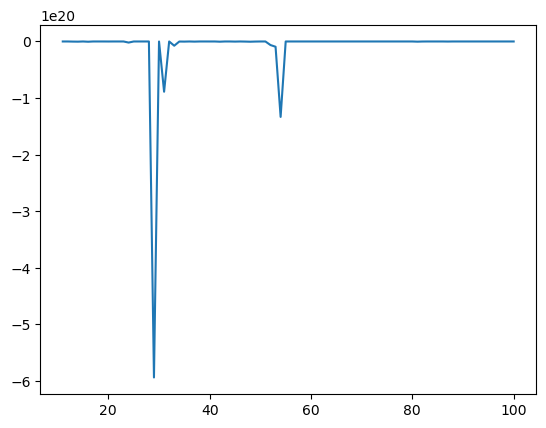

In [90]:
plt.plot(test_ev['Core consistency'][10:])
plt.show()

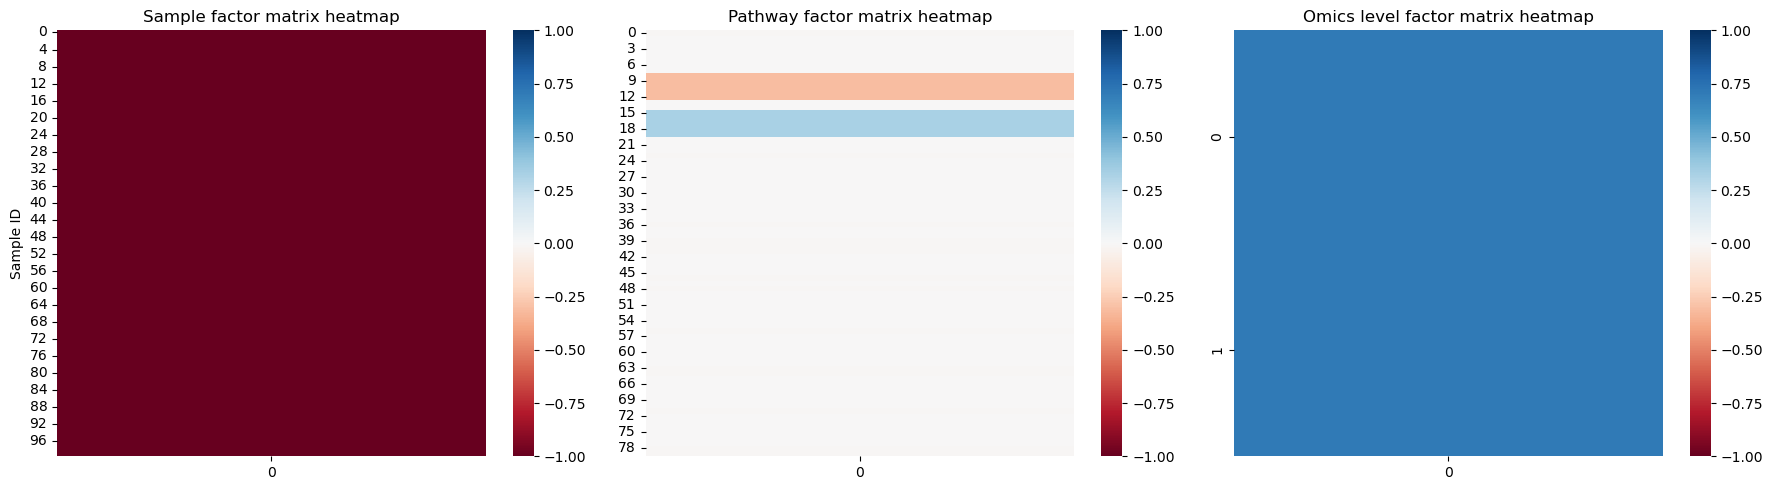

In [94]:
weight, factors = parafac(X_10,rank=1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

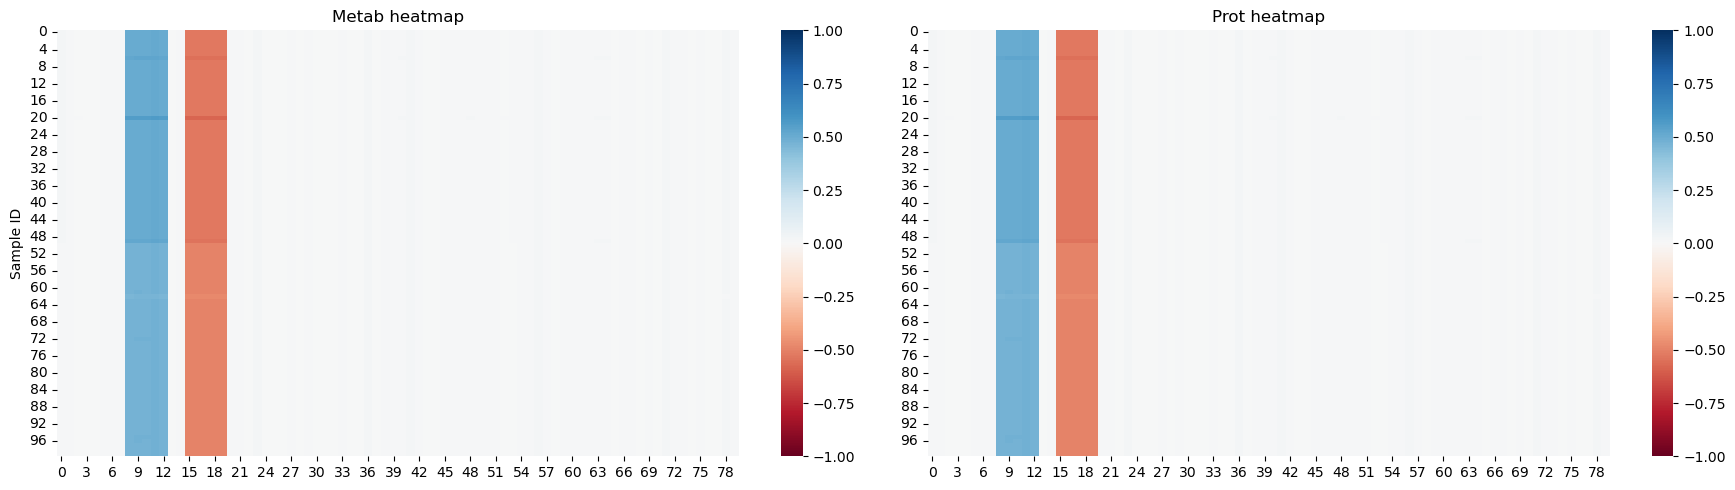

In [95]:
X_10_v1 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_10_v1[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_10_v1[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

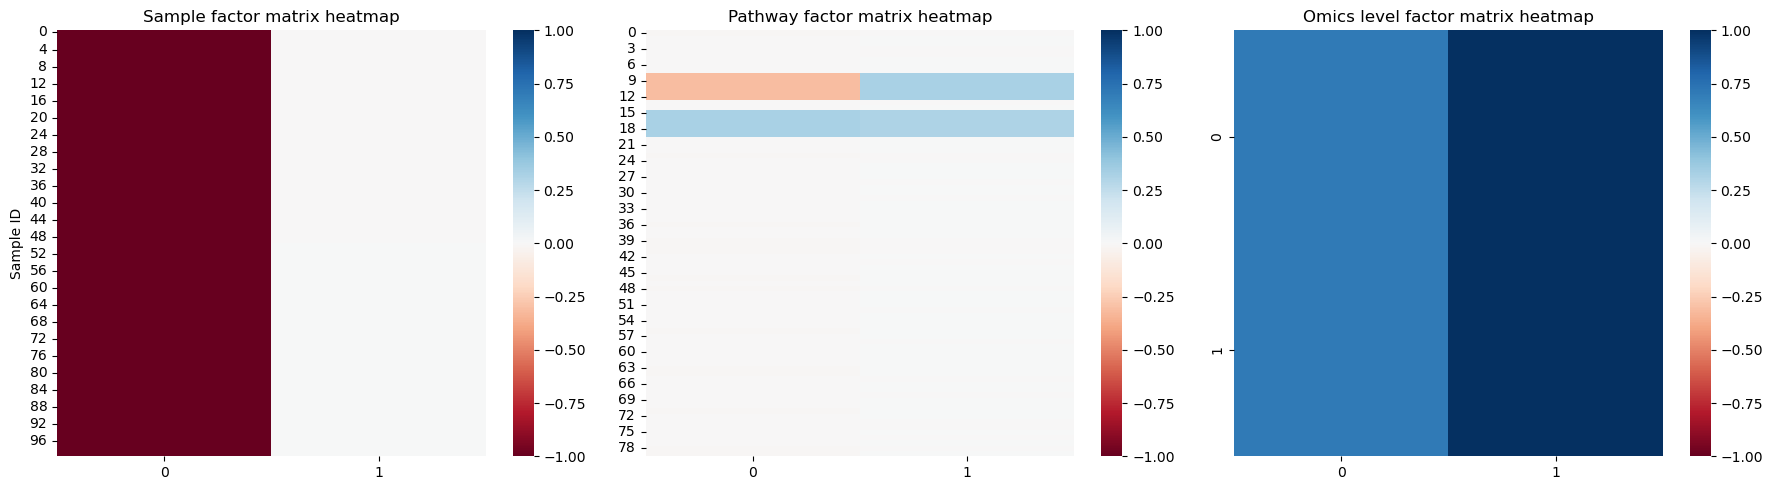

In [92]:
weight, factors = parafac(X_10,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

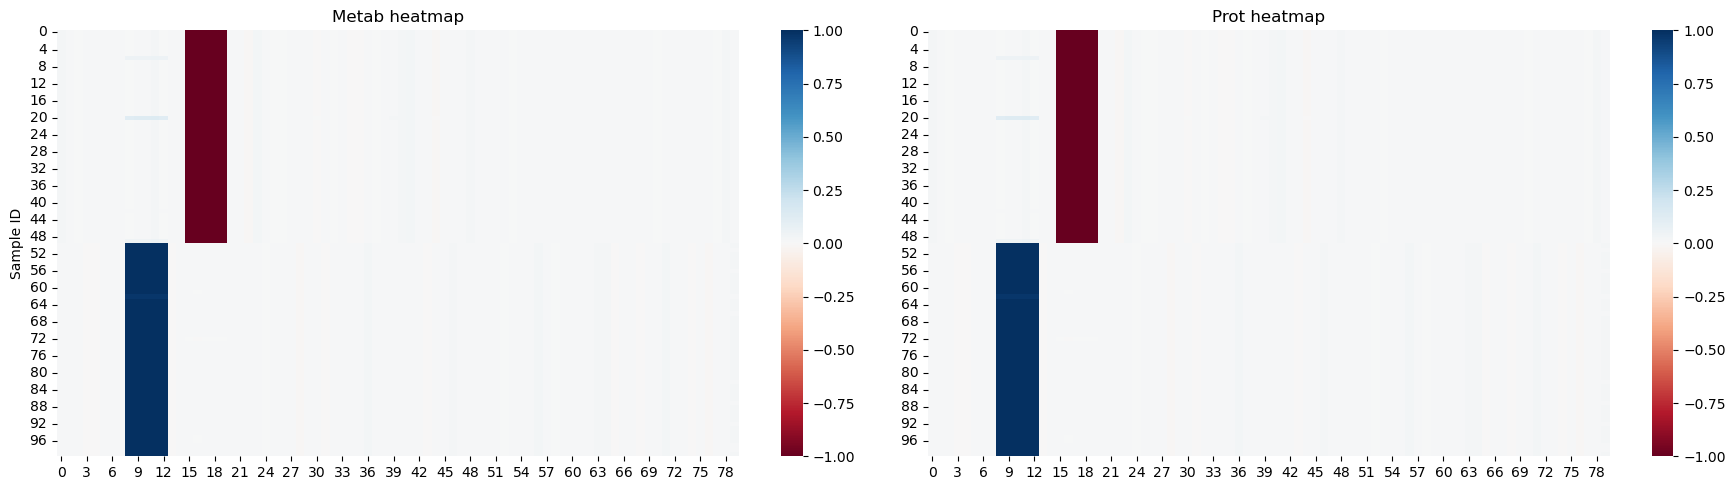

In [93]:
X_10_v2 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_10_v2[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_10_v2[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

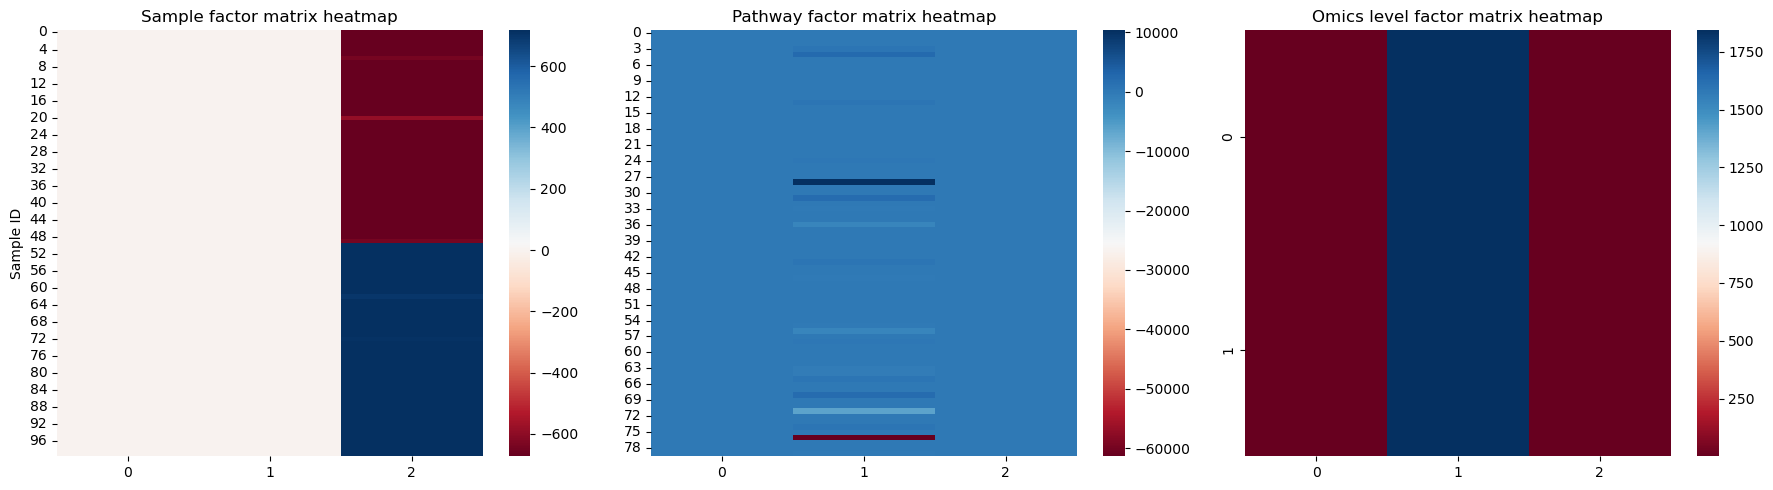

In [102]:
weight, factors = parafac(X_10,rank=3)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu')
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu')
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu')
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

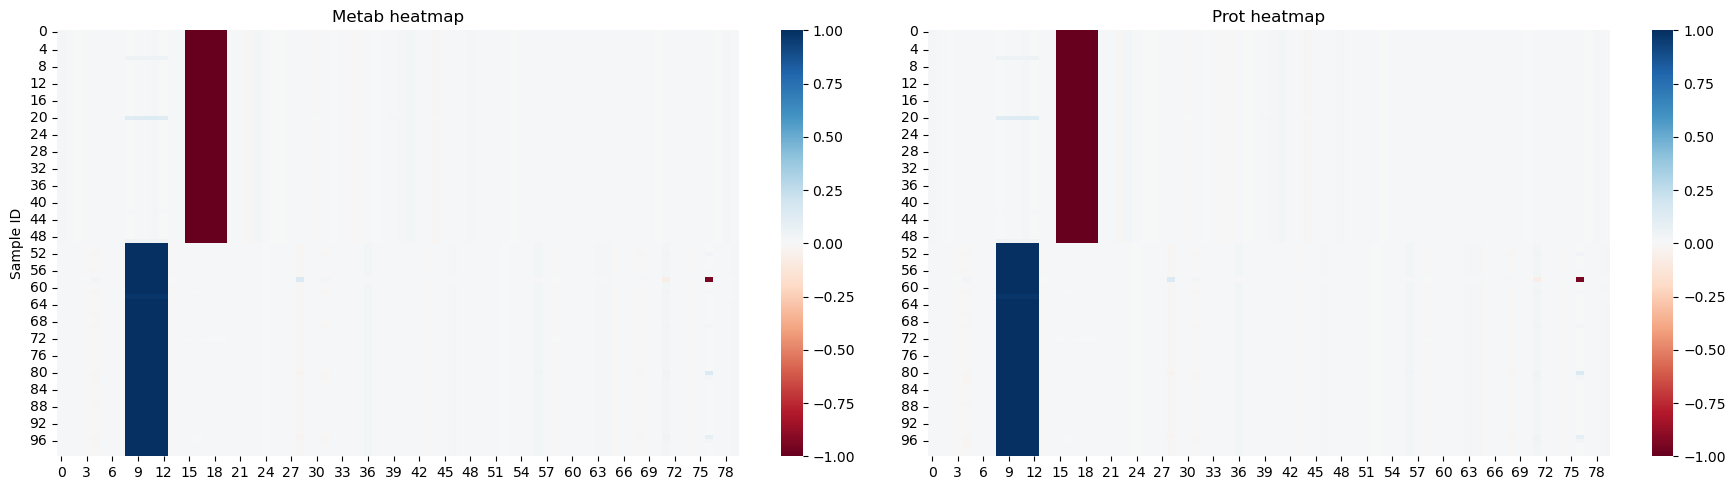

In [101]:
X_10_v3 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_10_v3[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_10_v3[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

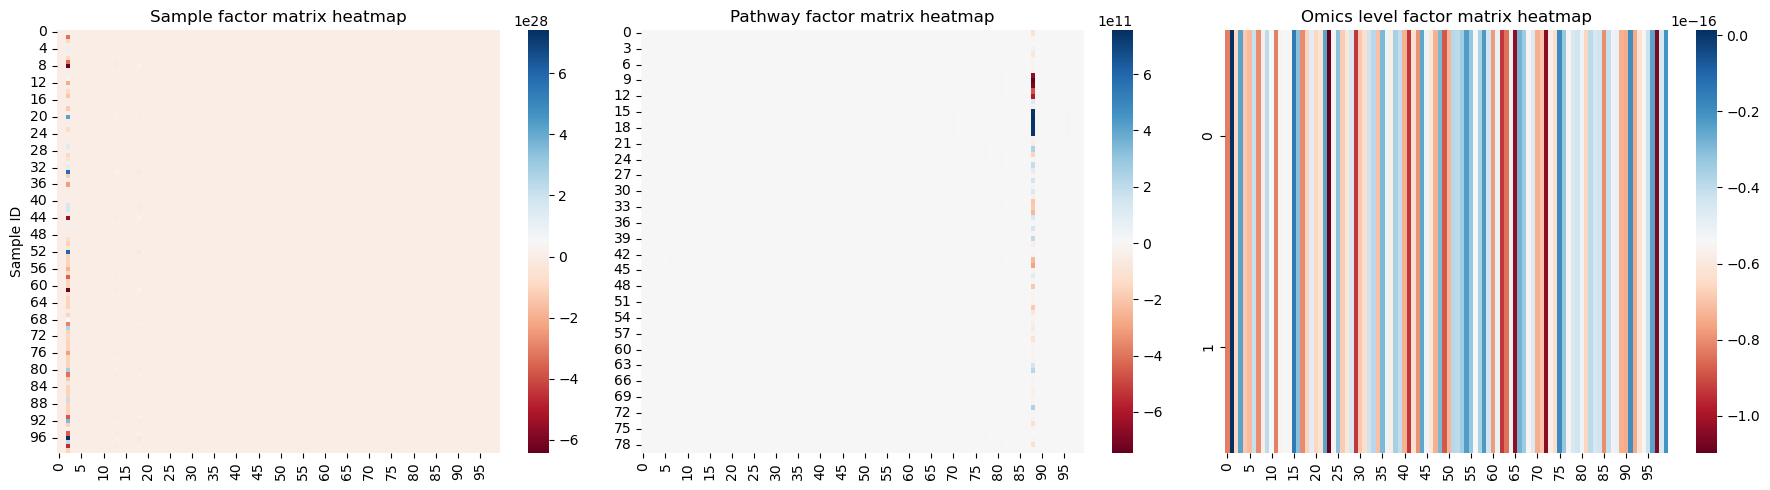

In [104]:
weight, factors = parafac(X_10,rank=100)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu')
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu')
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu')
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

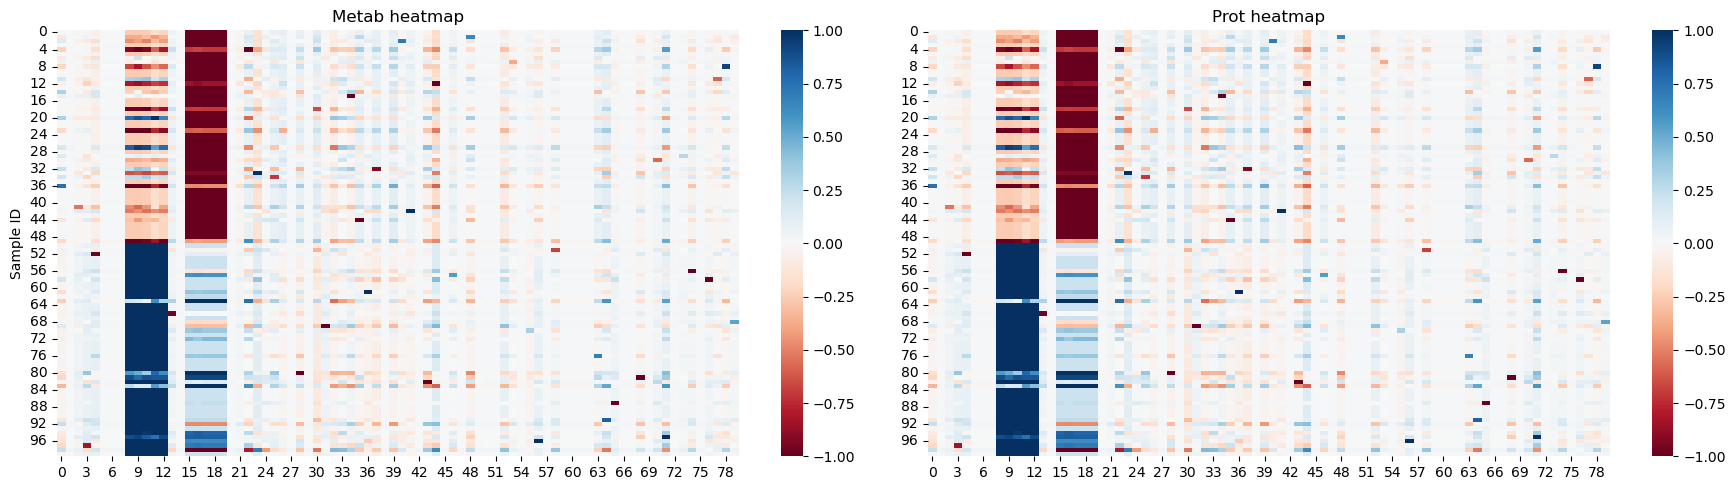

In [105]:
X_10_v100 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_10_v100[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_10_v100[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

#### 11
Since parafac is a good model for 9 but bad for 10, we want to look into the two sets of data, and see why this causes the discrepancy

- Conclusion: bad

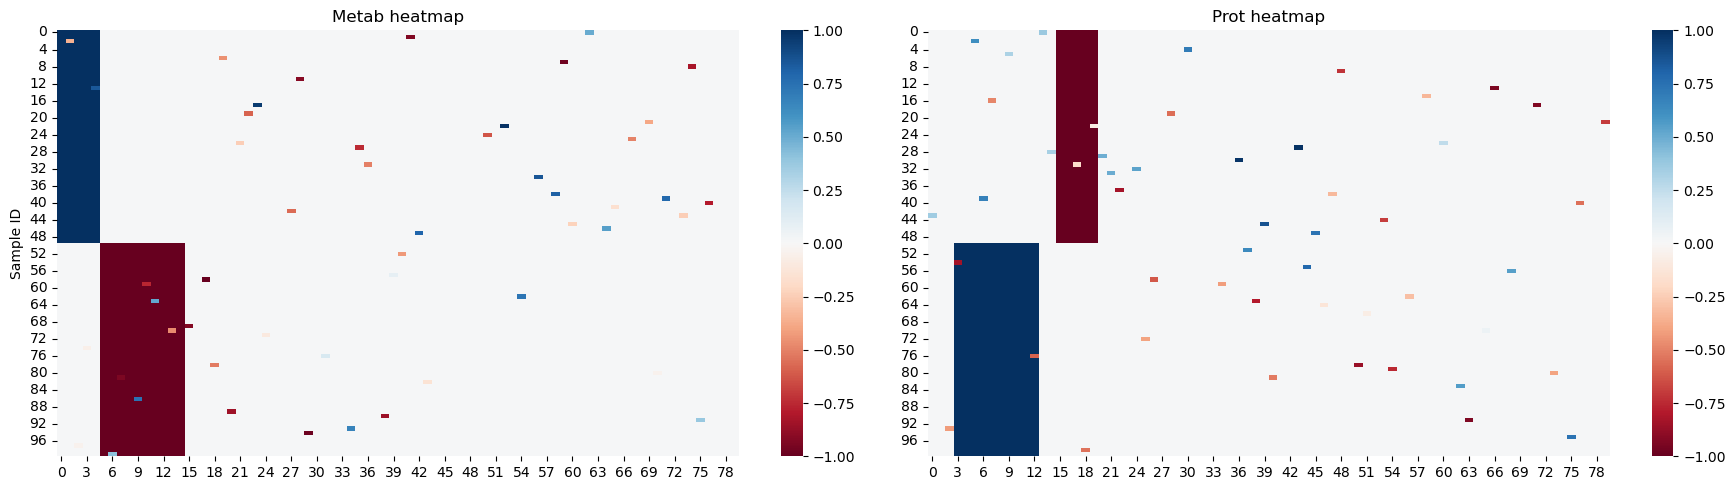

In [96]:
metab_11 = np.full((100,80), 0.01)
metab_11[:50,:5] = 1
metab_11[50:,5:15] =-1

random_sam_metab = np.random.choice(metab_11.shape[0], size=50, replace=False)
random_path_metab = np.random.choice(metab_11.shape[1], size=50, replace=False)
random_values = np.random.uniform(-1, 1, size=50)
metab_11[random_sam_metab,random_path_metab] = random_values

prot_11 = np.full((100,80), 0.01)
prot_11[:50,15:20]=-1
prot_11[50:,3:13] =1

random_sam_prot = np.random.choice(prot_11.shape[0], size=50, replace=False)
random_path_prot = np.random.choice(prot_11.shape[1], size=50, replace=False)

random_values = np.random.uniform(-1, 1, size=50)
prot_11[random_sam_prot,random_path_prot] = random_values

X_11 = tl.stack([prot_11,prot_11],axis=2)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_11, cmap='RdBu')
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_11, cmap='RdBu')
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

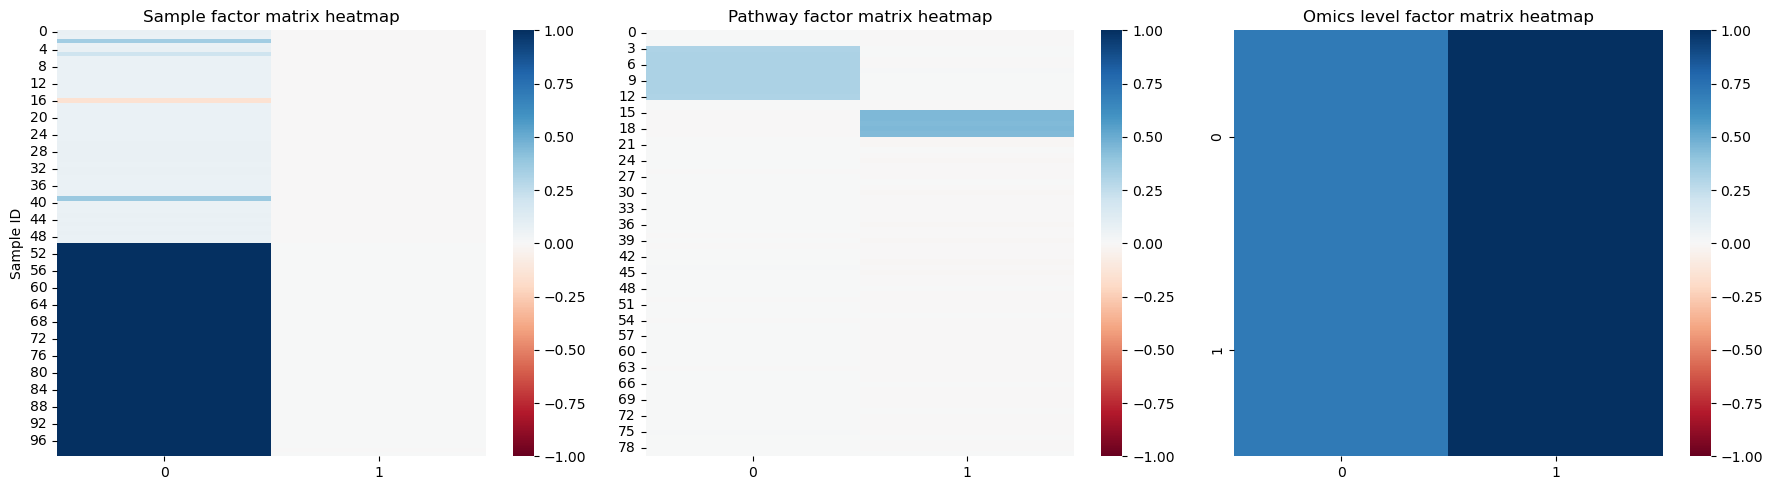

In [98]:
weight, factors = parafac(X_11,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

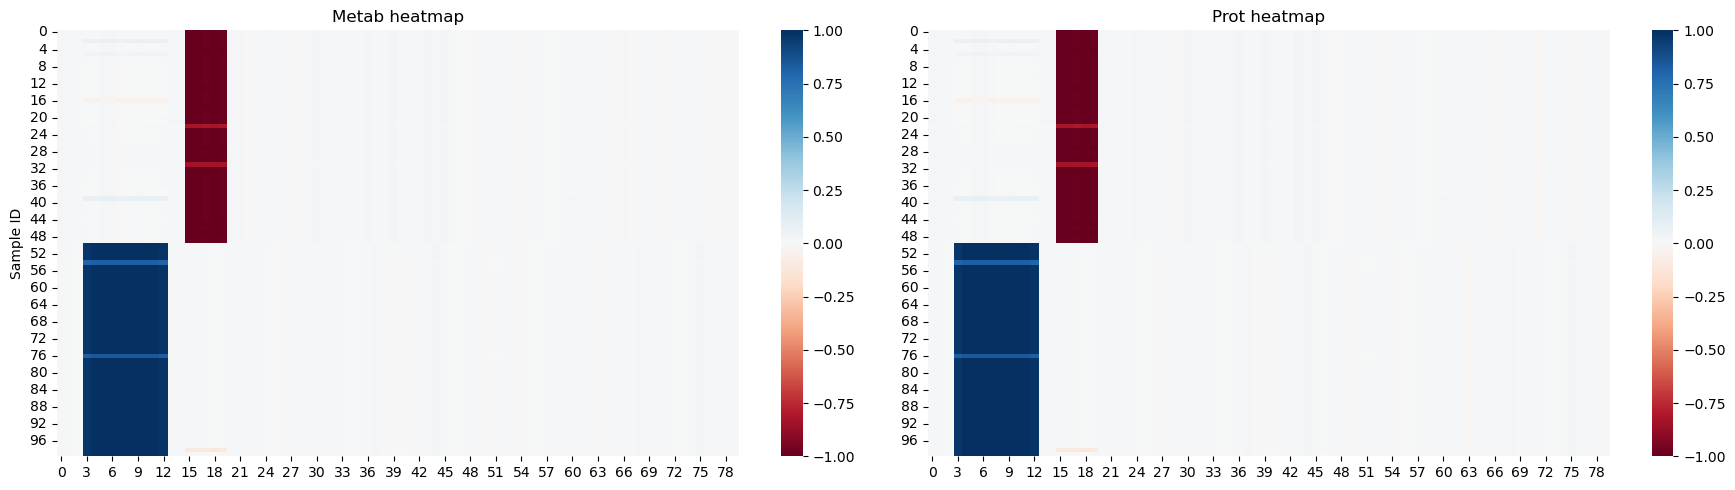

In [99]:
X_10_v1 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_10_v1[:,:,0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_10_v1[:,:,1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

#### 12

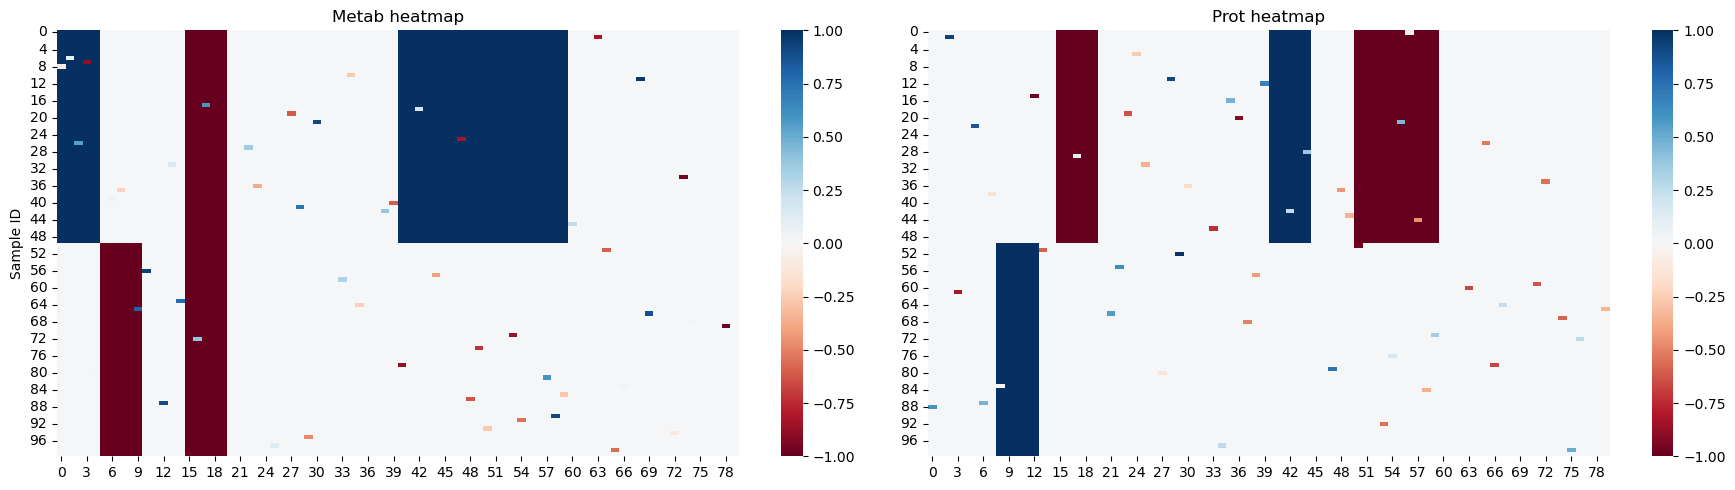

In [107]:
metab_12 = np.full((100,80), 0.01)
metab_12[:50,:5] = 1
metab_12[50:,5:10] =-1
metab_12[:50, 15:20] = -1
metab_12[50:, 15:20] = -1
metab_12[:50, 40:60] =1
random_sam_metab = np.random.choice(metab_12.shape[0], size=50, replace=False)
random_path_metab = np.random.choice(metab_12.shape[1], size=50, replace=False)
random_values = np.random.uniform(-1, 1, size=50)
metab_12[random_sam_metab,random_path_metab] = random_values

prot_12 = np.full((100,80), 0.01)
prot_12[:50,15:20]=-1
prot_12[50:,8:13] =1
prot_12[:50, 50:60] =-1
prot_12[:50,40:45] =1

random_sam_prot = np.random.choice(prot_12.shape[0], size=50, replace=False)
random_path_prot = np.random.choice(prot_12.shape[1], size=50, replace=False)

random_values = np.random.uniform(-1, 1, size=50)
prot_12[random_sam_prot,random_path_prot] = random_values

X_12 = tl.stack([prot_12,prot_12],axis=2)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_12, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_12, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

In [110]:
test_ev = df_rank_evaluation(X_12,10, diabetes_binary,LinearRegression())
test_ev

Core consistency       Fit  Sum Squared Error  \
Number of components                                                  
1                         1.000000e+02  0.786060         538.815582   
2                        -5.307872e+22  0.983699          41.055447   
3                        -1.052941e+08  0.985282          37.068988   
4                        -1.882827e+19  0.986183          34.799350   
5                        -4.274342e+15  0.986995          32.753166   
6                        -6.179332e+19  0.987772          30.796426   
7                        -1.581068e+18  0.988524          28.903263   
8                        -6.959396e+17  0.989216          27.159203   
9                        -6.731122e+15  0.989889          25.466088   
10                       -2.462556e+16  0.990548          23.806152   

                      Predictive Power  Degeneracy Score  
Number of components                                      
1                             0.999359      1.000000e+00  
2                             0.999456      1.453731e-11  
3                             0.999540      9.352126e-01  
4                             0.999548      9.997929e-01  
5                             0.999595      9.929872e-01  
6                             0.999595      8.795412e-01  
7                             0.999604      7.043295e-01  
8                             0.999719      8.732727e-01  
9                             0.999719      9.139779e-01  
10                            0.999720      8.506344e-01

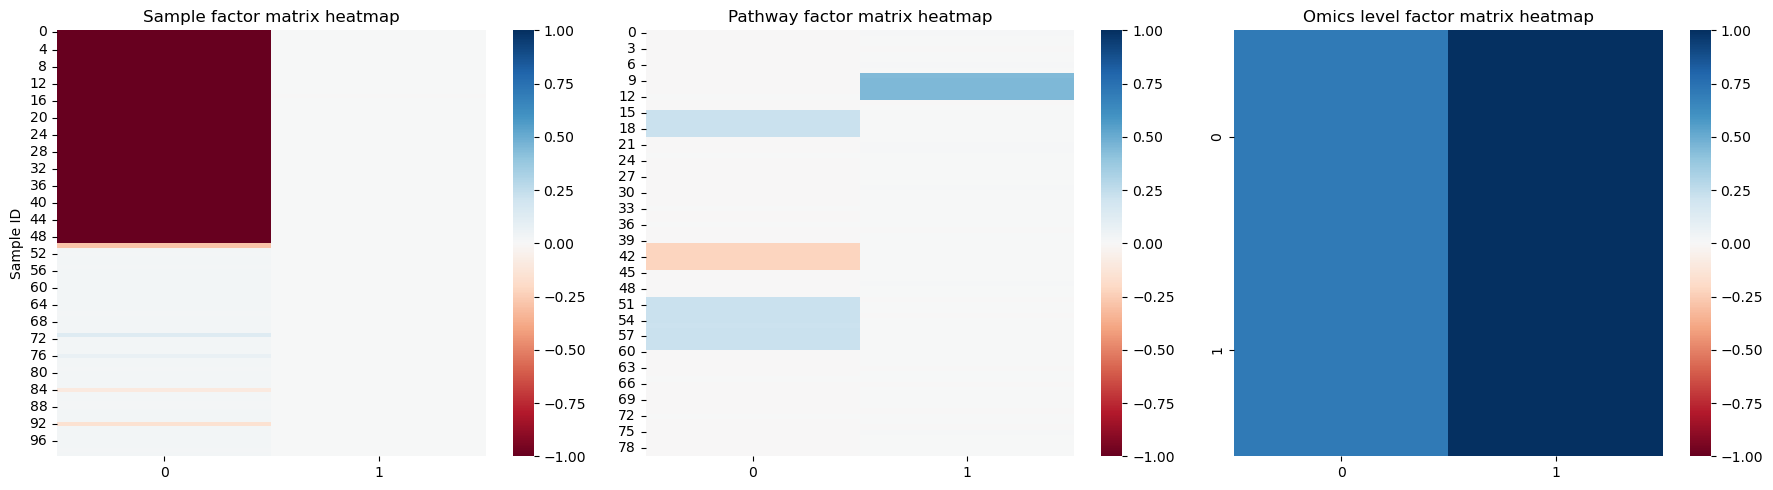

In [115]:
weight, factors = parafac(X_12,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

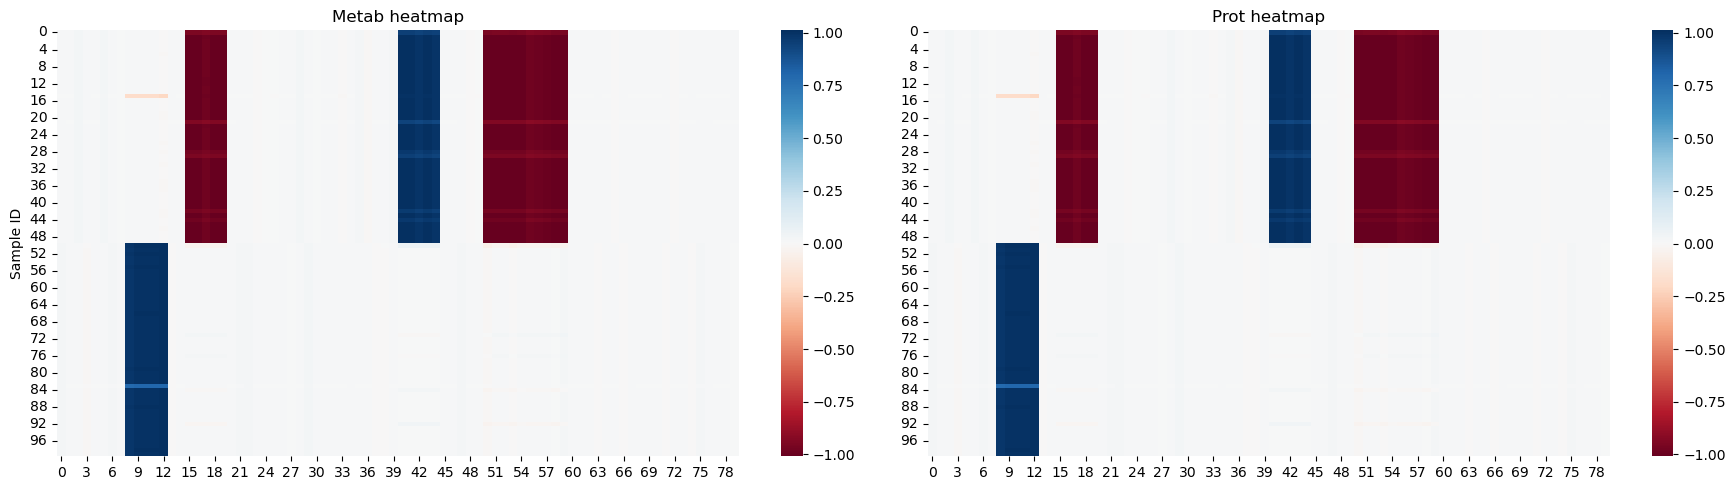

In [116]:
X_12_v2 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_12_v2[:,:,0], cmap='RdBu')
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_12_v2[:,:,1], cmap='RdBu')
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

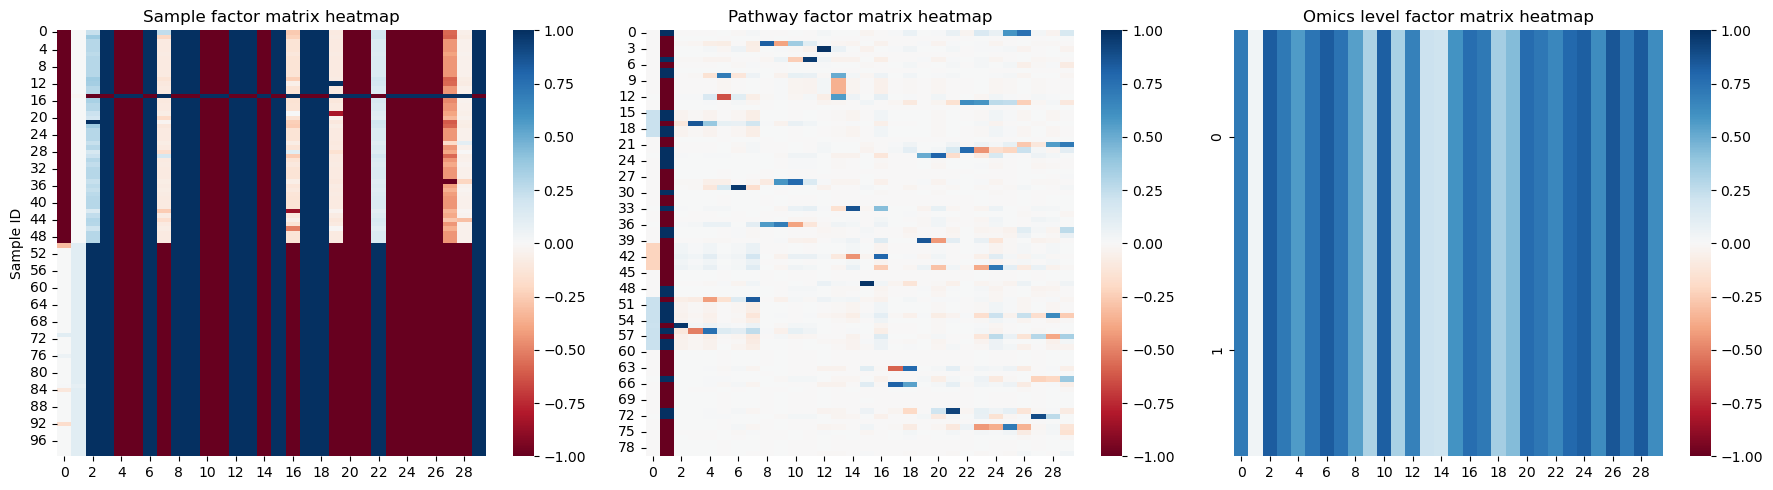

In [117]:
weight, factors = parafac(X_12,rank=30)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

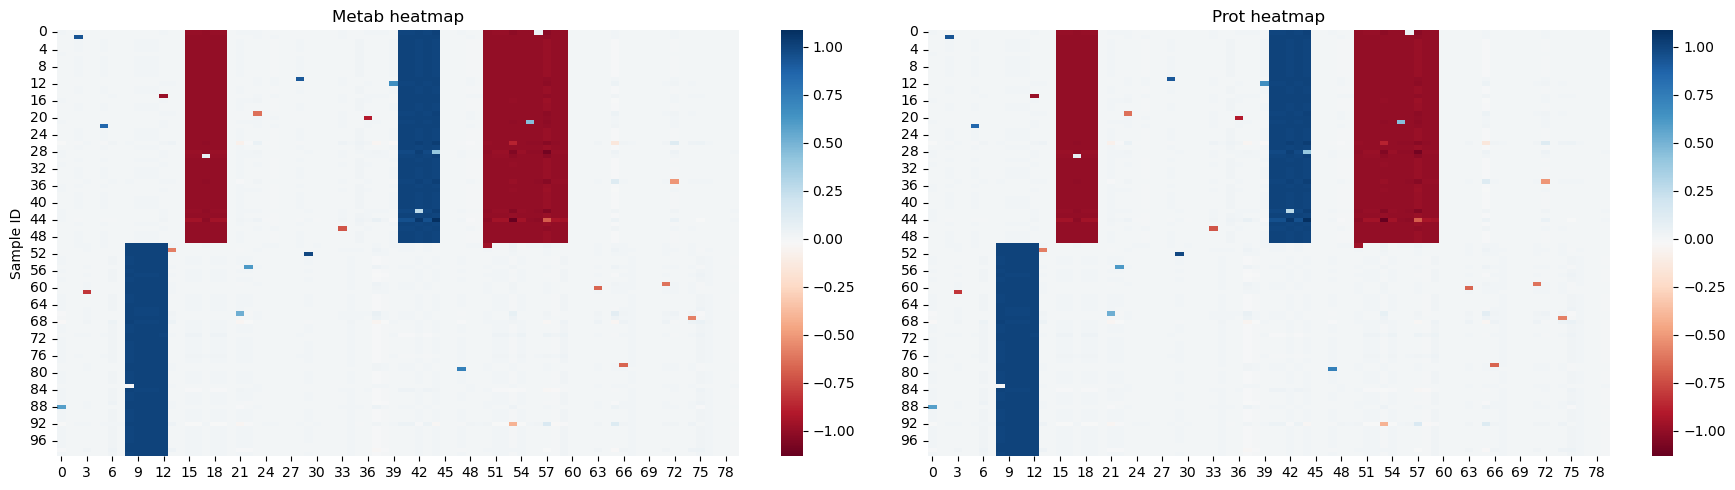

In [118]:
X_12_v50 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_12_v50[:,:,0], cmap='RdBu')
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_12_v50[:,:,1], cmap='RdBu')
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

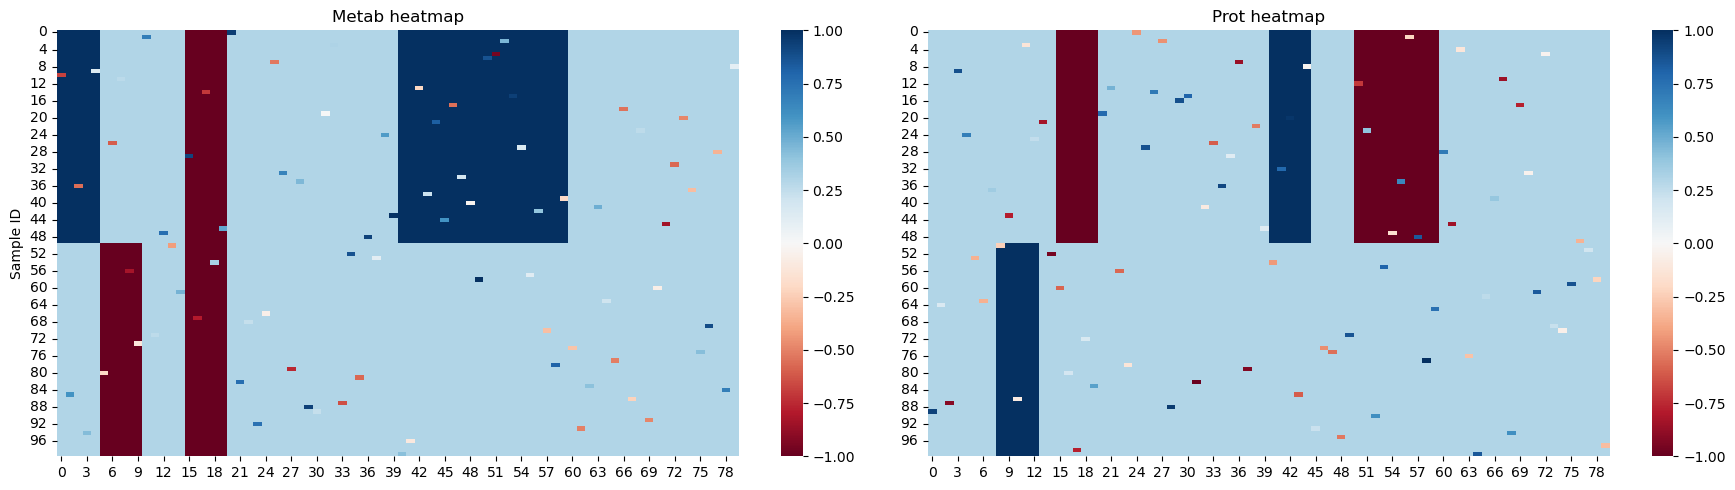

In [124]:
metab_12 = np.full((100,80), 0.3)
metab_12[:50,:5] = 1
metab_12[50:,5:10] =-1
metab_12[:50, 15:20] = -1
metab_12[50:, 15:20] = -1
metab_12[:50, 40:60] =1
random_sam_metab = np.random.choice(metab_12.shape[0], size=80, replace=False)
random_path_metab = np.random.choice(metab_12.shape[1], size=80, replace=False)
random_values = np.random.uniform(-1, 1, size=80)
metab_12[random_sam_metab,random_path_metab] = random_values

prot_12 = np.full((100,80), 0.3)
prot_12[:50,15:20]=-1
prot_12[50:,8:13] =1
prot_12[:50, 50:60] =-1
prot_12[:50,40:45] =1

random_sam_prot = np.random.choice(prot_12.shape[0], size=80, replace=False)
random_path_prot = np.random.choice(prot_12.shape[1], size=80, replace=False)

random_values = np.random.uniform(-1, 1, size=80)
prot_12[random_sam_prot,random_path_prot] = random_values

X_12 = tl.stack([prot_12,prot_12],axis=2)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_12, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_12, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

In [125]:
test_ev = df_rank_evaluation(X_12,10, diabetes_binary,LinearRegression())
test_ev

Core consistency       Fit  Sum Squared Error  \
Number of components                                                  
1                         1.000000e+02  0.688929        1163.695776   
2                        -1.406221e+29  0.977137          85.528478   
3                        -2.813300e+18  0.978876          79.024586   
4                        -1.004671e+20  0.980253          73.871090   
5                        -1.307354e+17  0.981239          70.182304   
6                        -4.658674e+15  0.982119          66.890151   
7                        -4.333007e+17  0.982957          63.756055   
8                        -3.290329e+14  0.983758          60.761052   
9                        -1.020730e+21  0.984545          57.815707   
10                       -1.415584e+16  0.985288          55.036580   

                      Predictive Power  Degeneracy Score  
Number of components                                      
1                             0.998500      1.000000e+00  
2                             0.999018      1.863695e-09  
3                             0.999097      1.000000e+00  
4                             0.999220      9.615627e-01  
5                             0.999331      9.967690e-01  
6                             0.999333      8.813336e-01  
7                             0.999336      7.489498e-01  
8                             0.999343      9.846348e-01  
9                             0.999346      8.789960e-01  
10                            0.999347      9.430091e-01

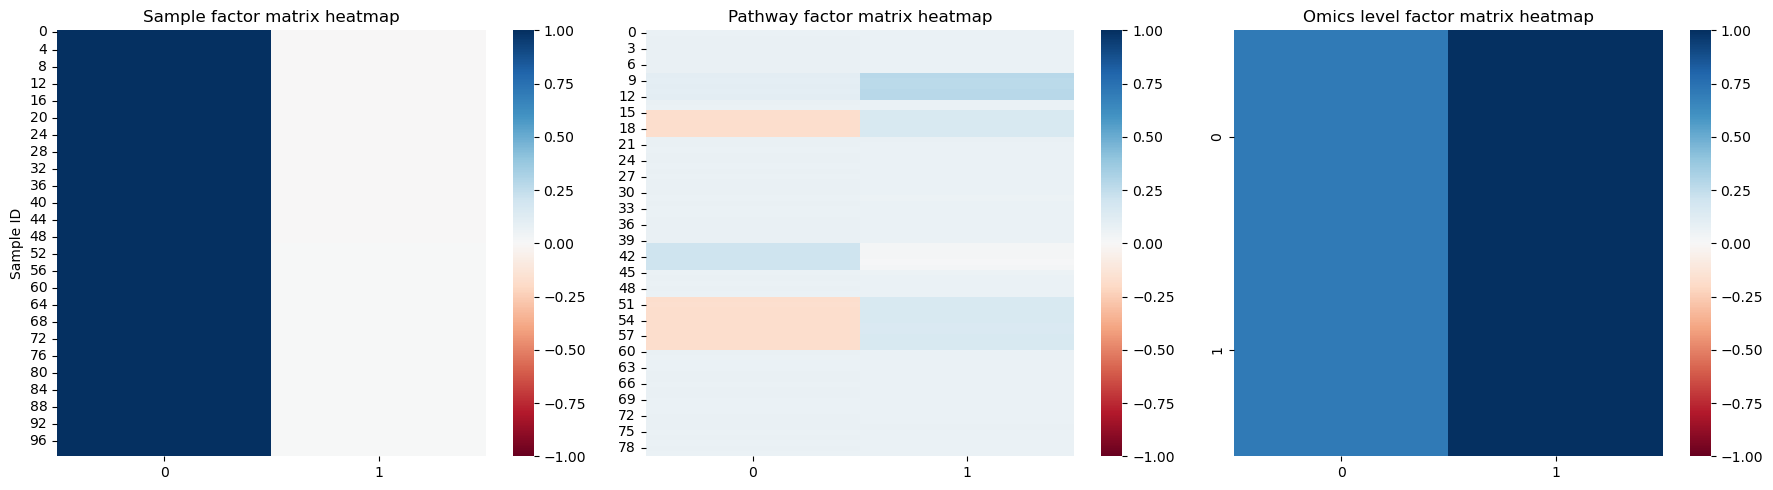

In [121]:
weight, factors = parafac(X_12,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1, vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

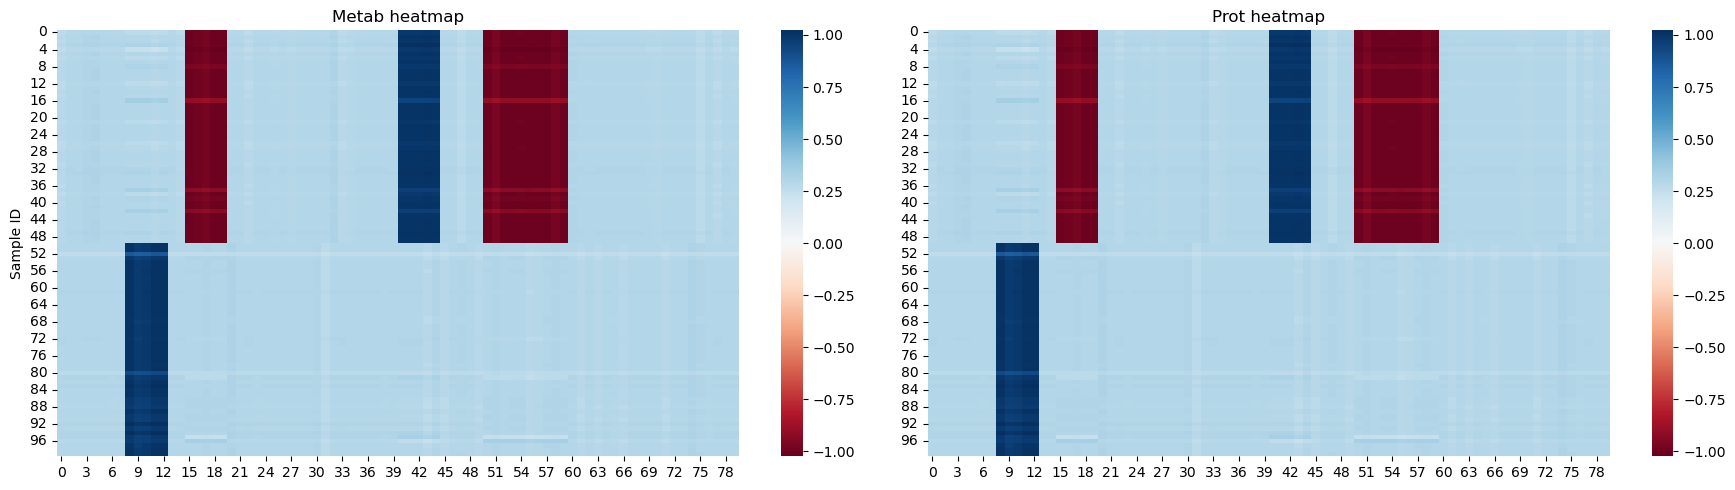

In [122]:
X_12_v2 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_12_v2[:,:,0], cmap='RdBu')
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_12_v2[:,:,1], cmap='RdBu')
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

In [126]:
test_ev = df_rank_evaluation(X_12_v2,10,diabetes_binary,LinearRegression())

In [127]:
test_ev

Core consistency       Fit  Sum Squared Error  \
Number of components                                                  
1                         1.000000e+02  0.706407       1.075984e+03   
2                        -1.723080e+27  1.000000       2.179149e-24   
3                        -1.408677e+29  1.000000       1.005758e-26   
4                        -3.608309e+32  1.000000       2.404919e-25   
5                        -5.168668e+30  1.000000       1.136316e-25   
6                        -3.294386e+28  1.000000       1.677337e-25   
7                        -6.655428e+33  1.000000       9.553692e-25   
8                        -9.967122e+32  1.000000       1.821981e-24   
9                        -1.328999e+33  1.000000       8.023013e-23   
10                       -2.163084e+33  1.000000       3.599893e-24   

                      Predictive Power  Degeneracy Score  
Number of components                                      
1                             0.998959          1.000000  
2                             0.999329          0.000003  
3                             0.999346          0.267013  
4                             0.999001          0.649858  
5                             0.999339          0.855764  
6                             0.999338          0.920058  
7                             0.999027          0.929607  
8                             0.999055          0.935669  
9                             0.999292          0.999427  
10                            0.999173          0.953815

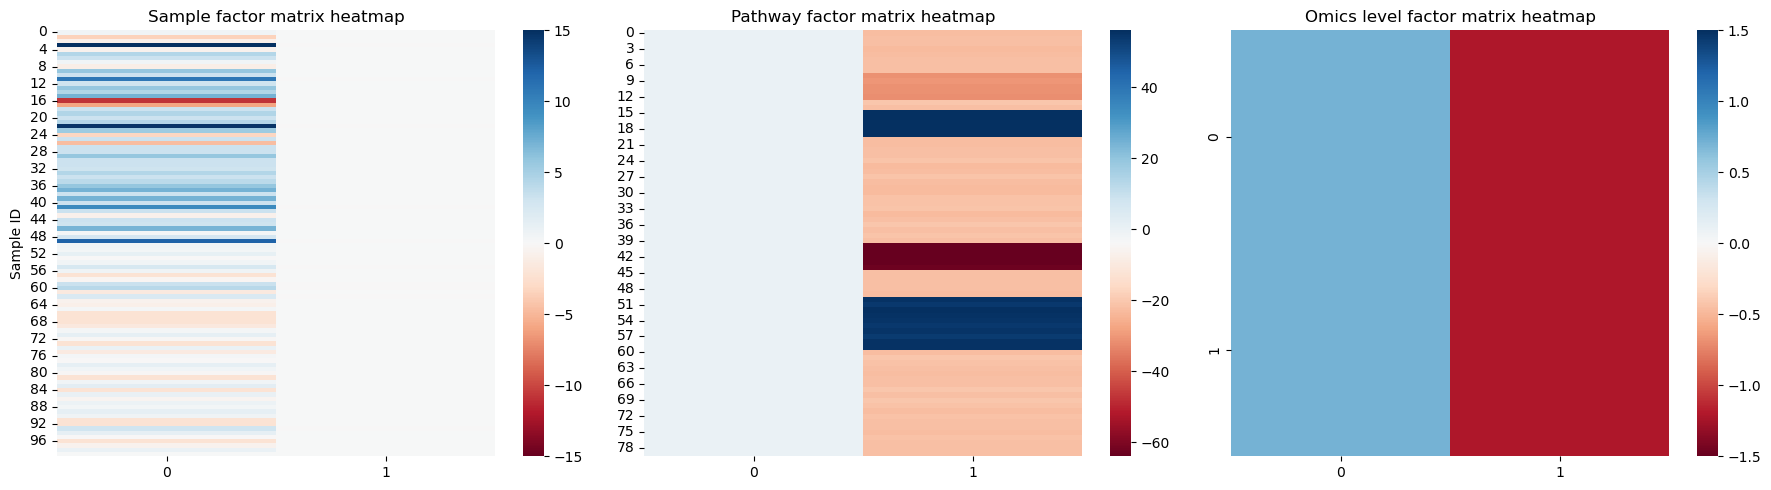

In [138]:
weight, factors = parafac(X_12_v2,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-15,vmax=15)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu')
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1.5,vmax=1.5)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

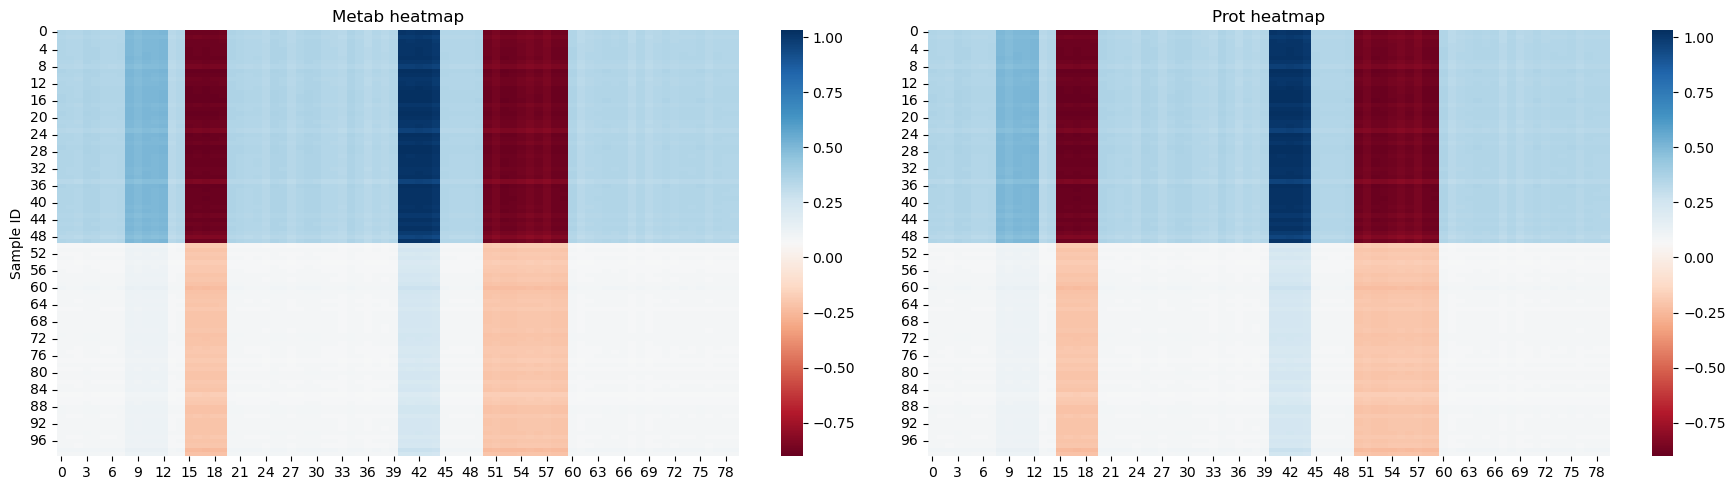

In [139]:
X_12_v2 = tl.cp_tensor.cp_to_tensor((weight,factors))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_12_v2[:,:,0], cmap='RdBu')
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_12_v2[:,:,1], cmap='RdBu')
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

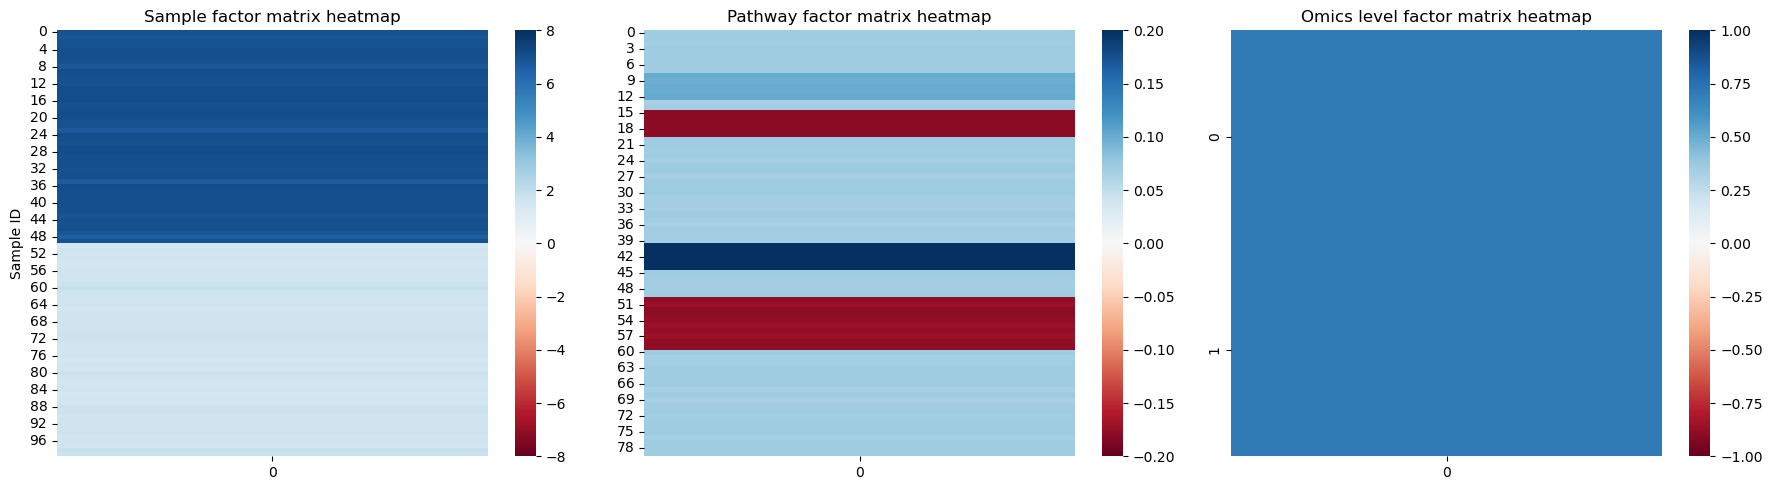

In [135]:
weight, factors = parafac(X_12,rank=1)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-8,vmax=8)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-0.2,vmax=0.2)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

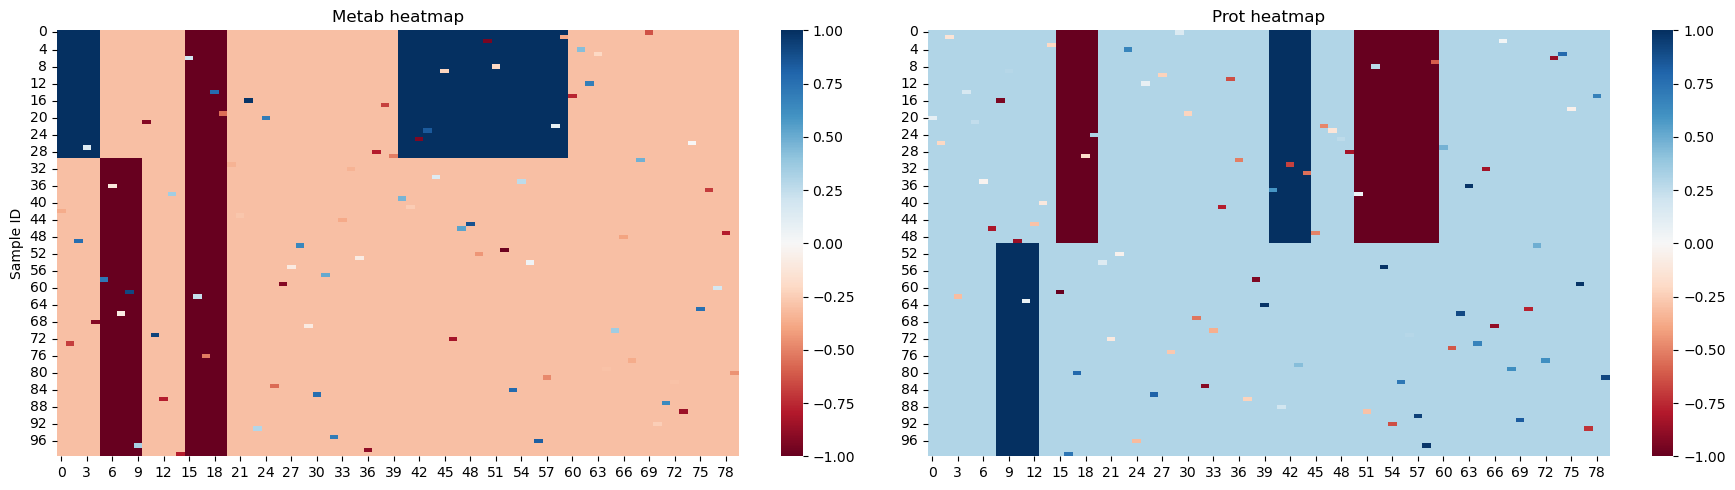

In [148]:
metab_12 = np.full((100,80), -0.3)
metab_12[:30,:5] = 1
metab_12[30:,5:10] =-1
metab_12[:30, 15:20] = -1
metab_12[30:, 15:20] = -1
metab_12[:30, 40:60] =1
random_sam_metab = np.random.choice(metab_12.shape[0], size=80, replace=False)
random_path_metab = np.random.choice(metab_12.shape[1], size=80, replace=False)
random_values = np.random.uniform(-1, 1, size=80)
metab_12[random_sam_metab,random_path_metab] = random_values

prot_12 = np.full((100,80), 0.3)
prot_12[:50,15:20]=-1
prot_12[50:,8:13] =1
prot_12[:50, 50:60] =-1
prot_12[:50,40:45] =1

random_sam_prot = np.random.choice(prot_12.shape[0], size=80, replace=False)
random_path_prot = np.random.choice(prot_12.shape[1], size=80, replace=False)

random_values = np.random.uniform(-1, 1, size=80)
prot_12[random_sam_prot,random_path_prot] = random_values

X_12 = tl.stack([prot_12,prot_12],axis=2)

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_12, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_12, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

In [238]:
sample_mat_0 = np.full((100,2),0.01)
sample_mat_0[:50,0] = 1
sample_mat_0[50:,0] = -1
sample_mat_0[:50,1] = -1
sample_mat_0[50:,1] = 1

pathway_mat_0 = np.full((80,2),0.01)
pathway_mat_0[:10,0] = -1
pathway_mat_0[70:,0] = 1
pathway_mat_0[10:20,1] = 1
pathway_mat_0[60:70,1] = -1

omics_mat_0 = np.ones((2,2))
omics_mat_0[0,1] =-1

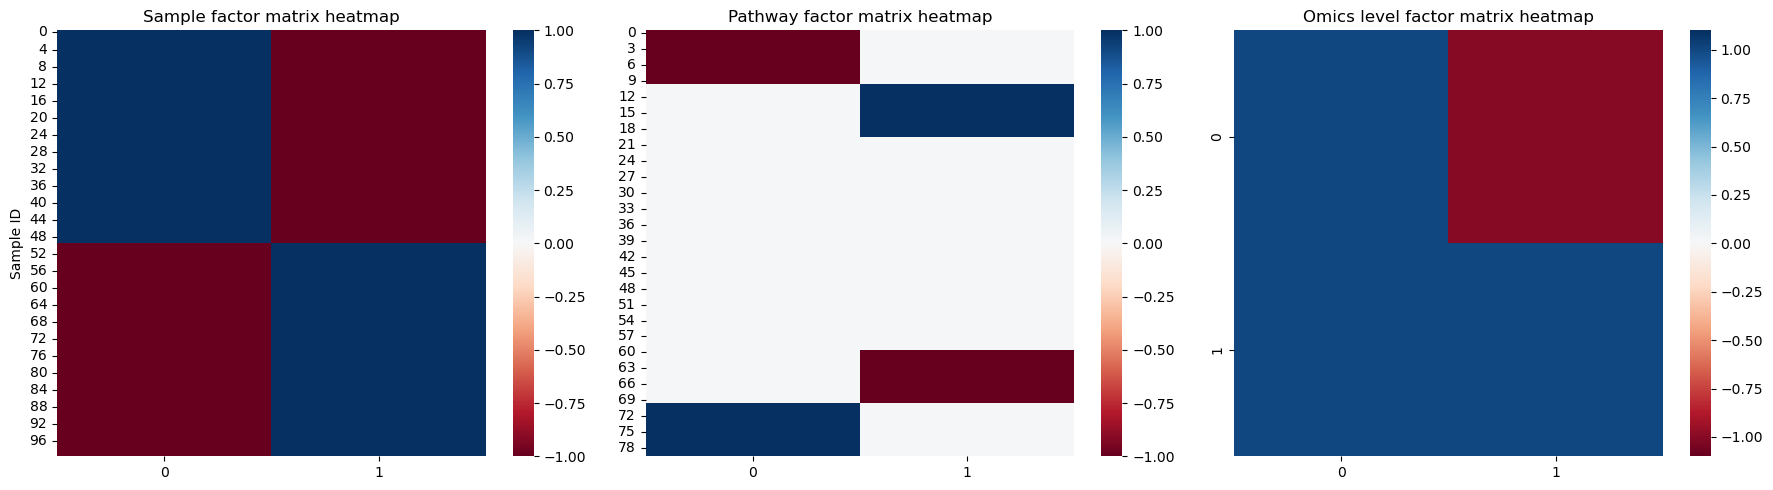

In [239]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(sample_mat_0, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(pathway_mat_0, cmap='RdBu',vmin=-1,vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(omics_mat_0, cmap='RdBu',vmin=-1.1,vmax=1.1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

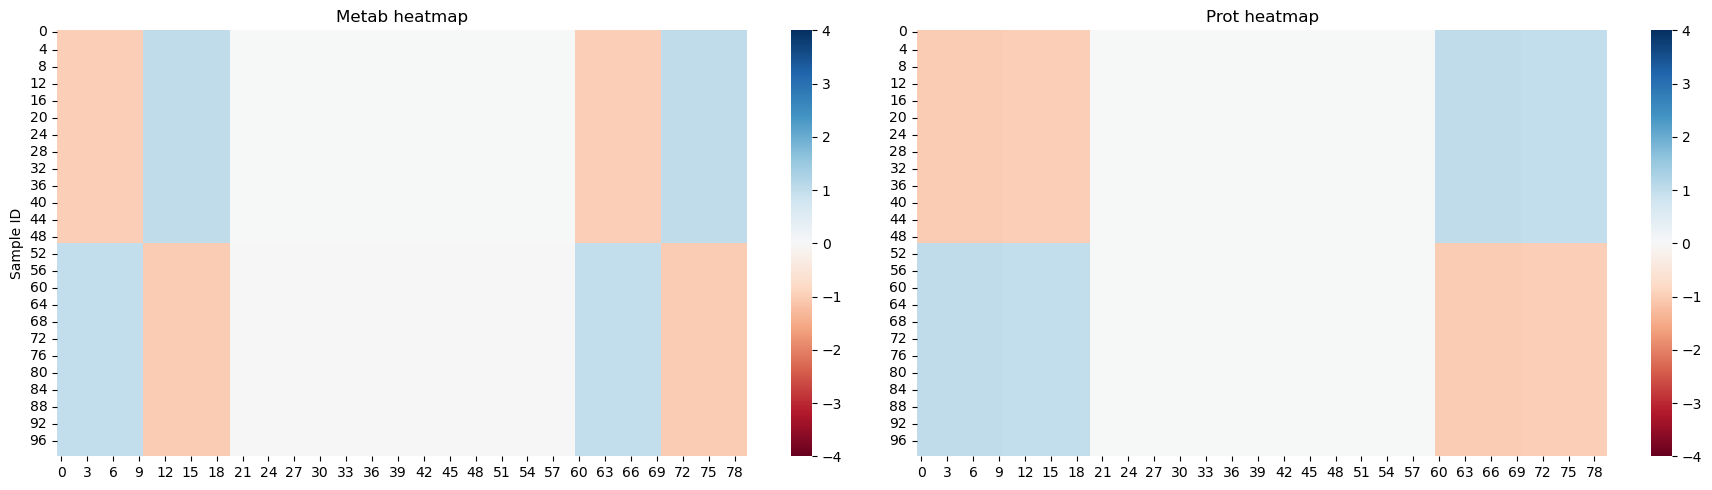

In [240]:
X_0_v2 = tl.cp_tensor.cp_to_tensor((None,[sample_mat_0,pathway_mat_0,omics_mat_0]))

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(X_0_v2[:,:,0], cmap='RdBu',vmax=4,vmin=-4)
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(X_0_v2[:,:,1], cmap='RdBu',vmax=4,vmin=-4)
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

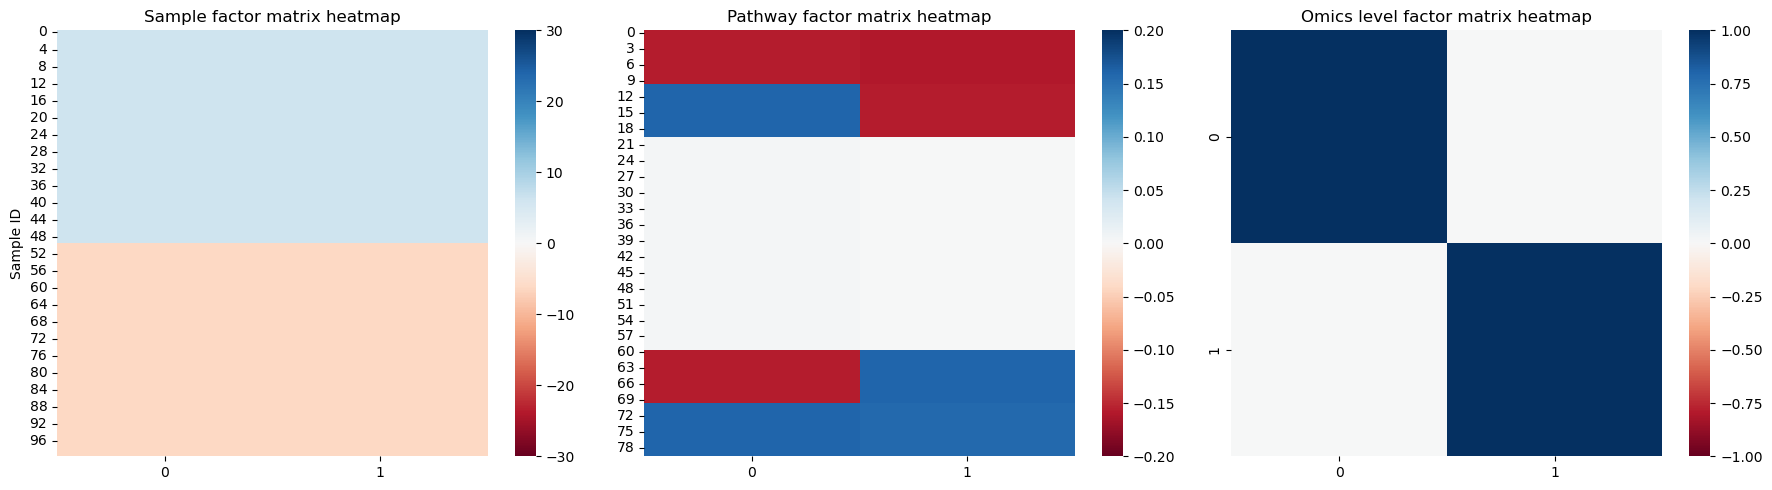

In [241]:
weight, factors = parafac(X_0_v2,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-30,vmax=30)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-0.2,vmax=0.2)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()

In [242]:
metab_mat_0 = np.full((100,80),0.01)
metab_mat_0[:50, :10]=1
metab_mat_0[:50,70:]=-1
metab_mat_0[50:,:10]=-1
metab_mat_0[50:,70:]=1

metab_mat_0[:50, 10:20]=-1
metab_mat_0[:50,60:70]=1
metab_mat_0[50:,10:20]=1
metab_mat_0[50:,60:70]=-1


prot_mat_0 = np.full((100,80),0.01)
prot_mat_0[:50, :10]=1
prot_mat_0[:50,70:]=-1
prot_mat_0[50:,:10]=-1
prot_mat_0[50:,70:]=1

prot_mat_0[:50, 10:20]=1
prot_mat_0[:50,60:70]=-1
prot_mat_0[50:,10:20]=-1
prot_mat_0[50:,60:70]=1

X = tl.stack([metab_mat_0,prot_mat_0],axis=2)

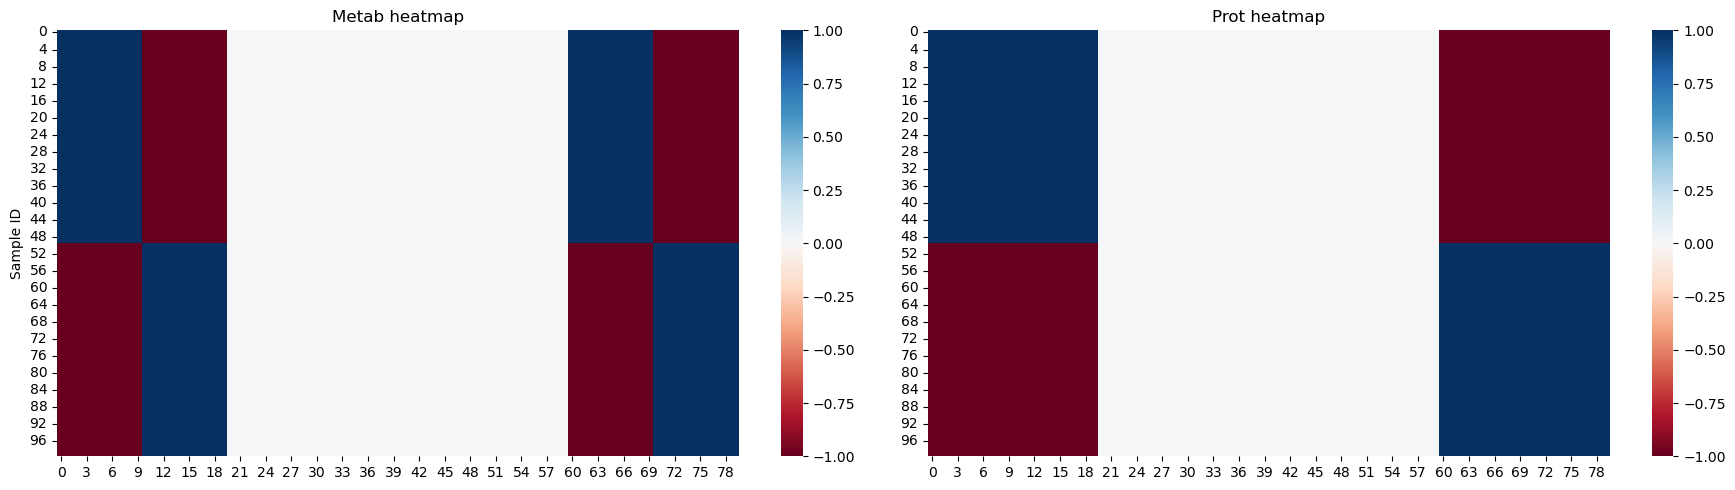

In [243]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.heatmap(metab_mat_0, cmap='RdBu')
plt.title('Metab heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,2,2)
sns.heatmap(prot_mat_0, cmap='RdBu')
plt.title('Prot heatmap')


plt.tight_layout()
plt.show()

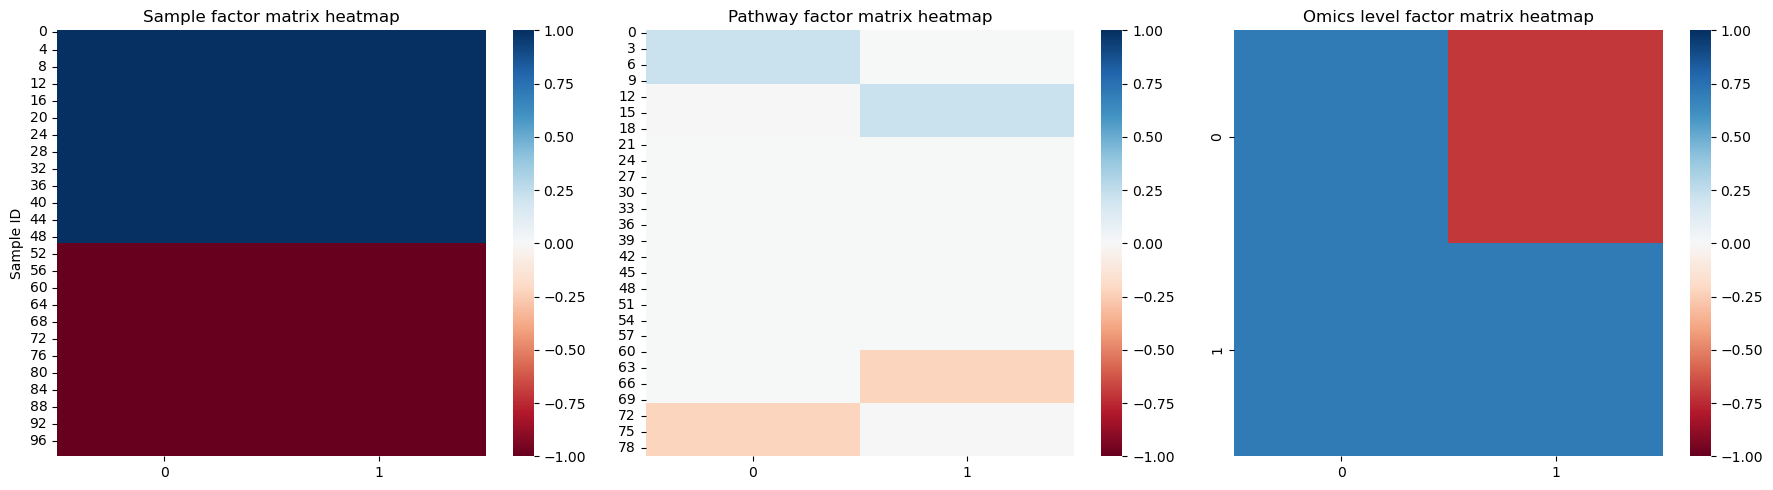

In [244]:
weight, factors = parafac(X,rank=2)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.heatmap(factors[0], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Sample factor matrix heatmap')
plt.ylabel('Sample ID')

plt.subplot(1,3,2)
sns.heatmap(factors[1], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Pathway factor matrix heatmap')

plt.subplot(1,3,3)
sns.heatmap(factors[2], cmap='RdBu',vmin=-1,vmax=1)
plt.title('Omics level factor matrix heatmap')

plt.tight_layout()
plt.show()